In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
from datetime import datetime
import random
import os
import sys
# Get the current directory.
current_dir = os.getcwd()
# Add the `src` folder to the PYTHONPATH.
sys.path.append(os.path.join(current_dir, "../src"))
from gambling_simulation import *

In [5]:
df = pd.read_csv('../Data/df_atp.csv')
df.drop(df.columns[0], axis = 1, inplace =True)
df = df[['Winner', 'Loser', 'Location', 'Date', 'B365W', 'B365L', 'B&WW', 'B&WL', 'CBW', 'CBL', 'EXW', 'EXL', 'LBW', 'LBL', 'GBW', 'GBL', 'IWW', 'IWL', 'PSW', 'PSL', 'SBW', 'SBL', 'SJW', 'SBL', 'UBW', 'UBL']]
df = df.rename({'Location' : 'Tournament Name', 'Date' : 'Year'}, axis = 1)
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year
df           

C:\Users\aman0\AppData\Local\Temp\ipykernel_28448\4092462237.py:1: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


Winner           Loser Tournament Name  Year  B365W  B365L  \
0         Dosedel S.     Ljubicic I.        Adelaide  2000    NaN    NaN   
1         Enqvist T.      Clement A.        Adelaide  2000    NaN    NaN   
2          Escude N.   Baccanello P.        Adelaide  2000    NaN    NaN   
3         Federer R.  Knippschild J.        Adelaide  2000    NaN    NaN   
4        Fromberg R.   Woodbridge T.        Adelaide  2000    NaN    NaN   
...              ...             ...             ...   ...    ...    ...   
54903      Nadal R.    Tsitsipas S.           London  2019   1.44   2.75   
54904     Zverev A.     Medvedev D.           London  2019   1.90   1.90   
54905  Tsitsipas S.      Federer R.           London  2019   3.50   1.30   
54906      Thiem D.       Zverev A.           London  2019   1.80   2.00   
54907  Tsitsipas S.        Thiem D.           London  2019   2.00   1.80   

       B&WW  B&WL  CBW  CBL  ... IWW  IWL   PSW   PSL  SBW  SBL  SJW  SBL  \
0       NaN   NaN  NaN  NaN  ... NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1       NaN   NaN  NaN  NaN  ... NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2       NaN   NaN  NaN  NaN  ... NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
3       NaN   NaN  NaN  NaN  ... NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
4       NaN   NaN  NaN  NaN  ... NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
...     ...   ...  ...  ...  ...  ..  ...   ...   ...  ...  ...  ...  ...   
54903   NaN   NaN  NaN  NaN  ... NaN  NaN  1.39  3.26  NaN  NaN  NaN  NaN   
54904   NaN   NaN  NaN  NaN  ... NaN  NaN  2.14  1.79  NaN  NaN  NaN  NaN   
54905   NaN   NaN  NaN  NaN  ... NaN  NaN  3.75  1.33  NaN  NaN  NaN  NaN   
54906   NaN   NaN  NaN  NaN  ... NaN  NaN  1.84  2.10  NaN  NaN  NaN  NaN   
54907   NaN   NaN  NaN  NaN  ... NaN  NaN  2.00  1.93  NaN  NaN  NaN  NaN   

       UBW  UBL  
0      NaN  NaN  
1      NaN  NaN  
2      NaN  NaN  
3      NaN  NaN  
4      NaN  NaN  
...    ...  ...  
54903  NaN  NaN  
54904  NaN  NaN  
54905  NaN  NaN  
54906  NaN  NaN  
54907  NaN  NaN  

[54908 rows x 26 columns]

In [11]:
matches_df = pd.read_csv('../Data/matches.csv')
matches_df = matches_df.drop(matches_df.columns[[0, 1]], axis = 1)
matches_df = matches_df.rename({'Player 2' : 'Loser'}, axis = 1)
def convert_name(name):
    lname = name.split(' ')[-1]
    first_initial = name[0]
    return '%s %s.' %(lname, first_initial)
matches_df['Loser'] = matches_df['Loser'].apply(convert_name)
matches_df['Winner'] = matches_df['Winner'].apply(convert_name)
locations_list = [location.title() for location in list(df['Tournament Name'].unique())]
matches = matches_df[matches_df['Tournament Name'].isin(locations_list)]
matches

Loser        Winner     Score   Tournament Name  Year  \
0         Canas G.     Hewitt L.    6364.0  'S-Hertogenbosch  2001   
1       Federer R.     Hewitt L.    6462.0  'S-Hertogenbosch  2001   
2       Robredo T.      Canas G.    7564.0  'S-Hertogenbosch  2001   
3      Elseneer G.     Hewitt L.    6264.0  'S-Hertogenbosch  2001   
4       Sluiter R.    Federer R.  676464.0  'S-Hertogenbosch  2001   
...            ...           ...       ...               ...   ...   
86551  Fabbiano T.        Ito T.    6463.0            Zhuhai  2019   
86552  Oliveira G.     Schnur B.    7563.0            Zhuhai  2019   
86553       Hua R.  Laaksonen H.    6363.0            Zhuhai  2019   
86554      Zhao Z.     Sugita Y.    6060.0            Zhuhai  2019   
86555  Uchiyama Y.     Vesely J.  677676.0            Zhuhai  2019   

       Player 1 Ranking  Player 2 Ranking        Date Surface  \
0                   6.0              61.0  2001-06-18   Grass   
1                   6.0              15.0  2001-06-18   Grass   
2                  61.0              69.0  2001-06-18   Grass   
3                   6.0             323.0  2001-06-18   Grass   
4                  15.0             107.0  2001-06-18   Grass   
...                 ...               ...         ...     ...   
86551             141.0              88.0  2019-09-23    Hard   
86552              95.0             257.0  2019-09-23    Hard   
86553             110.0             685.0  2019-09-23    Hard   
86554             129.0            1602.0  2019-09-23    Hard   
86555             125.0             138.0  2019-09-23    Hard   

       Player 1 Previous Wins  Player 2 Previous Wins  P1 Surface Wins  \
0                         1.0                     0.0             10.0   
1                         0.0                     0.0             10.0   
2                         1.0                     0.0              4.0   
3                         0.0                     0.0             10.0   
4                         0.0                     0.0              5.0   
...                       ...                     ...              ...   
86551                     0.0                     0.0             75.0   
86552                     0.0                     0.0             15.0   
86553                     0.0                     0.0             24.0   
86554                     0.0                     0.0             86.0   
86555                     1.0                     0.0             47.0   

       P1 Surface Matches  P2 Surface Wins  P2 Surface Matches  \
0                    10.0              4.0                 5.0   
1                    10.0              5.0                 7.0   
2                     5.0              3.0                 4.0   
3                    10.0              4.0                 6.0   
4                     7.0              4.0                 6.0   
...                   ...              ...                 ...   
86551               159.0             57.0               126.0   
86552                33.0              0.0                 4.0   
86553                60.0              0.0                 2.0   
86554               177.0              0.0                 1.0   
86555               110.0             14.0                42.0   

       P1 Last 10 Matches  P2 Last 10 Matches  
0                     8.0                 7.0  
1                     8.0                 7.0  
2                     7.0                 6.0  
3                     8.0                 4.0  
4                     7.0                 3.0  
...                   ...                 ...  
86551                 7.0                 4.0  
86552                 1.0                 4.0  
86553                 4.0                 0.0  
86554                 7.0                 0.0  
86555                 8.0                 3.0  

[65095 rows x 17 columns]

In [7]:
gambling_set = matches.merge(df, on = ['Loser', 'Winner', 'Tournament Name', 'Year'])
gambling_set['winner'] = gambling_set['Winner']
gambling_set = gambling_set.rename({'Loser' : 'Player 1', 'Winner' : 'Player 2', 'winner' : 'Winner'}, axis = 1)

In [8]:
matches_df

Loser        Winner     Score   Tournament Name  Year  \
0         Canas G.     Hewitt L.    6364.0  'S-Hertogenbosch  2001   
1       Federer R.     Hewitt L.    6462.0  'S-Hertogenbosch  2001   
2       Robredo T.      Canas G.    7564.0  'S-Hertogenbosch  2001   
3      Elseneer G.     Hewitt L.    6264.0  'S-Hertogenbosch  2001   
4       Sluiter R.    Federer R.  676464.0  'S-Hertogenbosch  2001   
...            ...           ...       ...               ...   ...   
86551  Fabbiano T.        Ito T.    6463.0            Zhuhai  2019   
86552  Oliveira G.     Schnur B.    7563.0            Zhuhai  2019   
86553       Hua R.  Laaksonen H.    6363.0            Zhuhai  2019   
86554      Zhao Z.     Sugita Y.    6060.0            Zhuhai  2019   
86555  Uchiyama Y.     Vesely J.  677676.0            Zhuhai  2019   

       Player 1 Ranking  Player 2 Ranking        Date Surface  \
0                   6.0              61.0  2001-06-18   Grass   
1                   6.0              15.0  2001-06-18   Grass   
2                  61.0              69.0  2001-06-18   Grass   
3                   6.0             323.0  2001-06-18   Grass   
4                  15.0             107.0  2001-06-18   Grass   
...                 ...               ...         ...     ...   
86551             141.0              88.0  2019-09-23    Hard   
86552              95.0             257.0  2019-09-23    Hard   
86553             110.0             685.0  2019-09-23    Hard   
86554             129.0            1602.0  2019-09-23    Hard   
86555             125.0             138.0  2019-09-23    Hard   

       Player 1 Previous Wins  Player 2 Previous Wins  P1 Surface Wins  \
0                         1.0                     0.0             10.0   
1                         0.0                     0.0             10.0   
2                         1.0                     0.0              4.0   
3                         0.0                     0.0             10.0   
4                         0.0                     0.0              5.0   
...                       ...                     ...              ...   
86551                     0.0                     0.0             75.0   
86552                     0.0                     0.0             15.0   
86553                     0.0                     0.0             24.0   
86554                     0.0                     0.0             86.0   
86555                     1.0                     0.0             47.0   

       P1 Surface Matches  P2 Surface Wins  P2 Surface Matches  \
0                    10.0              4.0                 5.0   
1                    10.0              5.0                 7.0   
2                     5.0              3.0                 4.0   
3                    10.0              4.0                 6.0   
4                     7.0              4.0                 6.0   
...                   ...              ...                 ...   
86551               159.0             57.0               126.0   
86552                33.0              0.0                 4.0   
86553                60.0              0.0                 2.0   
86554               177.0              0.0                 1.0   
86555               110.0             14.0                42.0   

       P1 Last 10 Matches  P2 Last 10 Matches  
0                     8.0                 7.0  
1                     8.0                 7.0  
2                     7.0                 6.0  
3                     8.0                 4.0  
4                     7.0                 3.0  
...                   ...                 ...  
86551                 7.0                 4.0  
86552                 1.0                 4.0  
86553                 4.0                 0.0  
86554                 7.0                 0.0  
86555                 8.0                 3.0  

[86556 rows x 17 columns]

In [9]:
features_set = gambling_set
features_set

Player 1       Player 2     Score Tournament Name  Year  \
0          Blanco G.     Kuerten G.    6462.0        Acapulco  2001   
1           Canas G.     Kuerten G.    6164.0        Acapulco  2001   
2            Moya C.      Blanco G.  646775.0        Acapulco  2001   
3        Meligeni F.     Kuerten G.  676332.0        Acapulco  2001   
4        Bruguera S.        Moya C.  167564.0        Acapulco  2001   
...              ...            ...       ...             ...   ...   
32262  Cecchinato M.     Dzumhur D.  576462.0          Zhuhai  2019   
32263        Ruud C.  Kecmanovic M.      62.0          Zhuhai  2019   
32264    Sandgren T.      Murray A.  636761.0          Zhuhai  2019   
32265   Gojowczyk P.      Norrie C.    6164.0          Zhuhai  2019   
32266         Ito T.          Wu D.  366375.0          Zhuhai  2019   

       Player 1 Ranking  Player 2 Ranking        Date Surface  \
0                   1.0             116.0  2001-02-26    Hard   
1                   1.0             207.0  2001-02-26    Hard   
2                 116.0              25.0  2001-02-26    Hard   
3                   1.0             100.0  2001-02-26    Hard   
4                  25.0              79.0  2001-02-26    Hard   
...                 ...               ...         ...     ...   
32262              93.0              67.0  2019-09-23    Hard   
32263              50.0              59.0  2019-09-23    Hard   
32264             413.0              69.0  2019-09-23    Hard   
32265              68.0              92.0  2019-09-23    Hard   
32266             339.0             141.0  2019-09-23    Hard   

       Player 1 Previous Wins  ...  IWL   PSW   PSL    SBW    SBL  SJW    SBL  \
0                         0.0  ...  3.2   NaN   NaN  1.222  3.750  NaN  3.750   
1                         1.0  ...  3.8   NaN   NaN  1.250  3.500  NaN  3.500   
2                         0.0  ...  1.3   NaN   NaN  2.625  1.444  NaN  1.444   
3                         0.0  ...  3.2   NaN   NaN  1.222  3.750  NaN  3.750   
4                         0.0  ...  2.3   NaN   NaN  1.400  2.750  NaN  2.750   
...                       ...  ...  ...   ...   ...    ...    ...  ...    ...   
32262                     1.0  ...  NaN  1.44  2.99    NaN    NaN  NaN    NaN   
32263                     0.0  ...  NaN  1.74  2.20    NaN    NaN  NaN    NaN   
32264                     0.0  ...  NaN  1.67  2.32    NaN    NaN  NaN    NaN   
32265                     2.0  ...  NaN  1.53  2.67    NaN    NaN  NaN    NaN   
32266                     0.0  ...  NaN  2.52  1.58    NaN    NaN  NaN    NaN   

       UBW  UBL         Winner  
0      NaN  NaN     Kuerten G.  
1      NaN  NaN     Kuerten G.  
2      NaN  NaN      Blanco G.  
3      NaN  NaN     Kuerten G.  
4      NaN  NaN        Moya C.  
...    ...  ...            ...  
32262  NaN  NaN     Dzumhur D.  
32263  NaN  NaN  Kecmanovic M.  
32264  NaN  NaN      Murray A.  
32265  NaN  NaN      Norrie C.  
32266  NaN  NaN          Wu D.  

[32267 rows x 40 columns]

In [10]:
import pandas as pd
on = list(matches_df.columns[2:])
anti_join_result = pd.merge(matches_df, features_set, on=on, how='left', indicator=True).query("_merge == 'left_only'")
anti_join_result


TypeError: dtype 'SBL    float64
SBL    float64
dtype: object' not understood

In [ ]:
anti_join_result = anti_join_result.drop(['Tournament Name', 'Year', 'Score', '_merge', 'B365W', 'B365L', 'B&WW', 'B&WL', 'CBW', 'CBL', 'EXW', 'EXL', 'LBW', 'LBL', 'GBW', 'GBL', 'IWW', 'IWL', 'PSW', 'PSL', 'SBW', 'SBL', 'SJW', 'SBL', 'UBW', 'UBL', 'Date', 'Player 1', 'Player 2', 'Winner_y'], axis = 1)
anti_join_result['Winner'] = anti_join_result['Winner_x']
X_train = anti_join_result.rename({'Loser' : 'Player 1', 'Winner_x' : 'Player 2'}, axis = 1)

In [ ]:
X_train

Player 1      Player 2  Player 1 Ranking  Player 2 Ranking Surface  \
0         Canas G.     Hewitt L.               6.0              61.0   Grass   
1       Federer R.     Hewitt L.               6.0              15.0   Grass   
2       Robredo T.      Canas G.              61.0              69.0   Grass   
3      Elseneer G.     Hewitt L.               6.0             323.0   Grass   
4       Sluiter R.    Federer R.              15.0             107.0   Grass   
...            ...           ...               ...               ...     ...   
86568  Fabbiano T.        Ito T.             141.0              88.0    Hard   
86569  Oliveira G.     Schnur B.              95.0             257.0    Hard   
86570       Hua R.  Laaksonen H.             110.0             685.0    Hard   
86571      Zhao Z.     Sugita Y.             129.0            1602.0    Hard   
86572  Uchiyama Y.     Vesely J.             125.0             138.0    Hard   

       Player 1 Previous Wins  Player 2 Previous Wins  P1 Surface Wins  \
0                         1.0                     0.0             10.0   
1                         0.0                     0.0             10.0   
2                         1.0                     0.0              4.0   
3                         0.0                     0.0             10.0   
4                         0.0                     0.0              5.0   
...                       ...                     ...              ...   
86568                     0.0                     0.0             75.0   
86569                     0.0                     0.0             15.0   
86570                     0.0                     0.0             24.0   
86571                     0.0                     0.0             86.0   
86572                     1.0                     0.0             47.0   

       P1 Surface Matches  P2 Surface Wins  P2 Surface Matches  \
0                    10.0              4.0                 5.0   
1                    10.0              5.0                 7.0   
2                     5.0              3.0                 4.0   
3                    10.0              4.0                 6.0   
4                     7.0              4.0                 6.0   
...                   ...              ...                 ...   
86568               159.0             57.0               126.0   
86569                33.0              0.0                 4.0   
86570                60.0              0.0                 2.0   
86571               177.0              0.0                 1.0   
86572               110.0             14.0                42.0   

       P1 Last 10 Matches  P2 Last 10 Matches        Winner  
0                     8.0                 7.0     Hewitt L.  
1                     8.0                 7.0     Hewitt L.  
2                     7.0                 6.0      Canas G.  
3                     8.0                 4.0     Hewitt L.  
4                     7.0                 3.0    Federer R.  
...                   ...                 ...           ...  
86568                 7.0                 4.0        Ito T.  
86569                 1.0                 4.0     Schnur B.  
86570                 4.0                 0.0  Laaksonen H.  
86571                 7.0                 0.0     Sugita Y.  
86572                 8.0                 3.0     Vesely J.  

[54306 rows x 14 columns]

In [ ]:
def make_swaps(features_set): 
    p1, p2, p1_rank, p2_rank = list(features_set['Player 1']), list(features_set['Player 2']), list(features_set['Player 1 Ranking']), list(features_set['Player 2 Ranking'])
    p1_prev, p2_prev = list(features_set['Player 1 Previous Wins']), list(features_set['Player 2 Previous Wins'])
    p1_surface, p2_surface = list(features_set['P1 Surface Matches']), list(features_set['P2 Surface Matches'])
    p1_surf_wins, p2_surf_wins = list(features_set['P1 Surface Wins']), list(features_set['P2 Surface Wins'])
    p1_10, p2_10 = list(features_set['P1 Last 10 Matches']), list(features_set['P2 Last 10 Matches'])

    for i in range(len(p1)):
        if random.random() > 0.5:
            temp = p1[i]
            p1[i] = p2[i]
            p2[i] = temp

            temp = p1_rank[i]
            p1_rank[i] = p2_rank[i]
            p2_rank[i] = temp
            
            temp = p1_prev[i]
            p1_prev[i] = p2_prev[i]
            p2_prev[i] = temp

            temp = p1_surface[i]
            p1_surface[i] = p2_surface[i]
            p2_surface[i] = temp

            temp = p1_surf_wins[i]
            p1_surf_wins[i] = p2_surf_wins[i]
            p2_surf_wins[i] = temp

            temp = p1_10[i]
            p1_10[i] = p2_10[i]
            p2_10[i] = temp        
            
    features_set = pd.DataFrame({'P1' : p1, 'P2' : p2, 'Winner' : features_set['Winner'], 'P1 Ranking' : p1_rank, 'P2 Ranking' : p2_rank})
    features_set['P1 Previous Wins'], features_set['P2 Previous Wins'], features_set['P1 Surface Matches'], features_set['P2 Surface Matches'] = p1_prev, p2_prev, p1_surface, p2_surface
    features_set['P1 Surface Wins'], features_set['P2 Surface Wins'], features_set['P1 Last 10 Matches'], features_set['P2 Last 10 Matches'] = p1_surf_wins, p2_surf_wins, p1_10, p2_10
    features_set['winner'] = features_set.apply(lambda x: 0 if x['Winner'] == x['P1'] else 1, axis = 1)
    features_set = features_set.drop(['P1' ,'P2', 'Winner'], axis = 1)
    return features_set

In [ ]:
features_set = make_swaps(features_set)
X_t = make_swaps(X_train)

In [ ]:
import pickle
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
X_train, y_train = X_t.drop('winner', axis = 1), X_t['winner']
y_test = features_set['winner']
X_test = features_set.drop('winner', axis = 1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

model = xgb.XGBClassifier(booster = 'dart', n_estimators = 30, max_depth = 10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6766975547773266

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [300, 500, 750],
    'max_depth': [5,6,7,8,9,10],
    'learning_rate': [0.1, 0.15, 0.2, 0.25]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6834536833297177

[0.09458216 0.08724913 0.03712774 0.03283034 0.06124324 0.059363
 0.24334812 0.25919318 0.04977125 0.0752918 ]


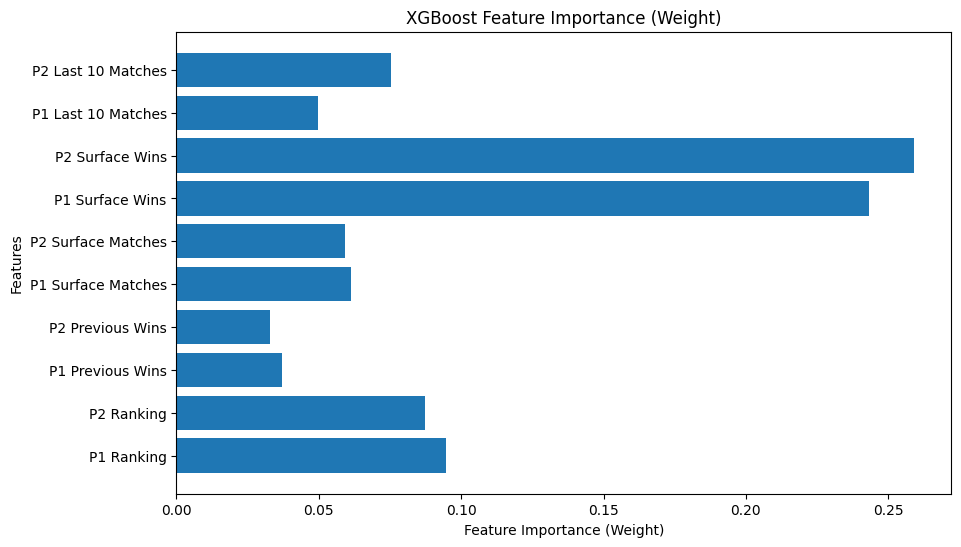

In [ ]:

import matplotlib.pyplot as plt

feature_names = X_t.drop('winner', axis = 1).columns  # Replace with your feature names
feature_importance_weight = model.feature_importances_

# Create a bar plot to visualize feature importance
print(feature_importance_weight)
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_weight)
plt.xlabel('Feature Importance (Weight)')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance (Weight)')
plt.show()


In [ ]:
gambling_features = make_swaps(gambling_set)
gambling_test = gambling_features['winner']
gambling_features = gambling_features.drop('winner', axis = 1)
gambling_test

0        1
1        1
2        0
3        0
4        0
        ..
32262    0
32263    0
32264    0
32265    0
32266    1
Name: winner, Length: 32267, dtype: int64

In [ ]:
initial_amt, betting_amt = 1000, 50
bets_won = 0
bets_placed = 0
for index, row in gambling_features.iterrows():
    row = np.array([row])
    row = scaler.transform(row)
    pred = model.predict(row)
    if pred[0] == gambling_test[index]:
        bets_won += 1
        odds_list = gambling_set.loc[index, ['B365W', 'B&WW', 'CBW', 'EXW', 'LBW', 'GBW', 'IWW', 'PSW', 'SBW', 'SJW', 'UBW']]
        odds = np.max(odds_list.astype('float64'))
        if np.isnan(odds):
            continue
        bets_placed += 1
        initial_amt += betting_amt * (float(odds) - 1)
    else:
        bets_placed += 1
        initial_amt -= betting_amt
    print(initial_amt)

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

1011.1
1023.6
973.6
984.7
1004.7
1092.2
1124.7
1133.7
1155.7
1230.7
1283.2
1364.45
1396.95
1409.45
1484.45
1499.45
1519.45
1469.45
1419.45
1464.95
1524.95
1564.95
1599.95
1642.45
1592.45
1612.45
1634.95
1663.45
1687.45
1732.45
1779.95
1729.95
1679.95
1713.95
1773.95
1804.95
1849.95
1799.95
1827.45
1777.45
1802.45
1830.95
1849.95
1799.95
1749.95
1767.45
1791.45
1818.95
1843.95
1866.45
1892.45
1842.45
1888.95
1838.95
1788.95
1738.95
1688.95
1713.95
1663.95
1680.6000000000001
1630.6000000000001
1580.6000000000001
1600.6000000000001
1620.6000000000001
1642.8000000000002
1767.8000000000002
1777.8000000000002
1797.8000000000002
1824.4500000000003
1831.6000000000004
1856.6000000000004
1806.6000000000004
1835.1500000000003
1922.6500000000003
2027.6500000000003
2067.6500000000005
2081.6500000000005
2098.9000000000005
2048.9000000000005
2071.1000000000004
2021.1000000000004
2035.4000000000003
2045.4000000000003
1995.4000000000003
2068.9000000000005
2018.9000000000005
2118.9000000000005
2140.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

2860.55
2810.55
2760.55
2790.15
2807.65
2888.65
2901.65
2911.65
2934.9
2951.55
2901.55
2929.3500000000004
2974.0000000000005
2986.3500000000004
2996.3500000000004
2946.3500000000004
3044.3500000000004
3057.3500000000004
3007.3500000000004
2957.3500000000004
2992.3500000000004
3002.3500000000004
2952.3500000000004
2962.3500000000004
2980.3500000000004
2982.8500000000004
3000.8500000000004
3075.8500000000004
3025.8500000000004
3100.8500000000004
3050.8500000000004
3058.3500000000004
3062.8500000000004
3012.8500000000004
3025.3500000000004
3059.3500000000004
3079.3500000000004
3029.3500000000004
3084.3500000000004
3034.3500000000004
3067.7000000000003
3120.7000000000003
3153.2000000000003
3205.2000000000003
3155.2000000000003
3170.8500000000004
3181.9500000000003
3196.9500000000003
3208.9
3247.35
3279.7999999999997
3374.7999999999997
3408.6
3418.0499999999997
3429.0499999999997
3440.95
3390.95
3398.1
3405.45
3437.2999999999997
3450.6499999999996
3457.9999999999995
3486.7499999999995
3511.

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

3753.2499999999995
3703.2499999999995
3653.2499999999995
3603.2499999999995
3553.2499999999995
3566.2499999999995
3576.7499999999995
3596.7499999999995
3631.7499999999995
3581.7499999999995
3588.2499999999995
3538.2499999999995
3558.7499999999995
3578.2499999999995
3601.2499999999995
3623.2499999999995
3626.2499999999995
3631.7499999999995
3635.7499999999995
3648.2499999999995
3664.7499999999995
3614.7499999999995
3643.2499999999995
3593.2499999999995
3543.2499999999995
3584.7499999999995
3672.2499999999995
3622.2499999999995
3657.2499999999995
3659.2499999999995
3687.7499999999995
3729.7499999999995
3805.7499999999995
3822.2499999999995
3772.2499999999995
3722.2499999999995
3732.2499999999995
3756.2499999999995
3770.7499999999995
3720.7499999999995
3765.7499999999995
3775.7499999999995
3725.7499999999995
3737.7499999999995
3753.2499999999995
3703.2499999999995
3715.2499999999995
3665.2499999999995
3667.2499999999995
3669.2499999999995
3695.2499999999995
3718.2499999999995
3805.7499999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

4020.5999999999995
3970.5999999999995
4033.0999999999995
3983.0999999999995
4015.5999999999995
4049.0999999999995
4092.1999999999994
4125.549999999999
4195.549999999999
4213.049999999999
4246.549999999999
4288.9
4238.9
4188.9
4138.9
4088.8999999999996
4112.9
4139.2
4089.2
4101.25
4126.25
4184.75
4214.7
4164.7
4206.2
4238.7
4188.7
4138.7
4151.2
4191.2
4141.2
4176.9
4191.9
4141.9
4163.65
4113.65
4122.15
4139.099999999999
4168.349999999999
4199.799999999999
4149.799999999999
4191.799999999999
4212.699999999999
4220.199999999999
4223.649999999999
4247.649999999999
4285.149999999999
4306.899999999999
4346.899999999999
4296.899999999999
4326.899999999999
4374.399999999999
4324.399999999999
4373.899999999999
4402.649999999999
4435.999999999999
4451.249999999999
4546.249999999999
4496.249999999999
4446.249999999999
4464.649999999999
4478.8499999999985
4428.8499999999985
4459.3499999999985
4409.3499999999985
4431.3499999999985
4381.3499999999985
4331.3499999999985
4281.3499999999985
4318.849999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

5252.7000000000035
5265.2000000000035
5215.2000000000035
5248.550000000004
5198.550000000004
5231.550000000004
5289.050000000004
5239.050000000004
5252.050000000004
5270.050000000004
5220.050000000004
5256.400000000004
5278.900000000004
5314.900000000004
5389.900000000004
5339.900000000004
5413.400000000004
5429.250000000005
5467.700000000004
5510.200000000004
5537.700000000004
5550.200000000004
5570.200000000004
5585.200000000004
5600.200000000004
5550.200000000004
5572.700000000004
5585.700000000004
5535.700000000004
5543.200000000004
5493.200000000004
5525.700000000004
5475.700000000004
5425.700000000004
5375.700000000004
5385.700000000004
5401.100000000004
5413.600000000004
5450.100000000004
5400.100000000004
5406.350000000004
5356.350000000004
5361.350000000004
5372.700000000004
5322.700000000004
5272.700000000004
5222.700000000004
5242.700000000004
5257.650000000004
5264.300000000004
5270.800000000004
5220.800000000004
5170.800000000004
5176.7000000000035
5271.2000000000035
5310.

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

6524.4500000000035
6474.4500000000035
6534.4500000000035
6484.4500000000035
6509.4500000000035
6459.4500000000035
6490.9500000000035
6501.9500000000035
6451.9500000000035
6503.9500000000035
6453.9500000000035
6482.4500000000035
6512.9500000000035
6543.4500000000035
6560.9500000000035
6612.4500000000035
6562.4500000000035
6573.4500000000035
6523.4500000000035
6548.4500000000035
6618.9500000000035
6663.9500000000035
6613.9500000000035
6640.4500000000035
6590.4500000000035
6608.4500000000035
6679.9500000000035
6693.9500000000035
6725.4500000000035
6675.4500000000035
6731.4500000000035
6772.9500000000035
6845.9500000000035
6795.9500000000035
6745.9500000000035
6782.9500000000035
6732.9500000000035
6749.4500000000035
6756.4500000000035
6798.4500000000035
6824.9500000000035
6855.4500000000035
6930.4500000000035
6880.4500000000035
6830.4500000000035
6911.4500000000035
6861.4500000000035
6870.4500000000035
6820.4500000000035
6853.4500000000035
6803.4500000000035
6851.4500000000035
6868.4500000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

7497.900000000002
7516.900000000002
7561.900000000002
7564.400000000002
7579.900000000002
7529.900000000002
7576.900000000002
7606.900000000002
7639.400000000002
7672.900000000002
7622.900000000002
7677.900000000002
7683.900000000002
7714.900000000002
7664.900000000002
7614.900000000002
7634.900000000002
7671.400000000002
7699.900000000002
7649.900000000002
7718.900000000002
7755.400000000002
7705.400000000002
7734.900000000002
7745.400000000002
7766.900000000002
7774.400000000002
7724.400000000002
7750.400000000002
7760.400000000002
7786.900000000002
7809.400000000002
7759.400000000002
7782.400000000002
7814.900000000002
7764.900000000002
7714.900000000002
7664.900000000002
7706.400000000002
7744.400000000002
7694.400000000002
7712.400000000002
7718.900000000002
7668.900000000002
7618.900000000002
7681.400000000002
7693.900000000002
7643.900000000002
7690.900000000002
7696.400000000002
7646.400000000002
7656.900000000002
7696.900000000002
7706.900000000002
7656.900000000002
7673.40000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

7792.400000000002
7812.400000000002
7762.400000000002
7712.400000000002
7662.400000000002
7689.900000000002
7711.900000000002
7661.900000000002
7611.900000000002
7561.900000000002
7601.900000000002
7647.400000000002
7597.400000000002
7547.400000000002
7497.400000000002
7523.900000000002
7473.900000000002
7487.900000000002
7498.900000000002
7541.400000000002
7559.400000000002
7509.400000000002
7459.400000000002
7409.400000000002
7420.400000000002
7470.400000000002
7499.400000000002
7449.400000000002
7524.400000000002
7474.400000000002
7506.900000000002
7524.900000000002
7474.900000000002
7424.900000000002
7447.900000000002
7397.900000000002
7416.400000000002
7444.900000000002
7476.900000000002
7426.900000000002
7376.900000000002
7383.900000000002
7333.900000000002
7283.900000000002
7319.900000000002
7269.900000000002
7219.900000000002
7224.900000000002
7254.400000000002
7299.400000000002
7249.400000000002
7385.400000000002
7426.900000000002
7481.900000000002
7485.400000000002
7435.40000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

7359.600000000002
7414.600000000002
7364.600000000002
7398.850000000002
7427.850000000002
7377.850000000002
7410.350000000002
7440.850000000002
7459.350000000002
7409.350000000002
7359.350000000002
7384.350000000002
7420.350000000002
7435.350000000002
7385.350000000002
7402.850000000002
7352.850000000002
7390.350000000002
7405.350000000002
7460.850000000002
7499.850000000002
7449.850000000002
7399.850000000002
7349.850000000002
7402.350000000002
7470.850000000002
7506.300000000002
7522.450000000002
7472.450000000002
7491.600000000001
7554.100000000001
7504.100000000001
7559.100000000001
7591.600000000001
7541.600000000001
7552.1500000000015
7579.6500000000015
7618.6500000000015
7568.6500000000015
7584.550000000001
7534.550000000001
7484.550000000001
7434.550000000001
7448.550000000001
7466.050000000001
7416.050000000001
7366.050000000001
7370.600000000001
7376.850000000001
7425.4000000000015
7375.4000000000015
7431.4000000000015
7381.4000000000015
7331.4000000000015
7349.4000000000015


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

7721.35
7739.35
7799.35
7749.35
7699.35
7649.35
7654.35
7659.35
7682.85
7632.85
7636.35
7586.35
7610.35
7675.35
7679.35
7728.35
7742.85
7692.85
7729.35
7762.85
7712.85
7662.85
7680.35
7747.85
7760.85
7773.35
7723.35
7728.35
7678.35
7628.35
7578.35
7589.35
7601.85
7670.85
7676.85
7699.35
7649.35
7665.35
7686.85
7712.85
7729.35
7784.35
7825.85
7896.35
7906.35
7856.35
7806.35
7756.35
7820.85
7770.85
7823.35
7853.35
7861.85
7891.85
7922.85
7931.35
7992.35
7999.35
7949.35
7972.35
7922.35
7933.35
7883.35
7909.85
7859.85
7809.85
7759.85
7709.85
7772.35
7791.35
7811.35
7761.35
7711.35
7727.85
7760.35
7776.85
7840.35
7790.35
7740.35
7759.35
7778.35
7928.35
7878.35
7892.85
7952.85
7902.85
7937.35
7963.85
7913.85
7923.85
7873.85
7877.85
7901.85
7923.35
7873.35
7906.85
7912.85
7862.85
7812.85
7762.85
7785.35
7799.85
7834.85
7784.85
7790.35
7811.85
7841.85
7901.85
7851.85
7874.35
7914.35
7949.35
7960.35
7910.35
7932.85
7958.85
7973.35
8034.85
8037.35
8055.35
8124.35
8177.85
8182.35
8190.85
8140.85


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

7687.050000000001
7715.600000000001
7725.600000000001
7750.600000000001
7767.250000000001
7772.250000000001
7780.600000000001
7788.100000000001
7816.6500000000015
7766.6500000000015
7790.6500000000015
7740.6500000000015
7757.300000000001
7771.300000000001
7811.300000000001
7835.300000000001
7785.300000000001
7792.800000000001
7824.450000000001
7829.85
7839.85
7847.0
7849.0
7854.0
7860.0
7870.0
7880.0
7910.0
7912.5
7916.5
7927.0
7934.5
7953.0
7994.5
7944.5
7954.5
7904.5
7918.5
7942.3
7960.3
8016.3
8018.3
8020.3
7970.3
7972.3
7922.3
7923.3
7928.55
7936.05
7886.05
7913.1
7927.200000000001
7958.050000000001
7959.050000000001
7961.9000000000015
7971.9000000000015
7985.250000000002
8003.750000000002
8019.050000000002
8021.550000000002
7971.550000000002
7921.550000000002
7959.050000000002
7980.800000000002
8000.800000000002
8045.850000000002
8058.350000000002
8008.350000000002
8029.200000000003
8070.500000000003
8097.000000000003
8113.000000000003
8063.000000000003
8071.500000000003
8090.6000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

8446.400000000003
8396.400000000003
8399.900000000003
8349.900000000003
8374.300000000003
8399.300000000003
8349.300000000003
8388.350000000002
8409.650000000001
8428.400000000001
8378.400000000001
8403.900000000001
8426.100000000002
8450.100000000002
8479.100000000002
8495.750000000002
8564.500000000002
8514.500000000002
8522.850000000002
8572.850000000002
8587.850000000002
8616.350000000002
8631.350000000002
8581.350000000002
8625.350000000002
8692.350000000002
8703.850000000002
8653.850000000002
8657.850000000002
8674.350000000002
8728.350000000002
8778.350000000002
8794.350000000002
8744.350000000002
8694.350000000002
8644.350000000002
8594.350000000002
8544.350000000002
8494.350000000002
8534.350000000002
8536.350000000002
8486.350000000002
8436.350000000002
8464.850000000002
8465.850000000002
8415.850000000002
8429.850000000002
8445.350000000002
8395.350000000002
8432.850000000002
8500.850000000002
8518.350000000002
8468.350000000002
8502.850000000002
8534.350000000002
8484.35000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

9191.750000000002
9220.300000000001
9170.300000000001
9194.300000000001
9144.300000000001
9180.650000000001
9130.650000000001
9080.650000000001
9100.650000000001
9050.650000000001
9075.650000000001
9092.300000000001
9042.300000000001
9056.300000000001
9089.650000000001
9124.650000000001
9074.650000000001
9102.150000000001
9132.900000000001
9187.900000000001
9137.900000000001
9166.45
9216.45
9166.45
9193.1
9143.1
9093.1
9150.6
9174.6
9124.6
9074.6
9101.1
9135.1
9165.1
9115.1
9126.1
9173.6
9183.6
9133.6
9083.6
9101.6
9118.6
9151.95
9164.45
9174.45
9208.45
9219.45
9241.95
9262.95
9293.45
9320.1
9270.1
9277.6
9322.6
9345.1
9359.4
9309.4
9339.4
9360.9
9475.9
9509.9
9543.4
9493.4
9443.4
9393.4
9435.9
9385.9
9335.9
9285.9
9235.9
9250.9
9292.55
9317.55
9334.05
9384.05
9334.05
9346.55
9296.55
9330.05
9380.05
9397.55
9347.55
9354.699999999999
9381.349999999999
9396.349999999999
9432.699999999999
9382.699999999999
9411.199999999999
9451.199999999999
9462.199999999999
9489.699999999999
9439.699999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

9780.8
9730.8
9680.8
9711.55
9661.55
9681.55
9689.05
9722.4
9762.4
9766.9
9828.9
9873.949999999999
9907.499999999998
9931.549999999997
9881.549999999997
9831.549999999997
9781.549999999997
9803.749999999998
9812.249999999998
9762.249999999998
9712.249999999998
9727.249999999998
9742.899999999998
9745.399999999998
9752.899999999998
9702.899999999998
9710.899999999998
9715.899999999998
9665.899999999998
9615.899999999998
9644.299999999997
9650.299999999997
9679.899999999998
9629.899999999998
9667.199999999997
9684.799999999997
9695.349999999997
9763.349999999997
9801.799999999997
9751.799999999997
9821.799999999997
9841.799999999997
9895.799999999997
9912.799999999997
9925.299999999997
9941.799999999997
9891.799999999997
9929.099999999997
9944.099999999997
9964.449999999997
10026.949999999997
9976.949999999997
9983.449999999997
9993.149999999998
10015.749999999998
10017.749999999998
10051.249999999998
10001.249999999998
9951.249999999998
9983.749999999998
10000.249999999998
10054.7499999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

10574.599999999995
10576.349999999995
10594.199999999995
10624.849999999995
10574.849999999995
10594.399999999994
10596.149999999994
10600.299999999994
10550.299999999994
10610.299999999994
10560.299999999994
10603.799999999994
10553.799999999994
10555.299999999994
10570.299999999994
10520.299999999994
10470.299999999994
10491.299999999994
10553.799999999994
10503.799999999994
10513.799999999994
10463.799999999994
10472.899999999994
10422.899999999994
10455.599999999995
10527.599999999995
10556.849999999995
10570.699999999995
10577.699999999995
10527.699999999995
10477.699999999995
10506.749999999995
10456.749999999995
10469.249999999995
10491.249999999995
10441.249999999995
10391.249999999995
10341.249999999995
10362.249999999995
10312.249999999995
10325.249999999995
10275.249999999995
10311.499999999995
10325.799999999994
10345.799999999994
10348.799999999994
10351.299999999994
10301.299999999994
10376.299999999994
10326.299999999994
10276.299999999994
10276.799999999994
10291.299999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

10374.499999999993
10324.499999999993
10326.499999999993
10348.999999999993
10382.999999999993
10408.499999999993
10419.499999999993
10425.499999999993
10375.499999999993
10412.999999999993
10427.999999999993
10377.999999999993
10388.999999999993
10401.499999999993
10413.999999999993
10440.499999999993
10390.499999999993
10340.499999999993
10380.499999999993
10398.499999999993
10348.499999999993
10373.499999999993
10323.499999999993
10337.999999999993
10352.999999999993
10367.999999999993
10417.999999999993
10448.999999999993
10398.999999999993
10424.999999999993
10374.999999999993
10383.499999999993
10385.499999999993
10407.499999999993
10409.499999999993
10359.499999999993
10367.999999999993
10398.999999999993
10399.499999999993
10405.999999999993
10410.999999999993
10425.499999999993
10375.499999999993
10325.499999999993
10342.999999999993
10343.499999999993
10345.499999999993
10346.999999999993
10364.999999999993
10368.499999999993
10394.999999999993
10411.999999999993
10421.499999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

10137.999999999993
10174.999999999993
10199.499999999993
10232.499999999993
10182.499999999993
10211.999999999993
10245.499999999993
10259.999999999993
10284.499999999993
10234.499999999993
10300.999999999993
10250.999999999993
10286.499999999993
10303.499999999993
10319.499999999993
10269.499999999993
10219.499999999993
10239.999999999993
10254.499999999993
10261.999999999993
10277.999999999993
10313.499999999993
10263.499999999993
10295.999999999993
10297.999999999993
10247.999999999993
10264.499999999993
10278.999999999993
10296.499999999993
10246.499999999993
10272.999999999993
10309.499999999993
10259.499999999993
10281.499999999993
10231.499999999993
10242.999999999993
10249.999999999993
10287.999999999993
10297.499999999993
10247.499999999993
10293.999999999993
10388.999999999993
10338.999999999993
10352.999999999993
10369.499999999993
10387.499999999993
10337.499999999993
10349.999999999993
10374.999999999993
10394.999999999993
10413.999999999993
10428.999999999993
10462.349999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

10395.299999999997
10430.799999999997
10447.399999999998
10397.399999999998
10459.899999999998
10477.399999999998
10427.399999999998
10459.899999999998
10473.899999999998
10504.899999999998
10522.699999999997
10569.849999999997
10519.849999999997
10528.699999999997
10535.799999999997
10568.499999999998
10518.499999999998
10468.499999999998
10508.499999999998
10518.999999999998
10540.199999999999
10552.699999999999
10502.699999999999
10523.8
10543.8
10493.8
10506.4
10525.699999999999
10475.699999999999
10483.699999999999
10433.699999999999
10452.949999999999
10536.949999999999
10539.449999999999
10540.55
10595.55
10596.3
10546.3
10582.0
10582.55
10596.55
10627.599999999999
10665.749999999998
10696.799999999997
10646.799999999997
10647.399999999998
10652.199999999997
10656.199999999997
10690.199999999997
10697.749999999996
10729.199999999997
10679.199999999997
10688.999999999996
10722.349999999997
10728.149999999996
10749.499999999996
10772.949999999997
10810.449999999997
10812.949999999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

10803.499999999996
10753.499999999996
10703.499999999996
10653.499999999996
10603.499999999996
10553.499999999996
10567.999999999996
10631.499999999996
10581.499999999996
10531.499999999996
10571.999999999996
10610.999999999996
10560.999999999996
10590.499999999996
10607.499999999996
10609.499999999996
10647.499999999996
10650.499999999996
10737.999999999996
10744.999999999996
10764.999999999996
10714.999999999996
10664.999999999996
10666.499999999996
10676.499999999996
10626.499999999996
10732.999999999996
10749.499999999996
10699.499999999996
10649.499999999996
10683.499999999996
10633.499999999996
10658.499999999996
10608.499999999996
10558.499999999996
10613.499999999996
10621.999999999996
10646.999999999996
10596.999999999996
10650.999999999996
10656.499999999996
10606.499999999996
10556.499999999996
10614.499999999996
10653.499999999996
10603.499999999996
10606.999999999996
10556.999999999996
10506.999999999996
10513.999999999996
10463.999999999996
10509.499999999996
10459.499999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

10753.499999999996
10764.499999999996
10714.499999999996
10755.999999999996
10762.999999999996
10780.999999999996
10730.999999999996
10741.499999999996
10806.499999999996
10756.499999999996
10762.499999999996
10712.499999999996
10728.999999999996
10747.999999999996
10765.499999999996
10790.499999999996
10795.999999999996
10806.999999999996
10830.499999999996
10852.999999999996
10802.999999999996
10872.999999999996
10886.999999999996
10836.999999999996
10870.499999999996
10916.999999999996
10969.499999999996
10919.499999999996
10947.499999999996
10970.999999999996
10985.999999999996
11007.999999999996
11009.999999999996
11019.999999999996
10969.999999999996
10919.999999999996
10936.499999999996
10938.999999999996
10888.999999999996
10896.999999999996
10944.999999999996
10971.499999999996
10983.999999999996
10933.999999999996
10883.999999999996
10904.499999999996
10911.999999999996
10934.999999999996
10884.999999999996
10947.499999999996
10967.499999999996
10917.499999999996
10969.999999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

11736.199999999995
11763.699999999995
11791.499999999995
11741.499999999995
11777.999999999995
11805.599999999995
11843.099999999995
11866.899999999994
11816.899999999994
11829.399999999994
11843.299999999994
11858.299999999994
11880.799999999994
11830.799999999994
11780.799999999994
11783.299999999994
11786.799999999994
11804.299999999994
11824.299999999994
11774.299999999994
11724.299999999994
11726.799999999994
11745.249999999995
11695.249999999995
11712.749999999995
11662.749999999995
11715.749999999995
11665.749999999995
11668.249999999995
11723.249999999995
11728.799999999994
11734.549999999994
11747.449999999993
11780.949999999993
11730.949999999993
11746.549999999994
11696.549999999994
11722.049999999994
11762.049999999994
11784.149999999994
11734.149999999994
11809.149999999994
11829.149999999994
11779.149999999994
11796.949999999993
11822.949999999993
11841.449999999993
11858.949999999993
11921.949999999993
11926.049999999994
11933.199999999993
11947.399999999994
11897.399999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

11976.049999999992
11926.049999999992
11876.049999999992
11898.549999999992
11929.549999999992
11879.549999999992
11829.549999999992
11779.549999999992
11810.549999999992
11817.049999999992
11767.049999999992
11775.549999999992
11782.049999999992
11785.049999999992
11793.549999999992
11802.049999999992
11819.049999999992
11847.549999999992
11873.549999999992
11823.549999999992
11853.049999999992
11863.049999999992
11968.049999999992
11998.049999999992
12060.549999999992
12075.549999999992
12025.549999999992
12030.549999999992
12058.049999999992
12008.049999999992
11958.049999999992
11994.049999999992
12018.549999999992
12032.549999999992
12038.049999999992
12045.049999999992
12052.049999999992
12057.049999999992
12060.049999999992
12066.049999999992
12072.049999999992
12075.549999999992
12144.549999999992
12094.549999999992
12118.549999999992
12135.049999999992
12085.049999999992
12035.049999999992
11985.049999999992
12045.049999999992
11995.049999999992
12004.049999999992
11954.049999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

11564.549999999992
11585.049999999992
11535.049999999992
11485.049999999992
11435.049999999992
11385.049999999992
11392.549999999992
11403.549999999992
11436.549999999992
11386.549999999992
11336.549999999992
11347.549999999992
11359.049999999992
11309.049999999992
11315.549999999992
11327.549999999992
11330.049999999992
11334.049999999992
11435.049999999992
11448.049999999992
11398.049999999992
11468.049999999992
11418.049999999992
11427.549999999992
11434.049999999992
11509.049999999992
11459.049999999992
11409.049999999992
11428.049999999992
11447.049999999992
11509.549999999992
11559.549999999992
11578.049999999992
11653.049999999992
11603.049999999992
11613.049999999992
11625.049999999992
11575.049999999992
11607.049999999992
11621.549999999992
11632.549999999992
11647.049999999992
11661.549999999992
11678.549999999992
11719.549999999992
11756.549999999992
11706.549999999992
11656.549999999992
11687.049999999992
11637.049999999992
11587.049999999992
11638.049999999992
11650.049999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

12409.74999999999
12413.89999999999
12419.39999999999
12432.74999999999
12438.74999999999
12388.74999999999
12391.24999999999
12414.74999999999
12423.74999999999
12467.24999999999
12484.24999999999
12495.24999999999
12507.74999999999
12457.74999999999
12407.74999999999
12357.74999999999
12307.74999999999
12257.74999999999
12207.74999999999
12251.24999999999
12261.64999999999
12323.64999999999
12342.79999999999
12292.79999999999
12311.94999999999
12319.69999999999
12327.19999999999
12352.19999999999
12360.94999999999
12372.19999999999
12380.69999999999
12387.84999999999
12395.54999999999
12424.94999999999
12474.94999999999
12424.94999999999
12449.94999999999
12525.94999999999
12536.499999999989
12544.499999999989
12494.499999999989
12444.499999999989
12394.499999999989
12344.499999999989
12294.499999999989
12297.299999999988
12301.299999999988
12314.799999999988
12264.799999999988
12282.999999999989
12297.499999999989
12318.499999999989
12268.499999999989
12218.499999999989
12228.499999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

12241.649999999989
12267.649999999989
12320.149999999989
12270.149999999989
12333.149999999989
12341.649999999989
12360.149999999989
12372.649999999989
12383.149999999989
12333.149999999989
12354.649999999989
12394.649999999989
12396.649999999989
12399.149999999989
12411.649999999989
12418.149999999989
12424.149999999989
12430.149999999989
12380.149999999989
12413.149999999989
12415.149999999989
12429.149999999989
12451.149999999989
12452.649999999989
12470.149999999989
12481.649999999989
12502.649999999989
12519.149999999989
12469.149999999989
12531.149999999989
12481.149999999989
12541.649999999989
12491.649999999989
12518.149999999989
12468.149999999989
12418.149999999989
12425.149999999989
12429.149999999989
12454.149999999989
12458.649999999989
12485.149999999989
12435.149999999989
12449.149999999989
12456.149999999989
12467.149999999989
12417.149999999989
12367.149999999989
12380.149999999989
12381.649999999989
12331.649999999989
12332.649999999989
12343.649999999989
12293.649999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

12598.649999999989
12612.649999999989
12639.649999999989
12589.649999999989
12658.649999999989
12608.649999999989
12642.149999999989
12592.149999999989
12609.149999999989
12617.149999999989
12654.149999999989
12604.149999999989
12627.649999999989
12629.149999999989
12632.149999999989
12582.149999999989
12587.149999999989
12615.649999999989
12635.649999999989
12585.649999999989
12590.649999999989
12610.649999999989
12560.649999999989
12578.149999999989
12596.34999999999
12546.34999999999
12600.34999999999
12660.34999999999
12685.34999999999
12710.34999999999
12660.34999999999
12683.34999999999
12633.34999999999
12702.34999999999
12652.34999999999
12667.34999999999
12617.34999999999
12567.34999999999
12606.34999999999
12556.34999999999
12569.34999999999
12519.34999999999
12603.84999999999
12553.84999999999
12570.34999999999
12572.84999999999
12592.34999999999
12627.34999999999
12663.34999999999
12691.84999999999
12641.84999999999
12591.84999999999
12600.84999999999
12644.84999999999
1265

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

12606.84999999999
12627.84999999999
12644.34999999999
12647.84999999999
12597.84999999999
12547.84999999999
12559.84999999999
12509.84999999999
12534.84999999999
12557.34999999999
12565.84999999999
12515.84999999999
12570.34999999999
12585.84999999999
12618.34999999999
12640.34999999999
12590.34999999999
12620.34999999999
12570.34999999999
12520.34999999999
12581.84999999999
12601.34999999999
12551.34999999999
12568.34999999999
12579.84999999999
12598.84999999999
12605.34999999999
12555.34999999999
12586.34999999999
12597.34999999999
12623.84999999999
12573.84999999999
12608.84999999999
12631.34999999999
12681.34999999999
12694.34999999999
12720.34999999999
12757.34999999999
12707.34999999999
12725.34999999999
12753.34999999999
12768.34999999999
12783.34999999999
12795.34999999999
12815.34999999999
12765.34999999999
12715.34999999999
12727.84999999999
12677.84999999999
12627.84999999999
12577.84999999999
12624.84999999999
12653.84999999999
12603.84999999999
12679.84999999999
12721.3499

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

12832.999999999993
12782.999999999993
12797.999999999993
12832.499999999993
12782.499999999993
12732.499999999993
12799.999999999993
12804.999999999993
12809.999999999993
12759.999999999993
12774.499999999993
12785.499999999993
12818.999999999993
12840.999999999993
12869.499999999993
12919.499999999993
12950.499999999993
12900.499999999993
12945.499999999993
12966.499999999993
12978.999999999993
12991.499999999993
13006.499999999993
13021.499999999993
13049.999999999993
13078.499999999993
13028.499999999993
12978.499999999993
12984.999999999993
12991.499999999993
12996.999999999993
13002.499999999993
12952.499999999993
12902.499999999993
12933.499999999993
12964.499999999993
12977.499999999993
12990.499999999993
13040.499999999993
13090.499999999993
13092.499999999993
13094.499999999993
13106.499999999993
13118.499999999993
13068.499999999993
13183.499999999993
13213.999999999993
13244.499999999993
13194.499999999993
13144.499999999993
13094.499999999993
13129.499999999993
13174.499999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

13546.999999999993
13562.999999999993
13512.999999999993
13529.999999999993
13551.999999999993
13569.999999999993
13519.999999999993
13535.499999999993
13546.499999999993
13564.999999999993
13611.499999999993
13561.499999999993
13606.499999999993
13663.499999999993
13732.499999999993
13682.499999999993
13750.999999999993
13838.499999999993
13925.999999999993
14025.499999999993
14124.999999999993
14155.999999999993
14105.999999999993
14055.999999999993
14005.999999999993
14022.499999999993
14038.999999999993
14047.499999999993
14055.999999999993
14092.499999999993
14128.999999999993
14136.499999999993
14143.999999999993
14160.999999999993
14177.999999999993
14183.999999999993
14189.999999999993
14200.999999999993
14211.999999999993
14218.999999999993
14225.999999999993
14175.999999999993
14125.999999999993
14138.499999999993
14150.999999999993
14100.999999999993
14050.999999999993
14097.499999999993
14143.999999999993
14164.499999999993
14184.999999999993
14134.999999999993
14084.999999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

14295.64999999999
14309.94999999999
14259.94999999999
14272.44999999999
14362.44999999999
14372.44999999999
14389.09999999999
14406.59999999999
14356.59999999999
14379.09999999999
14406.59999999999
14356.59999999999
14379.09999999999
14404.09999999999
14354.09999999999
14304.09999999999
14254.09999999999
14287.44999999999
14307.44999999999
14257.44999999999
14284.09999999999
14325.09999999999
14275.09999999999
14285.09999999999
14235.09999999999
14185.09999999999
14135.09999999999
14172.149999999989
14218.899999999989
14253.399999999989
14268.799999999988
14283.799999999988
14311.299999999988
14261.299999999988
14211.299999999988
14232.149999999989
14182.149999999989
14203.449999999988
14153.449999999988
14175.949999999988
14188.149999999989
14210.899999999989
14252.399999999989
14202.399999999989
14264.899999999989
14214.899999999989
14164.899999999989
14114.899999999989
14138.899999999989
14221.899999999989
14286.899999999989
14236.899999999989
14186.899999999989
14258.399999999989
1

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

14599.749999999982
14606.249999999982
14556.249999999982
14506.249999999982
14456.249999999982
14467.249999999982
14417.249999999982
14457.249999999982
14494.749999999982
14540.199999999983
14556.699999999983
14632.699999999983
14582.699999999983
14653.699999999983
14603.699999999983
14685.199999999983
14635.199999999983
14645.199999999983
14595.199999999983
14610.199999999983
14620.199999999983
14650.699999999983
14688.699999999983
14734.199999999983
14684.199999999983
14634.199999999983
14584.199999999983
14601.699999999983
14645.199999999983
14595.199999999983
14619.199999999983
14639.199999999983
14589.199999999983
14539.199999999983
14569.199999999983
14519.199999999983
14552.699999999983
14570.699999999983
14585.199999999983
14535.199999999983
14598.699999999983
14548.699999999983
14564.199999999983
14514.199999999983
14464.199999999983
14507.699999999983
14457.699999999983
14501.699999999983
14529.199999999983
14479.199999999983
14492.699999999983
14442.699999999983
14392.699999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

14570.699999999983
14601.699999999983
14612.699999999983
14654.199999999983
14694.199999999983
14714.199999999983
14769.199999999983
14785.699999999983
14794.699999999983
14744.699999999983
14774.699999999983
14724.699999999983
14674.699999999983
14624.699999999983
14574.699999999983
14590.199999999983
14627.699999999983
14642.199999999983
14661.699999999983
14711.699999999983
14732.199999999983
14767.699999999983
14799.199999999983
14837.199999999983
14844.199999999983
14875.699999999983
14892.199999999983
14906.699999999983
14938.199999999983
14888.199999999983
14838.199999999983
14864.199999999983
14950.699999999983
14969.699999999983
14985.699999999983
14935.699999999983
14885.699999999983
14911.699999999983
14861.699999999983
14886.199999999983
14908.199999999983
14858.199999999983
14867.699999999983
14877.199999999983
14827.199999999983
14777.199999999983
14822.199999999983
14851.699999999983
14801.699999999983
14751.699999999983
14701.699999999983
14651.699999999983
14716.699999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

15527.699999999983
15560.199999999983
15510.199999999983
15545.199999999983
15580.199999999983
15530.199999999983
15480.199999999983
15430.199999999983
15458.699999999983
15483.699999999983
15493.699999999983
15543.699999999983
15564.699999999983
15595.699999999983
15620.699999999983
15670.699999999983
15620.699999999983
15630.699999999983
15580.699999999983
15609.249999999982
15614.799999999981
15636.999999999982
15649.499999999982
15659.499999999982
15609.499999999982
15638.049999999981
15654.69999999998
15676.899999999981
15626.899999999981
15639.399999999981
15666.049999999981
15696.799999999981
15730.149999999981
15752.349999999982
15774.549999999983
15724.549999999983
15674.549999999983
15710.899999999983
15730.899999999983
15757.549999999983
15791.349999999982
15798.499999999982
15823.499999999982
15828.499999999982
15858.499999999982
15808.499999999982
15859.499999999982
15865.049999999981
15882.799999999981
15926.299999999981
15876.299999999981
15891.299999999981
15916.6999999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

15938.049999999981
15888.049999999981
15908.049999999981
15933.049999999981
15958.049999999981
15993.749999999982
15943.749999999982
15964.149999999981
15914.149999999981
15864.149999999981
15889.149999999981
15839.149999999981
15789.149999999981
15795.399999999981
15809.899999999981
15837.399999999981
15841.549999999981
15859.049999999981
15809.049999999981
15839.049999999981
15870.049999999981
15820.049999999981
15832.549999999981
15782.549999999981
15732.549999999981
15682.549999999981
15715.899999999981
15748.399999999981
15698.399999999981
15758.399999999981
15770.899999999981
15789.099999999982
15818.349999999982
15831.499999999982
15840.649999999981
15855.149999999981
15887.849999999982
15837.849999999982
15879.849999999982
15892.999999999982
15901.349999999982
15851.349999999982
15865.649999999981
15815.649999999981
15845.749999999982
15916.749999999982
15866.749999999982
15927.249999999982
15977.249999999982
16046.749999999982
16070.549999999981
16020.549999999981
15970.549999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

16172.549999999981
16122.549999999981
16072.549999999981
16022.549999999981
16047.549999999981
16084.049999999981
16094.049999999981
16239.049999999981
16258.049999999981
16208.049999999981
16158.049999999981
16108.049999999981
16058.049999999981
16008.049999999981
15958.049999999981
15908.049999999981
15935.549999999981
15966.549999999981
15916.549999999981
15866.549999999981
15869.549999999981
15881.049999999981
15899.049999999981
15903.049999999981
15907.049999999981
15857.049999999981
15867.049999999981
15883.549999999981
15833.549999999981
15783.549999999981
15733.549999999981
15761.549999999981
15778.049999999981
15728.049999999981
15751.049999999981
15701.049999999981
15727.549999999981
15756.049999999981
15706.049999999981
15714.049999999981
15726.049999999981
15676.049999999981
15687.049999999981
15637.049999999981
15671.049999999981
15621.049999999981
15668.049999999981
15731.549999999981
15760.049999999981
15785.049999999981
15735.049999999981
15807.549999999981
15757.549999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

17418.39999999998
17368.39999999998
17396.94999999998
17400.44999999998
17452.94999999998
17402.94999999998
17427.94999999998
17461.299999999977
17498.799999999977
17501.299999999977
17451.299999999977
17471.299999999977
17576.299999999977
17601.299999999977
17551.299999999977
17623.799999999977
17673.799999999977
17690.299999999977
17773.299999999977
17816.799999999977
17766.799999999977
17716.799999999977
17744.599999999977
17819.599999999977
17839.599999999977
17862.099999999977
17868.349999999977
17905.849999999977
17938.849999999977
17888.849999999977
17935.599999999977
17971.949999999975
18026.949999999975
18056.949999999975
18006.949999999975
18052.399999999976
18074.899999999976
18097.399999999976
18047.399999999976
18069.899999999976
18104.899999999976
18054.899999999976
18089.899999999976
18133.399999999976
18185.399999999976
18207.899999999976
18286.899999999976
18236.899999999976
18186.899999999976
18136.899999999976
18086.899999999976
18104.399999999976
18130.699999999975


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

18543.94999999998
18555.69999999998
18596.69999999998
18546.69999999998
18578.94999999998
18605.249999999978
18620.249999999978
18640.249999999978
18590.249999999978
18616.89999999998
18631.89999999998
18581.89999999998
18609.39999999998
18612.94999999998
18646.499999999978
18688.14999999998
18747.14999999998
18847.14999999998
18878.14999999998
18896.14999999998
18846.14999999998
18796.14999999998
18816.14999999998
18839.64999999998
18903.14999999998
18853.14999999998
18881.14999999998
18906.14999999998
18921.14999999998
18941.14999999998
18974.14999999998
19005.14999999998
18955.14999999998
18905.14999999998
18973.64999999998
18996.14999999998
19007.14999999998
19051.14999999998
19101.14999999998
19051.14999999998
19088.64999999998
19115.14999999998
19151.64999999998
19184.14999999998
19210.64999999998
19160.64999999998
19190.14999999998
19140.14999999998
19090.14999999998
19142.64999999998
19145.14999999998
19222.64999999998
19252.64999999998
19313.64999999998
19263.64999999998
19213

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

19165.14999999998
19193.64999999998
19273.64999999998
19329.64999999998
19355.64999999998
19305.64999999998
19332.14999999998
19282.14999999998
19232.14999999998
19261.64999999998
19309.14999999998
19259.14999999998
19209.14999999998
19254.14999999998
19276.14999999998
19304.64999999998
19328.64999999998
19382.64999999998
19402.64999999998
19492.64999999998
19442.64999999998
19392.64999999998
19342.64999999998
19384.64999999998
19334.64999999998
19363.14999999998
19446.64999999998
19396.64999999998
19346.64999999998
19374.14999999998
19324.14999999998
19337.64999999998
19412.64999999998
19362.64999999998
19312.64999999998
19262.64999999998
19282.14999999998
19290.14999999998
19305.64999999998
19255.64999999998
19284.14999999998
19234.14999999998
19184.14999999998
19222.14999999998
19272.14999999998
19222.14999999998
19172.14999999998
19209.64999999998
19159.64999999998
19201.14999999998
19326.14999999998
19451.14999999998
19501.14999999998
19551.14999999998
19611.14999999998
19671.1499

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

21429.299999999977
21460.749999999978
21410.749999999978
21430.749999999978
21568.249999999978
21590.749999999978
21620.749999999978
21640.749999999978
21590.749999999978
21625.749999999978
21637.849999999977
21587.849999999977
21606.299999999977
21620.849999999977
21639.149999999976
21589.149999999976
21594.149999999976
21610.799999999977
21627.19999999998
21637.749999999978
21587.749999999978
21621.749999999978
21631.749999999978
21644.39999999998
21652.59999999998
21666.59999999998
21689.19999999998
21730.19999999998
21762.19999999998
21712.19999999998
21740.69999999998
21782.34999999998
21732.34999999998
21770.84999999998
21720.84999999998
21670.84999999998
21620.84999999998
21570.84999999998
21520.84999999998
21470.84999999998
21472.99999999998
21475.149999999983
21425.149999999983
21443.649999999983
21514.649999999983
21585.649999999983
21615.949999999983
21646.24999999998
21647.34999999998
21648.44999999998
21659.049999999977
21669.649999999976
21619.649999999976
21569.649999999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

22706.74999999998
22656.74999999998
22728.24999999998
22733.74999999998
22683.74999999998
22708.74999999998
22727.24999999998
22734.24999999998
22740.74999999998
22690.74999999998
22705.24999999998
22720.24999999998
22734.74999999998
22797.24999999998
22819.24999999998
22823.74999999998
22773.74999999998
22777.24999999998
22788.24999999998
22738.24999999998
22752.74999999998
22782.74999999998
22800.74999999998
22819.24999999998
22850.24999999998
22800.24999999998
22828.74999999998
22851.74999999998
22891.74999999998
22841.74999999998
22791.74999999998
22741.74999999998
22781.74999999998
22789.74999999998
22797.74999999998
22747.74999999998
22773.24999999998
22779.74999999998
22786.24999999998
22819.74999999998
22853.24999999998
22803.24999999998
22753.24999999998
22767.74999999998
22782.24999999998
22786.24999999998
22790.24999999998
22801.74999999998
22813.24999999998
22831.74999999998
22850.24999999998
22800.24999999998
22750.24999999998
22811.24999999998
22872.24999999998
22822.2499

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

23579.24999999998
23654.24999999998
23676.74999999998
23705.24999999998
23760.24999999998
23710.24999999998
23660.24999999998
23610.24999999998
23635.24999999998
23585.24999999998
23619.24999999998
23569.24999999998
23605.74999999998
23627.74999999998
23577.74999999998
23623.24999999998
23652.74999999998
23679.24999999998
23629.24999999998
23726.74999999998
23753.24999999998
23703.24999999998
23653.24999999998
23603.24999999998
23625.24999999998
23638.24999999998
23666.74999999998
23679.24999999998
23726.24999999998
23676.24999999998
23706.24999999998
23656.24999999998
23681.24999999998
23698.74999999998
23721.24999999998
23742.74999999998
23760.24999999998
23777.74999999998
23810.24999999998
23817.74999999998
23860.24999999998
23878.24999999998
23900.74999999998
23914.74999999998
23935.74999999998
23955.74999999998
23905.74999999998
23855.74999999998
23928.24999999998
23878.24999999998
23915.74999999998
23950.74999999998
24006.74999999998
23956.74999999998
23980.74999999998
24014.0999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

24101.29999999998
24127.949999999983
24077.949999999983
24082.949999999983
24032.949999999983
23982.949999999983
24027.949999999983
24032.949999999983
24049.599999999984
23999.599999999984
23949.599999999984
23899.599999999984
23922.099999999984
23997.099999999984
23947.099999999984
23897.099999999984
23915.099999999984
23956.099999999984
23988.599999999984
23938.599999999984
23956.599999999984
24001.599999999984
24052.599999999984
24069.249999999985
24087.449999999986
24107.449999999986
24134.949999999986
24156.949999999986
24106.949999999986
24056.949999999986
24070.099999999988
24085.099999999988
24115.099999999988
24146.599999999988
24181.599999999988
24193.099999999988
24205.599999999988
24155.599999999988
24173.349999999988
24195.949999999986
24245.949999999986
24290.949999999986
24302.999999999985
24337.999999999985
24352.699999999986
24302.699999999986
24321.549999999985
24350.099999999984
24364.099999999984
24399.099999999984
24349.099999999984
24299.099999999984
24313.0999999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

24689.79999999998
24706.79999999998
24725.29999999998
24749.949999999983
24699.949999999983
24724.949999999983
24674.949999999983
24624.949999999983
24744.449999999983
24764.199999999983
24789.199999999983
24849.199999999983
24877.699999999983
24908.949999999983
24858.949999999983
24896.449999999983
24846.449999999983
24863.099999999984
24872.599999999984
24880.849999999984
24925.849999999984
24929.299999999985
24969.299999999985
24984.449999999986
24934.449999999986
24939.449999999986
24889.449999999986
24933.699999999986
24883.699999999986
24896.199999999986
24936.849999999988
24938.24999999999
24888.24999999999
24897.94999999999
24847.94999999999
24868.34999999999
24818.34999999999
24857.69999999999
24899.19999999999
24922.14999999999
24872.14999999999
24822.14999999999
24858.09999999999
24808.09999999999
24820.59999999999
24831.59999999999
24854.09999999999
24804.09999999999
24820.59999999999
24770.59999999999
24807.64999999999
24860.64999999999
24810.64999999999
24846.09999999999


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

24729.349999999995
24679.349999999995
24696.849999999995
24646.849999999995
24596.849999999995
24546.849999999995
24496.849999999995
24446.849999999995
24396.849999999995
24346.849999999995
24363.499999999996
24313.499999999996
24356.999999999996
24420.999999999996
24370.999999999996
24415.999999999996
24427.999999999996
24443.499999999996
24393.499999999996
24343.499999999996
24293.499999999996
24308.999999999996
24258.999999999996
24261.999999999996
24299.999999999996
24313.999999999996
24388.999999999996
24455.499999999996
24405.499999999996
24355.499999999996
24358.499999999996
24369.499999999996
24376.499999999996
24382.999999999996
24402.999999999996
24422.999999999996
24372.999999999996
24422.999999999996
24372.999999999996
24398.499999999996
24348.499999999996
24369.499999999996
24319.499999999996
24269.499999999996
24279.499999999996
24229.499999999996
24179.499999999996
24205.499999999996
24155.499999999996
24105.499999999996
24055.499999999996
24097.999999999996
24147.999999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

23424.999999999996
23458.499999999996
23469.999999999996
23486.999999999996
23436.999999999996
23543.999999999996
23493.999999999996
23495.499999999996
23499.499999999996
23449.499999999996
23457.999999999996
23480.499999999996
23492.999999999996
23528.999999999996
23530.499999999996
23540.999999999996
23555.499999999996
23557.999999999996
23568.999999999996
23575.999999999996
23525.999999999996
23475.999999999996
23491.999999999996
23522.999999999996
23577.499999999996
23590.499999999996
23540.499999999996
23490.499999999996
23542.499999999996
23562.499999999996
23512.499999999996
23462.499999999996
23482.499999999996
23432.499999999996
23382.499999999996
23332.499999999996
23282.499999999996
23232.499999999996
23262.499999999996
23212.499999999996
23245.999999999996
23335.999999999996
23363.999999999996
23388.999999999996
23443.999999999996
23472.499999999996
23534.999999999996
23561.999999999996
23511.999999999996
23540.499999999996
23618.499999999996
23633.499999999996
23583.499999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

23850.999999999996
23868.999999999996
23885.499999999996
23835.499999999996
23846.499999999996
23796.499999999996
23746.499999999996
23749.499999999996
23699.499999999996
23769.499999999996
23774.499999999996
23782.999999999996
23800.999999999996
23829.499999999996
23839.999999999996
23848.499999999996
23874.499999999996
23886.999999999996
23836.999999999996
23858.499999999996
23927.499999999996
23877.499999999996
23827.499999999996
23845.999999999996
23795.999999999996
23745.999999999996
23753.499999999996
23769.999999999996
23783.499999999996
23796.999999999996
23820.499999999996
23835.999999999996
23785.999999999996
23735.999999999996
23786.999999999996
23736.999999999996
23796.999999999996
23811.499999999996
23822.499999999996
23854.499999999996
23804.499999999996
23754.499999999996
23704.499999999996
23725.499999999996
23675.499999999996
23730.999999999996
23793.999999999996
23743.999999999996
23765.999999999996
23715.999999999996
23665.999999999996
23680.999999999996
23696.499999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

23457.999999999996
23526.499999999996
23541.499999999996
23571.499999999996
23589.999999999996
23539.999999999996
23621.999999999996
23571.999999999996
23605.999999999996
23632.499999999996
23676.499999999996
23690.499999999996
23640.499999999996
23590.499999999996
23624.999999999996
23658.499999999996
23608.499999999996
23623.999999999996
23659.999999999996
23696.999999999996
23739.499999999996
23689.499999999996
23720.999999999996
23734.999999999996
23761.499999999996
23711.499999999996
23732.999999999996
23755.499999999996
23769.999999999996
23797.499999999996
23817.499999999996
23834.999999999996
23867.499999999996
23917.499999999996
23928.499999999996
23878.499999999996
23903.499999999996
23973.499999999996
23989.999999999996
23939.999999999996
23967.499999999996
23917.499999999996
23928.499999999996
23878.499999999996
23896.999999999996
23919.499999999996
24001.999999999996
24016.999999999996
24076.999999999996
24116.999999999996
24136.999999999996
24191.999999999996
24236.999999

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

24866.75
24879.25
24897.75
25001.75
24951.75
24965.25
25014.25
24964.25
24914.25
24943.75
24893.75
24951.25
24901.25
24909.6
24922.1
24944.3
24951.8
25032.8
25040.3
25058.3
25065.45
25077.95
25027.95
24977.95
25032.95
25039.2
25055.7
25068.2
25018.2
24968.2
24979.2
24999.2
25026.7
25041.0
25066.0
25141.0
25173.5
25123.5
25150.0
25172.5
25200.3
25221.3
25242.5
25258.65
25292.65
25242.65
25261.15
25278.100000000002
25228.100000000002
25178.100000000002
25225.600000000002
25175.600000000002
25125.600000000002
25075.600000000002
25082.500000000004
25097.500000000004
25047.500000000004
24997.500000000004
25007.500000000004
25020.000000000004
24970.000000000004
25005.000000000004
25018.000000000004
25035.500000000004
24985.500000000004
25007.250000000004
25024.750000000004
25049.750000000004
25069.750000000004
25019.750000000004
24969.750000000004
25014.750000000004
25022.250000000004
25048.750000000004
24998.750000000004
25027.800000000003
25057.800000000003
25007.800000000003
25075.3000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

25061.750000000004
25082.150000000005
25032.150000000005
25053.450000000004
25103.450000000004
25121.650000000005
25071.650000000005
25021.650000000005
25222.150000000005
25232.150000000005
25254.350000000006
25262.850000000006
25287.350000000006
25355.850000000006
25374.050000000007
25416.550000000007
25430.550000000007
25435.050000000007
25440.600000000006
25500.600000000006
25517.250000000007
25540.250000000007
25490.250000000007
25531.90000000001
25573.55000000001
25628.55000000001
25645.20000000001
25686.20000000001
25636.20000000001
25586.20000000001
25536.20000000001
25486.20000000001
25436.20000000001
25386.20000000001
25503.70000000001
25513.70000000001
25463.70000000001
25413.70000000001
25446.20000000001
25491.650000000012
25509.650000000012
25522.150000000012
25555.95000000001
25588.00000000001
25618.00000000001
25653.00000000001
25603.00000000001
25637.25000000001
25673.60000000001
25702.15000000001
25743.80000000001
25783.80000000001
25792.30000000001
25742.30000000001
25

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

25293.65000000002
25311.50000000002
25334.50000000002
25342.00000000002
25371.00000000002
25381.00000000002
25437.50000000002
25522.50000000002
25472.50000000002
25492.65000000002
25515.15000000002
25531.80000000002
25481.80000000002
25504.30000000002
25516.500000000022
25522.05000000002
25536.05000000002
25546.55000000002
25570.250000000022
25592.650000000023
25613.050000000025
25638.050000000025
25646.000000000025
25650.550000000025
25656.050000000025
25606.050000000025
25627.700000000026
25648.550000000025
25598.550000000025
25548.550000000025
25597.100000000024
25547.100000000024
25497.100000000024
25447.100000000024
25476.500000000025
25492.150000000027
25442.150000000027
25449.200000000026
25467.950000000026
25473.450000000026
25423.450000000026
25439.950000000026
25462.450000000026
25412.450000000026
25362.450000000026
25389.950000000026
25494.950000000026
25538.450000000026
25593.450000000026
25644.450000000026
25645.950000000026
25666.450000000026
25677.950000000026
25627.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

25730.950000000033
25740.950000000033
25690.950000000033
25708.950000000033
25737.450000000033
25780.950000000033
25809.450000000033
25839.450000000033
25859.450000000033
25809.450000000033
25834.450000000033
25870.950000000033
25947.450000000033
25988.950000000033
26003.450000000033
25953.450000000033
26021.950000000033
26050.450000000033
26000.450000000033
25950.450000000033
25900.450000000033
25916.450000000033
25957.950000000033
25907.950000000033
25925.950000000033
25938.950000000033
25888.950000000033
25838.950000000033
25846.950000000033
25796.950000000033
25746.950000000033
25767.450000000033
25717.450000000033
25720.950000000033
25670.950000000033
25698.450000000033
25648.450000000033
25598.450000000033
25629.450000000033
25579.450000000033
25607.950000000033
25557.950000000033
25607.950000000033
25557.950000000033
25507.950000000033
25457.950000000033
25506.950000000033
25526.950000000033
25476.950000000033
25491.950000000033
25529.950000000033
25479.950000000033
25513.450000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

25628.450000000033
25578.450000000033
25648.450000000033
25667.450000000033
25685.450000000033
25635.450000000033
25585.450000000033
25535.450000000033
25542.450000000033
25550.950000000033
25500.950000000033
25540.450000000033
25554.950000000033
25504.950000000033
25454.950000000033
25495.950000000033
25534.450000000033
25484.450000000033
25582.950000000033
25593.950000000033
25603.950000000033
25627.450000000033
25634.450000000033
25641.950000000033
25666.450000000033
25684.950000000033
25715.950000000033
25756.450000000033
25760.450000000033
25710.450000000033
25715.450000000033
25739.950000000033
25754.450000000033
25704.450000000033
25747.950000000033
25697.950000000033
25715.950000000033
25756.450000000033
25706.450000000033
25729.450000000033
25679.450000000033
25707.950000000033
25657.950000000033
25728.450000000033
25678.450000000033
25628.450000000033
25656.450000000033
25682.950000000033
25719.450000000033
25669.450000000033
25746.450000000033
25752.950000000033
25702.950000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

26744.250000000036
26694.250000000036
26701.250000000036
26720.850000000035
26775.850000000035
26820.100000000035
26857.400000000034
26807.400000000034
26812.400000000034
26815.400000000034
26837.900000000034
26842.900000000034
26792.900000000034
26839.200000000033
26789.200000000033
26794.200000000033
26804.200000000033
26811.900000000034
26856.900000000034
26884.850000000035
26834.850000000035
26869.850000000035
26872.350000000035
26822.350000000035
26844.200000000033
26794.200000000033
26744.200000000033
26759.200000000033
26774.600000000035
26724.600000000035
26774.600000000035
26804.600000000035
26754.600000000035
26774.600000000035
26724.600000000035
26726.400000000034
26781.400000000034
26784.100000000035
26788.250000000036
26809.800000000036
26812.600000000035
26762.600000000035
26799.100000000035
26837.600000000035
26838.650000000034
26845.800000000036
26871.450000000037
26931.450000000037
27003.450000000037
27050.950000000037
27075.950000000037
27077.000000000036
27085.500000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

27165.95000000004
27115.95000000004
27065.95000000004
27015.95000000004
27017.20000000004
27019.70000000004
27024.55000000004
26974.55000000004
26985.10000000004
27006.400000000038
27026.400000000038
26976.400000000038
27005.450000000037
27022.950000000037
27035.450000000037
27037.950000000037
27050.750000000036
27000.750000000036
27013.750000000036
26963.750000000036
26983.250000000036
26993.750000000036
27008.750000000036
27010.750000000036
27012.250000000036
27029.250000000036
27036.250000000036
27048.750000000036
27070.750000000036
27020.750000000036
27021.250000000036
27021.750000000036
27034.250000000036
27056.250000000036
27077.250000000036
27027.250000000036
27052.250000000036
27002.250000000036
26952.250000000036
26902.250000000036
26919.250000000036
26958.750000000036
26975.250000000036
26987.750000000036
26937.750000000036
26887.750000000036
26895.750000000036
26903.750000000036
26905.750000000036
26907.750000000036
26945.250000000036
26895.250000000036
26897.250000000036
26

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

27021.750000000036
26971.750000000036
26996.750000000036
27038.250000000036
26988.250000000036
27014.750000000036
27035.750000000036
26985.750000000036
26994.250000000036
26999.750000000036
27002.250000000036
27003.750000000036
26953.750000000036
26954.750000000036
26955.750000000036
26972.750000000036
26922.750000000036
26872.750000000036
26949.750000000036
26951.750000000036
26955.750000000036
26963.750000000036
26985.750000000036
27008.250000000036
26958.250000000036
26998.250000000036
26948.250000000036
26992.750000000036
26997.750000000036
26947.750000000036
26981.250000000036
27014.750000000036
27042.750000000036
26992.750000000036
27012.750000000036
26962.750000000036
26989.250000000036
27015.750000000036
27042.750000000036
27069.750000000036
27019.750000000036
26969.750000000036
26984.750000000036
26999.750000000036
27102.250000000036
27204.750000000036
27269.250000000036
27219.250000000036
27312.750000000036
27406.250000000036
27431.750000000036
27457.250000000036
27487.750000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

28498.900000000034
28448.900000000034
28463.900000000034
28488.900000000034
28438.900000000034
28446.400000000034
28396.400000000034
28346.400000000034
28396.400000000034
28415.400000000034
28446.400000000034
28459.900000000034
28483.900000000034
28498.900000000034
28448.900000000034
28398.900000000034
28431.400000000034
28381.400000000034
28446.400000000034
28482.900000000034
28498.900000000034
28523.900000000034
28552.400000000034
28583.400000000034
28533.400000000034
28483.400000000034
28498.900000000034
28521.100000000035
28554.450000000033
28504.450000000033
28533.000000000033
28595.500000000033
28545.500000000033
28576.250000000033
28590.250000000033
28623.60000000003
28823.60000000003
28834.70000000003
28842.20000000003
28792.20000000003
28801.20000000003
28861.20000000003
28868.70000000003
28904.70000000003
28854.70000000003
28804.70000000003
28754.70000000003
28783.20000000003
28821.20000000003
28854.70000000003
28804.70000000003
28833.20000000003
28935.70000000003
28885.70000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

28946.70000000003
28896.70000000003
28846.70000000003
28796.70000000003
28829.20000000003
28779.20000000003
28804.20000000003
28844.70000000003
28794.70000000003
28830.70000000003
28893.20000000003
28990.20000000003
29026.20000000003
29062.20000000003
29012.20000000003
29020.70000000003
29076.20000000003
29098.70000000003
29133.20000000003
29177.20000000003
29237.20000000003
29308.70000000003
29335.20000000003
29285.20000000003
29341.70000000003
29291.70000000003
29324.20000000003
29346.20000000003
29367.70000000003
29432.70000000003
29463.20000000003
29494.70000000003
29512.70000000003
29548.20000000003
29498.20000000003
29544.70000000003
29582.20000000003
29608.20000000003
29558.20000000003
29630.20000000003
29647.70000000003
29702.70000000003
29733.70000000003
29683.70000000003
29694.20000000003
29736.70000000003
29686.70000000003
29636.70000000003
29651.20000000003
29683.70000000003
29699.70000000003
29718.20000000003
29768.20000000003
29778.20000000003
29787.70000000003
29844.2000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

29983.70000000003
30004.20000000003
29954.20000000003
30039.70000000003
30053.70000000003
30093.70000000003
30120.20000000003
30070.20000000003
30106.20000000003
30124.20000000003
30158.70000000003
30187.70000000003
30204.70000000003
30242.20000000003
30192.20000000003
30245.70000000003
30275.70000000003
30300.70000000003
30326.20000000003
30388.70000000003
30338.70000000003
30288.70000000003
30317.20000000003
30267.20000000003
30303.70000000003
30348.70000000003
30298.70000000003
30327.25000000003
30379.75000000003
30397.95000000003
30428.70000000003
30448.70000000003
30503.70000000003
30591.20000000003
30541.20000000003
30567.20000000003
30583.85000000003
30608.85000000003
30643.85000000003
30703.85000000003
30788.85000000003
30838.85000000003
30854.85000000003
30879.85000000003
30909.85000000003
30942.35000000003
30964.85000000003
30982.35000000003
31007.35000000003
30957.35000000003
31002.35000000003
30952.35000000003
30971.35000000003
30993.550000000032
31013.550000000032
31031.75

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

30945.10000000003
30895.10000000003
30845.10000000003
30883.10000000003
30931.10000000003
30949.10000000003
30899.10000000003
30921.10000000003
30871.10000000003
30893.60000000003
30912.10000000003
31036.10000000003
31062.60000000003
31012.60000000003
30962.60000000003
30912.60000000003
30940.10000000003
30948.60000000003
30962.10000000003
30981.10000000003
30989.60000000003
30939.60000000003
30889.60000000003
30910.60000000003
30860.60000000003
30875.10000000003
30900.60000000003
30924.60000000003
31002.60000000003
30952.60000000003
30902.60000000003
30913.60000000003
30863.60000000003
30880.10000000003
30886.10000000003
30959.10000000003
30978.10000000003
31033.10000000003
31044.60000000003
31057.10000000003
31093.60000000003
31043.60000000003
31093.60000000003
31102.60000000003
31111.10000000003
31145.10000000003
31095.10000000003
31117.10000000003
31138.60000000003
31088.60000000003
31130.10000000003
31080.10000000003
31096.60000000003
31105.10000000003
31118.10000000003
31068.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

31579.85000000003
31529.85000000003
31479.85000000003
31498.050000000032
31518.050000000032
31551.40000000003
31593.90000000003
31616.10000000003
31566.10000000003
31516.10000000003
31536.10000000003
31551.10000000003
31579.60000000003
31596.10000000003
31612.60000000003
31640.10000000003
31676.45000000003
31696.45000000003
31753.95000000003
31703.95000000003
31653.95000000003
31682.50000000003
31724.15000000003
31674.15000000003
31686.65000000003
31699.15000000003
31705.15000000003
31655.15000000003
31672.65000000003
31622.65000000003
31630.65000000003
31647.300000000032
31672.300000000032
31678.800000000032
31628.800000000032
31637.800000000032
31662.800000000032
31700.300000000032
31736.300000000032
31746.300000000032
31758.800000000032
31772.800000000032
31782.800000000032
31790.300000000032
31740.300000000032
31745.300000000032
31780.300000000032
31730.300000000032
31736.200000000033
31783.700000000033
31797.700000000033
31747.700000000033
31697.700000000033
31742.700000000033
317

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

31987.950000000037
31937.950000000037
31887.950000000037
31837.950000000037
31787.950000000037
31737.950000000037
31687.950000000037
31637.950000000037
31667.950000000037
31617.950000000037
31645.450000000037
31595.450000000037
31603.450000000037
31553.450000000037
31503.450000000037
31453.450000000037
31467.300000000036
31417.300000000036
31433.550000000036
31383.550000000036
31404.400000000034
31354.400000000034
31363.650000000034
31395.700000000033
31345.700000000033
31295.700000000033
31245.700000000033
31195.700000000033
31213.200000000033
31234.750000000033
31184.750000000033
31224.10000000003
31174.10000000003
31179.10000000003
31188.000000000033
31138.000000000033
31156.000000000033
31176.000000000033
31126.000000000033
31136.000000000033
31151.35000000003
31168.000000000033
31180.500000000033
31239.500000000033
31247.500000000033
31325.000000000033
31341.650000000034
31381.650000000034
31420.100000000035
31370.100000000035
31320.100000000035
31365.100000000035
31425.1000000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

31525.400000000034
31545.400000000034
31557.900000000034
31507.900000000034
31544.900000000034
31494.900000000034
31505.900000000034
31533.400000000034
31547.900000000034
31585.400000000034
31655.400000000034
31685.900000000034
31692.400000000034
31642.400000000034
31667.400000000034
31675.400000000034
31625.400000000034
31575.400000000034
31613.900000000034
31563.900000000034
31574.900000000034
31524.900000000034
31546.900000000034
31580.400000000034
31592.900000000034
31542.900000000034
31559.400000000034
31596.400000000034
31606.400000000034
31556.400000000034
31589.400000000034
31651.900000000034
31671.900000000034
31621.900000000034
31684.900000000034
31634.900000000034
31584.900000000034
31672.400000000034
31737.900000000034
31687.900000000034
31637.900000000034
31646.400000000034
31596.400000000034
31613.400000000034
31645.900000000034
31595.900000000034
31609.900000000034
31636.900000000034
31653.400000000034
31667.900000000034
31727.900000000034
31749.900000000034
31771.900000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

31170.900000000034
31195.900000000034
31145.900000000034
31183.400000000034
31133.400000000034
31083.400000000034
31095.400000000034
31045.400000000034
31067.400000000034
31089.400000000034
31039.400000000034
31083.400000000034
31132.900000000034
31171.900000000034
31121.900000000034
31136.400000000034
31172.900000000034
31199.900000000034
31228.450000000033
31290.950000000033
31240.950000000033
31269.450000000033
31289.450000000033
31339.450000000033
31368.000000000033
31385.500000000033
31466.750000000033
31499.250000000033
31536.750000000033
31599.250000000033
31689.250000000033
31699.250000000033
31703.250000000033
31724.250000000033
31749.250000000033
31771.750000000033
31784.250000000033
31819.250000000033
31845.750000000033
31890.750000000033
31943.250000000033
31973.250000000033
31993.250000000033
32008.250000000033
32045.750000000033
32090.750000000033
32133.250000000033
32165.750000000033
32186.750000000033
32136.750000000033
32154.250000000033
32173.250000000033
32123.250000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

33326.85000000005
33276.85000000005
33226.85000000005
33249.05000000005
33199.05000000005
33211.55000000005
33161.55000000005
33216.55000000005
33236.95000000005
33245.30000000005
33250.30000000005
33200.30000000005
33201.80000000005
33236.750000000044
33266.150000000045
33268.650000000045
33304.60000000004
33324.60000000004
33353.150000000045
33420.150000000045
33453.70000000005
33456.20000000005
33484.60000000005
33434.60000000005
33472.10000000005
33422.10000000005
33372.10000000005
33322.10000000005
33351.00000000005
33301.00000000005
33318.25000000005
33347.50000000005
33401.00000000005
33468.50000000005
33418.50000000005
33424.50000000005
33433.10000000005
33454.10000000005
33457.10000000005
33484.60000000005
33517.10000000005
33467.10000000005
33470.60000000005
33420.60000000005
33438.10000000005
33452.45000000005
33514.95000000005
33464.95000000005
33505.60000000005
33528.10000000005
33528.75000000005
33569.75000000005
33658.75000000005
33673.75000000005
33684.45000000005
33712

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

34793.000000000065
34743.000000000065
34763.000000000065
34713.000000000065
34663.000000000065
34674.000000000065
34738.000000000065
34742.500000000065
34692.500000000065
34703.000000000065
34724.000000000065
34674.000000000065
34755.500000000065
34770.500000000065
34803.850000000064
34809.350000000064
34834.350000000064
34840.350000000064
34887.850000000064
34902.850000000064
34935.350000000064
34961.850000000064
34911.850000000064
34914.850000000064
34940.850000000064
34945.350000000064
34958.350000000064
34986.850000000064
34936.850000000064
34937.350000000064
34995.850000000064
34945.850000000064
35020.850000000064
35036.350000000064
35067.350000000064
35017.350000000064
35019.350000000064
35045.350000000064
34995.350000000064
35004.850000000064
34954.850000000064
34960.350000000064
35011.850000000064
35024.350000000064
34974.350000000064
35001.850000000064
35030.850000000064
35112.350000000064
35162.850000000064
35231.350000000064
35264.850000000064
35214.850000000064
35164.850000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

35910.350000000064
35860.350000000064
35810.350000000064
35760.350000000064
35765.850000000064
35775.350000000064
35725.350000000064
35728.850000000064
35737.850000000064
35687.850000000064
35637.850000000064
35643.850000000064
35654.350000000064
35659.850000000064
35671.350000000064
35621.350000000064
35642.350000000064
35672.850000000064
35622.850000000064
35631.850000000064
35638.850000000064
35653.850000000064
35683.350000000064
35703.350000000064
35653.350000000064
35670.350000000064
35698.850000000064
35648.850000000064
35598.850000000064
35548.850000000064
35498.850000000064
35561.350000000064
35511.350000000064
35604.850000000064
35554.850000000064
35504.850000000064
35513.350000000064
35463.350000000064
35413.350000000064
35415.350000000064
35422.850000000064
35372.850000000064
35401.350000000064
35429.850000000064
35442.850000000064
35392.850000000064
35396.350000000064
35346.350000000064
35296.350000000064
35307.350000000064
35257.350000000064
35207.350000000064
35215.850000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

35536.65000000007
35561.65000000007
35595.000000000065
35627.500000000065
35662.500000000065
35689.15000000007
35639.15000000007
35654.15000000007
35666.65000000007
35756.65000000007
35790.000000000065
35740.000000000065
35690.000000000065
35702.500000000065
35740.000000000065
35757.500000000065
35707.500000000065
35738.250000000065
35688.250000000065
35723.250000000065
35673.250000000065
35706.750000000065
35726.750000000065
35676.750000000065
35701.750000000065
35651.750000000065
35671.750000000065
35621.750000000065
35571.750000000065
35584.250000000065
35534.250000000065
35554.250000000065
35609.250000000065
35676.750000000065
35626.750000000065
35646.750000000065
35596.750000000065
35676.750000000065
35626.750000000065
35646.750000000065
35669.250000000065
35689.250000000065
35639.250000000065
35651.250000000065
35601.250000000065
35551.250000000065
35556.250000000065
35576.250000000065
35526.250000000065
35539.250000000065
35550.250000000065
35500.250000000065
35450.250000000065


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

35538.35000000006
35576.800000000054
35604.300000000054
35554.300000000054
35566.800000000054
35603.300000000054
35553.300000000054
35573.300000000054
35593.300000000054
35598.050000000054
35548.050000000054
35559.300000000054
35509.300000000054
35526.800000000054
35476.800000000054
35426.800000000054
35376.800000000054
35326.800000000054
35362.50000000005
35384.70000000005
35334.70000000005
35284.70000000005
35293.05000000005
35302.750000000044
35321.250000000044
35346.250000000044
35296.250000000044
35334.750000000044
35378.250000000044
35328.250000000044
35278.250000000044
35310.750000000044
35358.250000000044
35308.250000000044
35321.60000000004
35504.10000000004
35454.10000000004
35491.60000000004
35510.85000000004
35525.85000000004
35529.35000000004
35536.85000000004
35561.85000000004
35511.85000000004
35522.60000000004
35527.60000000004
35477.60000000004
35483.000000000044
35433.000000000044
35383.000000000044
35429.750000000044
35434.750000000044
35447.250000000044
35452.750000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

35737.10000000004
35759.85000000004
35709.85000000004
35659.85000000004
35664.85000000004
35665.85000000004
35685.250000000044
35691.250000000044
35641.250000000044
35671.55000000005
35697.750000000044
35647.750000000044
35597.750000000044
35547.750000000044
35575.70000000004
35621.15000000004
35659.90000000004
35701.20000000004
35721.20000000004
35730.70000000004
35733.70000000004
35683.70000000004
35633.70000000004
35708.70000000004
35738.70000000004
35742.85000000004
35692.85000000004
35715.70000000004
35665.70000000004
35689.20000000004
35716.80000000004
35739.30000000004
35753.65000000004
35766.15000000004
35814.15000000004
35870.65000000004
35820.65000000004
35831.15000000004
35781.15000000004
35784.850000000035
35808.30000000003
35816.05000000003
35820.05000000003
35825.05000000003
35775.05000000003
35785.80000000003
35795.80000000003
35802.850000000035
35752.850000000035
35702.850000000035
35761.850000000035
35711.850000000035
35795.350000000035
35799.25000000004
35802.95000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

36153.000000000044
36179.500000000044
36214.000000000044
36286.500000000044
36326.500000000044
36348.000000000044
36298.000000000044
36316.000000000044
36266.000000000044
36313.000000000044
36330.500000000044
36370.000000000044
36390.000000000044
36501.500000000044
36451.500000000044
36494.500000000044
36444.500000000044
36479.500000000044
36501.500000000044
36530.000000000044
36546.500000000044
36575.000000000044
36608.500000000044
36626.500000000044
36649.000000000044
36694.500000000044
36735.000000000044
36751.000000000044
36771.500000000044
36786.500000000044
36815.000000000044
36831.500000000044
36851.500000000044
36889.000000000044
36839.000000000044
36851.500000000044
36801.500000000044
36751.500000000044
36778.000000000044
36728.000000000044
36753.500000000044
36813.000000000044
36849.500000000044
36916.000000000044
37006.500000000044
36956.500000000044
37097.500000000044
37112.500000000044
37143.000000000044
37226.500000000044
37257.500000000044
37207.500000000044
37291.000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

37470.500000000044
37420.500000000044
37370.500000000044
37320.500000000044
37446.500000000044
37396.500000000044
37409.000000000044
37447.000000000044
37467.500000000044
37483.000000000044
37543.000000000044
37580.500000000044
37647.000000000044
37597.000000000044
37607.500000000044
37613.000000000044
37563.000000000044
37572.500000000044
37601.500000000044
37551.500000000044
37555.000000000044
37505.000000000044
37527.000000000044
37547.000000000044
37497.000000000044
37527.000000000044
37530.000000000044
37538.500000000044
37564.000000000044
37619.500000000044
37640.000000000044
37670.000000000044
37620.000000000044
37570.000000000044
37597.500000000044
37622.000000000044
37572.000000000044
37522.000000000044
37472.000000000044
37509.500000000044
37459.500000000044
37409.500000000044
37359.500000000044
37365.000000000044
37390.500000000044
37340.500000000044
37354.500000000044
37304.500000000044
37308.500000000044
37315.500000000044
37319.000000000044
37326.500000000044
37377.500000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

36967.000000000044
36917.000000000044
36939.500000000044
36972.500000000044
37007.500000000044
37045.000000000044
36995.000000000044
37035.000000000044
36985.000000000044
37012.500000000044
37045.000000000044
36995.000000000044
37015.000000000044
37037.20000000004
37063.70000000004
37091.20000000004
37117.85000000004
37172.85000000004
37122.85000000004
37155.35000000004
37177.85000000004
37200.35000000004
37232.85000000004
37272.85000000004
37299.500000000044
37368.250000000044
37398.250000000044
37438.250000000044
37503.250000000044
37520.750000000044
37553.250000000044
37585.750000000044
37625.750000000044
37575.750000000044
37593.250000000044
37601.750000000044
37614.250000000044
37644.250000000044
37594.250000000044
37544.250000000044
37554.250000000044
37581.750000000044
37612.250000000044
37632.250000000044
37582.250000000044
37610.750000000044
37617.750000000044
37626.750000000044
37635.750000000044
37652.250000000044
37602.250000000044
37648.250000000044
37657.250000000044
3769

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

38870.35000000004
38820.35000000004
38850.45000000004
38852.95000000004
38857.95000000004
38871.95000000004
38821.95000000004
38841.95000000004
38791.95000000004
38823.40000000004
38843.40000000004
38857.75000000004
38888.05000000004
38838.05000000004
38913.55000000004
38938.70000000004
38888.70000000004
38838.70000000004
38788.70000000004
38827.20000000004
38777.20000000004
38727.20000000004
38677.20000000004
38719.70000000004
38727.10000000004
38677.10000000004
38684.10000000004
38705.400000000045
38745.70000000005
38695.70000000005
38722.20000000005
38731.70000000005
38681.70000000005
38731.70000000005
38737.900000000045
38744.900000000045
38694.900000000045
38730.35000000004
38680.35000000004
38630.35000000004
38705.35000000004
38735.30000000004
38775.30000000004
38805.30000000004
38827.80000000004
38777.80000000004
38837.80000000004
38787.80000000004
38825.95000000004
38850.35000000004
38800.35000000004
38750.35000000004
38801.35000000004
38806.35000000004
38816.35000000004
38766.

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

39388.35000000004
39399.45000000004
39413.45000000004
39435.65000000004
39385.65000000004
39335.65000000004
39431.65000000004
39451.65000000004
39471.80000000004
39501.80000000004
39451.80000000004
39534.30000000004
39556.30000000004
39597.30000000004
39619.80000000004
39646.45000000004
39785.95000000004
39735.95000000004
39819.95000000004
39769.95000000004
39799.95000000004
39749.95000000004
39787.45000000004
39863.45000000004
39813.45000000004
39853.45000000004
39908.45000000004
39926.45000000004
40014.95000000004
40029.45000000004
40045.95000000004
39995.95000000004
40018.45000000004
39968.45000000004
39988.45000000004
39938.45000000004
39953.95000000004
39999.45000000004
40043.95000000004
40067.95000000004
40099.45000000004
40049.45000000004
39999.45000000004
40004.45000000004
40016.95000000004
40099.45000000004
40114.45000000004
40064.45000000004
40014.45000000004
40024.45000000004
40046.95000000004
40050.95000000004
40000.95000000004
40029.95000000004
40051.95000000004
40070.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

39939.95000000004
39948.45000000004
39964.95000000004
39914.95000000004
39951.45000000004
40044.95000000004
40052.45000000004
40002.45000000004
39952.45000000004
39902.45000000004
39977.45000000004
39927.45000000004
39998.45000000004
39948.45000000004
39898.45000000004
39948.45000000004
39975.95000000004
39925.95000000004
39875.95000000004
39903.95000000004
39922.45000000004
39872.45000000004
39822.45000000004
39772.45000000004
39779.95000000004
39805.45000000004
39830.45000000004
39780.45000000004
39788.95000000004
39738.95000000004
39765.45000000004
39841.45000000004
39861.95000000004
39898.95000000004
39960.45000000004
39993.45000000004
40064.45000000004
40101.95000000004
40051.95000000004
40111.95000000004
40061.95000000004
40083.95000000004
40110.95000000004
40144.45000000004
40206.45000000004
40156.45000000004
40106.45000000004
40056.45000000004
40006.45000000004
40014.95000000004
39964.95000000004
40001.95000000004
40016.45000000004
40086.95000000004
40036.95000000004
39986.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

40631.20000000004
40658.70000000004
40676.90000000004
40626.90000000004
40646.90000000004
40779.40000000004
40796.90000000004
40819.100000000035
40769.100000000035
40719.100000000035
40736.600000000035
40686.600000000035
40636.600000000035
40666.600000000035
40726.600000000035
40768.25000000004
40794.75000000004
40744.75000000004
40773.25000000004
40723.25000000004
40743.25000000004
40773.25000000004
40808.25000000004
40830.45000000003
40780.45000000003
40795.45000000003
40815.45000000003
40765.45000000003
40782.100000000035
40732.100000000035
40682.100000000035
40704.30000000003
40771.80000000003
40782.90000000003
40795.40000000003
40745.40000000003
40760.40000000003
40710.40000000003
40721.50000000003
40734.00000000003
40684.00000000003
40693.00000000003
40643.00000000003
40668.00000000003
40698.75000000003
40720.950000000026
40749.450000000026
40767.950000000026
40788.950000000026
40738.950000000026
40750.050000000025
40700.050000000025
40716.050000000025
40666.050000000025
40684.55

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

40650.250000000015
40666.400000000016
40679.900000000016
40702.400000000016
40652.400000000016
40602.400000000016
40657.400000000016
40607.400000000016
40557.400000000016
40586.650000000016
40615.55000000002
40565.55000000002
40592.85000000002
40598.35000000002
40616.85000000002
40621.85000000002
40571.85000000002
40521.85000000002
40531.85000000002
40537.40000000002
40487.40000000002
40437.40000000002
40387.40000000002
40404.90000000002
40354.90000000002
40304.90000000002
40335.00000000002
40406.00000000002
40416.75000000002
40366.75000000002
40316.75000000002
40356.75000000002
40424.25000000002
40489.25000000002
40439.25000000002
40472.60000000002
40513.90000000002
40538.90000000002
40606.40000000002
40613.90000000002
40657.75000000002
40607.75000000002
40638.50000000002
40663.50000000002
40683.50000000002
40714.25000000002
40774.75000000002
40792.25000000002
40742.25000000002
40769.15000000002
40809.15000000002
40759.15000000002
40791.65000000002
40854.15000000002
40930.15000000002


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

40929.800000000025
40964.800000000025
40914.800000000025
40944.40000000002
41071.90000000002
41125.90000000002
41075.90000000002
41025.90000000002
41048.40000000002
41083.85000000002
41133.85000000002
41161.35000000002
41173.55000000002
41123.55000000002
41188.55000000002
41138.55000000002
41152.55000000002
41187.55000000002
41137.55000000002
41144.20000000002
41094.20000000002
41139.25000000002
41089.25000000002
41124.25000000002
41074.25000000002
41119.70000000002
41152.150000000016
41102.150000000016
41052.150000000016
41079.650000000016
41029.650000000016
41049.650000000016
41068.150000000016
41143.150000000016
41189.45000000002
41212.20000000002
41221.30000000002
41233.80000000002
41271.30000000002
41283.000000000015
41286.05000000002
41236.05000000002
41246.80000000002
41265.60000000002
41284.10000000002
41234.10000000002
41242.60000000002
41256.60000000002
41206.60000000002
41156.60000000002
41179.85000000002
41129.85000000002
41079.85000000002
41029.85000000002
41032.3500000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

41570.90000000003
41520.90000000003
41544.15000000003
41562.75000000003
41512.75000000003
41462.75000000003
41504.40000000003
41517.90000000003
41467.90000000003
41474.90000000003
41481.90000000003
41494.90000000003
41538.90000000003
41488.90000000003
41516.70000000003
41521.15000000003
41534.65000000003
41540.70000000003
41559.20000000003
41509.20000000003
41459.20000000003
41409.20000000003
41359.20000000003
41367.00000000004
41372.00000000004
41390.80000000004
41401.30000000004
41409.85000000004
41359.85000000004
41365.85000000004
41370.85000000004
41398.650000000045
41348.650000000045
41367.80000000005
41371.30000000005
41404.650000000045
41354.650000000045
41304.650000000045
41324.650000000045
41274.650000000045
41224.650000000045
41174.650000000045
41124.650000000045
41074.650000000045
41085.30000000005
41035.30000000005
40985.30000000005
41014.20000000005
41041.50000000005
40991.50000000005
40941.50000000005
40891.50000000005
40923.95000000005
40873.95000000005
40877.45000000005

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

40998.60000000005
41007.10000000005
41017.10000000005
40967.10000000005
40978.60000000005
41047.35000000005
41049.85000000005
41055.85000000005
41063.85000000005
41072.20000000005
41022.20000000005
41053.70000000005
41075.900000000045
41025.900000000045
41044.400000000045
41119.400000000045
41069.400000000045
41019.400000000045
41031.900000000045
41032.900000000045
41034.900000000045
41036.900000000045
41038.900000000045
40988.900000000045
40998.900000000045
41003.900000000045
41018.900000000045
41028.900000000045
41043.20000000005
41068.20000000005
41103.20000000005
41053.20000000005
41058.75000000005
41008.75000000005
40958.75000000005
41008.75000000005
41030.95000000005
41045.45000000005
40995.45000000005
41018.45000000005
41061.45000000005
41011.45000000005
40961.45000000005
40997.45000000005
41014.95000000005
41022.10000000005
40972.10000000005
40922.10000000005
40944.60000000005
40894.60000000005
40908.90000000005
40858.90000000005
40808.90000000005
40821.40000000005
40829.750000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

41340.25000000005
41290.25000000005
41301.75000000005
41320.75000000005
41270.75000000005
41220.75000000005
41390.25000000005
41440.25000000005
41460.25000000005
41482.25000000005
41432.25000000005
41506.25000000005
41456.25000000005
41458.75000000005
41462.75000000005
41466.25000000005
41416.25000000005
41366.25000000005
41373.75000000005
41381.75000000005
41396.75000000005
41429.25000000005
41452.25000000005
41491.25000000005
41441.25000000005
41453.75000000005
41459.75000000005
41409.75000000005
41359.75000000005
41429.25000000005
41379.25000000005
41460.75000000005
41542.25000000005
41555.25000000005
41603.25000000005
41553.25000000005
41561.75000000005
41574.25000000005
41587.75000000005
41537.75000000005
41608.25000000005
41633.25000000005
41663.75000000005
41678.25000000005
41688.25000000005
41638.25000000005
41650.75000000005
41600.75000000005
41550.75000000005
41500.75000000005
41450.75000000005
41400.75000000005
41418.75000000005
41446.75000000005
41459.25000000005
41464.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

41866.25000000005
41896.75000000005
41922.25000000005
41924.75000000005
41926.75000000005
41930.75000000005
41948.75000000005
42018.75000000005
41968.75000000005
42001.25000000005
41951.25000000005
41901.25000000005
41851.25000000005
41873.25000000005
41897.75000000005
41898.25000000005
41901.25000000005
41902.75000000005
41852.75000000005
41858.75000000005
41861.75000000005
41811.75000000005
41836.75000000005
41843.25000000005
41855.25000000005
41805.25000000005
41755.25000000005
41766.75000000005
41775.25000000005
41780.75000000005
41822.25000000005
41772.25000000005
41794.75000000005
41869.75000000005
41819.75000000005
41769.75000000005
41844.75000000005
41794.75000000005
41744.75000000005
41759.25000000005
41795.75000000005
41806.75000000005
41756.75000000005
41706.75000000005
41656.75000000005
41606.75000000005
41633.25000000005
41653.25000000005
41603.25000000005
41697.25000000005
41778.75000000005
41812.75000000005
41839.25000000005
41866.25000000005
41816.25000000005
41851.2500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

41684.25000000005
41634.25000000005
41642.25000000005
41592.25000000005
41631.25000000005
41643.75000000005
41593.75000000005
41637.75000000005
41692.75000000005
41642.75000000005
41643.75000000005
41644.75000000005
41647.75000000005
41654.25000000005
41663.75000000005
41674.75000000005
41624.75000000005
41636.75000000005
41642.75000000005
41592.75000000005
41616.75000000005
41648.25000000005
41658.75000000005
41678.75000000005
41688.75000000005
41703.25000000005
41723.25000000005
41751.75000000005
41797.25000000005
41747.25000000005
41697.25000000005
41647.25000000005
41597.25000000005
41629.75000000005
41717.25000000005
41735.75000000005
41758.25000000005
41798.25000000005
41748.25000000005
41698.25000000005
41728.75000000005
41678.75000000005
41701.25000000005
41651.25000000005
41681.25000000005
41631.25000000005
41581.25000000005
41636.25000000005
41670.75000000005
41620.75000000005
41634.25000000005
41655.25000000005
41700.75000000005
41718.75000000005
41750.25000000005
41770.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

41563.75000000005
41513.75000000005
41463.75000000005
41413.75000000005
41444.25000000005
41501.75000000005
41564.25000000005
41642.25000000005
41592.25000000005
41596.25000000005
41604.25000000005
41616.25000000005
41618.75000000005
41568.75000000005
41582.25000000005
41583.75000000005
41590.25000000005
41602.25000000005
41608.75000000005
41617.25000000005
41622.25000000005
41628.25000000005
41633.75000000005
41583.75000000005
41596.25000000005
41651.25000000005
41601.25000000005
41641.25000000005
41659.25000000005
41709.75000000005
41753.75000000005
41703.75000000005
41744.25000000005
41755.25000000005
41959.75000000005
41909.75000000005
41859.75000000005
41874.25000000005
41891.75000000005
41911.75000000005
41861.75000000005
41902.25000000005
41942.25000000005
41892.25000000005
41914.25000000005
41864.25000000005
41885.75000000005
41958.75000000005
41908.75000000005
41978.75000000005
41928.75000000005
41947.75000000005
41974.25000000005
41924.25000000005
41874.25000000005
41916.2500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

41365.25000000005
41315.25000000005
41337.75000000005
41351.25000000005
41301.25000000005
41331.75000000005
41338.75000000005
41288.75000000005
41295.75000000005
41315.25000000005
41355.25000000005
41305.25000000005
41255.25000000005
41256.25000000005
41258.25000000005
41265.25000000005
41267.75000000005
41278.25000000005
41294.75000000005
41306.25000000005
41256.25000000005
41265.75000000005
41215.75000000005
41233.25000000005
41256.75000000005
41299.75000000005
41249.75000000005
41199.75000000005
41212.25000000005
41162.25000000005
41178.75000000005
41214.75000000005
41228.75000000005
41178.75000000005
41128.75000000005
41078.75000000005
41028.75000000005
41053.25000000005
41109.75000000005
41141.75000000005
41091.75000000005
41041.75000000005
40991.75000000005
41060.75000000005
41010.75000000005
41047.75000000005
40997.75000000005
40947.75000000005
41026.75000000005
40976.75000000005
41002.75000000005
40952.75000000005
40989.75000000005
40939.75000000005
40889.75000000005
40915.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

41375.95000000005
41325.95000000005
41331.50000000005
41281.50000000005
41311.50000000005
41331.50000000005
41281.50000000005
41287.050000000054
41337.050000000054
41397.050000000054
41347.050000000054
41297.050000000054
41372.050000000054
41322.050000000054
41272.050000000054
41286.050000000054
41300.35000000006
41318.550000000054
41347.10000000006
41297.10000000006
41303.10000000006
41318.10000000006
41268.10000000006
41218.10000000006
41230.60000000006
41180.60000000006
41186.85000000006
41193.10000000006
41203.10000000006
41215.60000000006
41226.60000000006
41176.60000000006
41184.950000000055
41134.950000000055
41222.450000000055
41303.450000000055
41332.450000000055
41282.450000000055
41232.450000000055
41344.950000000055
41373.450000000055
41480.950000000055
41495.25000000006
41520.25000000006
41470.25000000006
41540.25000000006
41562.75000000006
41600.25000000006
41633.60000000006
41639.60000000006
41589.60000000006
41602.10000000006
41638.10000000006
41652.10000000006
41662.10

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

42362.450000000055
42416.950000000055
42366.950000000055
42398.450000000055
42433.90000000005
42457.25000000005
42407.25000000005
42462.25000000005
42495.75000000005
42595.75000000005
42624.15000000005
42574.15000000005
42606.85000000005
42556.85000000005
42506.85000000005
42456.85000000005
42463.00000000005
42472.00000000005
42483.90000000005
42433.90000000005
42383.90000000005
42333.90000000005
42335.90000000005
42347.65000000005
42369.950000000055
42435.950000000055
42385.950000000055
42335.950000000055
42359.65000000005
42397.800000000054
42417.800000000054
42446.35000000006
42396.35000000006
42516.85000000006
42545.75000000006
42495.75000000006
42445.75000000006
42487.05000000006
42437.05000000006
42451.00000000006
42475.00000000006
42496.65000000006
42522.30000000006
42544.80000000006
42574.90000000006
42524.90000000006
42532.40000000006
42559.55000000006
42574.95000000006
42587.100000000064
42601.250000000065
42551.250000000065
42501.250000000065
42561.750000000065
42581.9000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

42760.65000000007
42710.65000000007
42719.65000000007
42737.65000000007
42764.65000000007
42785.15000000007
42819.15000000007
42769.15000000007
42795.65000000007
42808.15000000007
42876.65000000007
43000.65000000007
42950.65000000007
42900.65000000007
42850.65000000007
42868.65000000007
42818.65000000007
42768.65000000007
42918.65000000007
43055.65000000007
43124.15000000007
43155.65000000007
43203.15000000007
43217.65000000007
43240.65000000007
43300.65000000007
43250.65000000007
43332.65000000007
43387.65000000007
43423.65000000007
43373.65000000007
43323.65000000007
43364.15000000007
43410.65000000007
43451.65000000007
43401.65000000007
43426.65000000007
43451.65000000007
43511.65000000007
43526.65000000007
43476.65000000007
43539.15000000007
43567.65000000007
43517.65000000007
43467.65000000007
43501.000000000065
43451.000000000065
43460.000000000065
43410.000000000065
43432.20000000006
43382.20000000006
43397.20000000006
43347.20000000006
43372.20000000006
43322.20000000006
43372.

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

43386.80000000007
43336.80000000007
43359.30000000007
43395.000000000065
43345.000000000065
43363.20000000006
43369.20000000006
43376.350000000064
43433.850000000064
43446.350000000064
43466.350000000064
43516.350000000064
43541.350000000064
43579.250000000065
43529.250000000065
43540.600000000064
43558.100000000064
43565.600000000064
43515.600000000064
43555.600000000064
43585.55000000006
43620.05000000006
43664.05000000006
43614.05000000006
43634.05000000006
43660.95000000006
43610.95000000006
43615.95000000006
43565.95000000006
43593.45000000006
43618.45000000006
43631.45000000006
43652.80000000006
43602.80000000006
43614.75000000006
43564.75000000006
43584.75000000006
43534.75000000006
43484.75000000006
43488.200000000055
43438.200000000055
43478.200000000055
43428.200000000055
43453.700000000055
43403.700000000055
43437.700000000055
43387.700000000055
43397.200000000055
43401.950000000055
43405.40000000005
43448.90000000005
43456.050000000054
43406.050000000054
43418.550000000054


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

43479.800000000054
43429.800000000054
43450.450000000055
43520.450000000055
43554.450000000055
43504.450000000055
43521.950000000055
43536.950000000055
43581.950000000055
43639.950000000055
43697.450000000055
43730.800000000054
43753.950000000055
43772.40000000005
43722.40000000005
43672.40000000005
43696.800000000054
43646.800000000054
43596.800000000054
43671.800000000054
43621.800000000054
43571.800000000054
43652.800000000054
43602.800000000054
43633.800000000054
43656.800000000054
43693.300000000054
43643.300000000054
43665.50000000005
43615.50000000005
43675.50000000005
43702.15000000005
43717.15000000005
43739.65000000005
43758.15000000005
43708.15000000005
43741.65000000005
43807.65000000005
43857.65000000005
43892.65000000005
43952.65000000005
43902.65000000005
43921.65000000005
43871.65000000005
43821.65000000005
43886.65000000005
43836.65000000005
43874.15000000005
43934.15000000005
43959.15000000005
43970.15000000005
43920.15000000005
43921.15000000005
43938.65000000005
439

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

44128.15000000005
44078.15000000005
44028.15000000005
43978.15000000005
44003.65000000005
44025.65000000005
44054.15000000005
44099.65000000005
44133.15000000005
44083.15000000005
44092.15000000005
44143.65000000005
44093.65000000005
44147.15000000005
44097.15000000005
44137.65000000005
44087.65000000005
44037.65000000005
44078.15000000005
44115.15000000005
44183.65000000005
44133.65000000005
44208.65000000005
44228.65000000005
44178.65000000005
44128.65000000005
44078.65000000005
44028.65000000005
44090.15000000005
44145.65000000005
44095.65000000005
44045.65000000005
43995.65000000005
43945.65000000005
43895.65000000005
43933.15000000005
43951.65000000005
43975.15000000005
43925.15000000005
43875.15000000005
43903.65000000005
43853.65000000005
43803.65000000005
43753.65000000005
43840.15000000005
43862.15000000005
43812.15000000005
43762.15000000005
43807.65000000005
43820.15000000005
43829.65000000005
43779.65000000005
43787.65000000005
43851.15000000005
43910.65000000005
43944.6500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

44143.050000000054
44161.050000000054
44189.550000000054
44204.050000000054
44154.050000000054
44159.550000000054
44162.550000000054
44112.550000000054
44129.550000000054
44299.550000000054
44249.550000000054
44199.550000000054
44149.550000000054
44099.550000000054
44116.050000000054
44138.550000000054
44162.550000000054
44167.050000000054
44186.050000000054
44136.050000000054
44167.050000000054
44178.050000000054
44128.050000000054
44078.050000000054
44090.550000000054
44105.550000000054
44130.550000000054
44080.550000000054
44030.550000000054
44056.550000000054
44074.050000000054
44141.550000000054
44204.050000000054
44154.050000000054
44184.050000000054
44200.550000000054
44210.050000000054
44297.550000000054
44308.550000000054
44328.050000000054
44356.050000000054
44372.550000000054
44379.050000000054
44390.050000000054
44439.550000000054
44463.550000000054
44510.050000000054
44547.550000000054
44565.550000000054
44611.050000000054
44662.050000000054
44680.050000000054
44757.550000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

44852.50000000009
44874.50000000009
44824.50000000009
44774.50000000009
44794.50000000009
44802.50000000009
44815.00000000009
44826.100000000086
44776.100000000086
44801.100000000086
44816.50000000009
44826.00000000009
44836.00000000009
44786.00000000009
44797.50000000009
44825.50000000009
44844.50000000009
44864.00000000009
44884.00000000009
44834.00000000009
44837.00000000009
44838.00000000009
44851.50000000009
44864.00000000009
44877.50000000009
44901.50000000009
44912.50000000009
44928.00000000009
45028.00000000009
45050.50000000009
45000.50000000009
45010.50000000009
45025.50000000009
45050.50000000009
45055.50000000009
45070.50000000009
45088.700000000084
45113.700000000084
45128.700000000084
45078.700000000084
45028.700000000084
44978.700000000084
44928.700000000084
44933.700000000084
44966.200000000084
44983.700000000084
44996.200000000084
44946.200000000084
44958.700000000084
44908.700000000084
44936.200000000084
44886.200000000084
44918.700000000084
44868.700000000084
44898.7

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

44949.90000000008
44985.10000000008
45002.65000000008
45052.15000000008
45094.65000000008
45044.65000000008
45077.15000000008
45107.15000000008
45123.65000000008
45152.15000000008
45173.15000000008
45205.65000000008
45212.15000000008
45162.15000000008
45178.65000000008
45191.15000000008
45202.15000000008
45217.15000000008
45167.15000000008
45177.15000000008
45218.80000000008
45222.950000000084
45232.950000000084
45182.950000000084
45197.950000000084
45260.450000000084
45273.950000000084
45326.450000000084
45341.450000000084
45363.65000000008
45409.10000000008
45424.10000000008
45464.10000000008
45476.60000000008
45494.10000000008
45519.10000000008
45549.10000000008
45556.60000000008
45506.60000000008
45517.60000000008
45525.10000000008
45556.10000000008
45589.45000000008
45597.800000000076
45612.800000000076
45629.300000000076
45579.300000000076
45595.95000000008
45625.95000000008
45642.60000000008
45667.60000000008
45693.60000000008
45643.60000000008
45663.60000000008
45698.6000000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

45618.45000000008
45656.050000000076
45606.050000000076
45631.300000000076
45581.300000000076
45531.300000000076
45481.300000000076
45503.050000000076
45453.050000000076
45403.050000000076
45353.050000000076
45400.650000000074
45429.70000000008
45379.70000000008
45409.300000000076
45359.300000000076
45442.800000000076
45456.00000000007
45458.00000000007
45508.00000000007
45522.00000000007
45530.85000000007
45541.85000000007
45555.20000000007
45574.80000000007
45604.80000000007
45554.80000000007
45571.35000000007
45589.45000000007
45641.95000000007
45764.95000000007
45773.70000000007
45723.70000000007
45753.80000000007
45703.80000000007
45653.80000000007
45705.80000000007
45848.80000000007
45798.80000000007
45832.30000000007
45782.30000000007
45803.40000000007
45753.40000000007
45768.750000000065
45776.350000000064
45785.500000000065
45735.500000000065
45685.500000000065
45716.15000000007
45666.15000000007
45616.15000000007
45566.15000000007
45570.15000000007
45584.500000000065
45534.50

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

45566.55000000007
45603.05000000007
45685.55000000007
45735.55000000007
45885.55000000007
45918.05000000007
45938.05000000007
45958.05000000007
45993.05000000007
45943.05000000007
45893.05000000007
45902.05000000007
45933.05000000007
45940.05000000007
45957.55000000007
45907.55000000007
45962.55000000007
45965.05000000007
45990.05000000007
46012.55000000007
46046.05000000007
45996.05000000007
45946.05000000007
45972.55000000007
45922.55000000007
45872.55000000007
45910.05000000007
45946.55000000007
45974.05000000007
45986.55000000007
46044.05000000007
46057.05000000007
46083.05000000007
46108.55000000007
46058.55000000007
46094.55000000007
46127.05000000007
46077.05000000007
46087.05000000007
46093.55000000007
46103.55000000007
46140.05000000007
46090.05000000007
46102.55000000007
46135.05000000007
46085.05000000007
46035.05000000007
46068.55000000007
46018.55000000007
46036.55000000007
46071.05000000007
46021.05000000007
45971.05000000007
45979.55000000007
45929.55000000007
45879.5500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

45912.05000000007
45926.05000000007
46012.55000000007
46071.55000000007
46021.55000000007
46050.05000000007
46000.05000000007
46026.55000000007
46077.55000000007
46124.05000000007
46190.05000000007
46202.55000000007
46152.55000000007
46162.05000000007
46184.05000000007
46134.05000000007
46149.05000000007
46169.55000000007
46206.55000000007
46156.55000000007
46193.05000000007
46197.55000000007
46269.55000000007
46219.55000000007
46242.05000000007
46257.55000000007
46207.55000000007
46231.55000000007
46258.20000000007
46293.20000000007
46298.20000000007
46248.20000000007
46198.20000000007
46233.20000000007
46243.20000000007
46275.70000000007
46225.70000000007
46233.70000000007
46253.70000000007
46263.70000000007
46313.70000000007
46263.70000000007
46321.20000000007
46330.20000000007
46371.85000000007
46321.85000000007
46271.85000000007
46301.85000000007
46251.85000000007
46201.85000000007
46151.85000000007
46170.85000000007
46120.85000000007
46137.35000000007
46202.85000000007
46152.8500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

46427.45000000007
46377.45000000007
46414.95000000007
46464.95000000007
46414.95000000007
46438.95000000007
46528.45000000007
46559.20000000007
46581.70000000007
46531.70000000007
46546.70000000007
46561.80000000007
46573.70000000007
46523.70000000007
46546.00000000007
46496.00000000007
46514.50000000007
46554.800000000076
46558.550000000076
46592.800000000076
46542.800000000076
46562.800000000076
46512.800000000076
46538.85000000008
46577.60000000008
46581.20000000008
46603.70000000008
46651.800000000076
46601.800000000076
46619.300000000076
46569.300000000076
46519.300000000076
46469.300000000076
46506.60000000008
46524.10000000008
46474.10000000008
46424.10000000008
46444.10000000008
46394.10000000008
46344.10000000008
46294.10000000008
46321.15000000008
46271.15000000008
46322.65000000008
46397.65000000008
46466.15000000008
46490.05000000008
46440.05000000008
46446.25000000008
46457.25000000008
46476.25000000008
46511.25000000008
46611.25000000008
46629.75000000008
46645.1000000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

46429.7000000001
46461.7000000001
46471.7000000001
46510.2000000001
46517.3500000001
46534.3500000001
46484.3500000001
46546.8500000001
46561.3500000001
46591.3500000001
46541.3500000001
46566.3500000001
46580.3500000001
46596.3500000001
46618.5500000001
46568.5500000001
46576.5500000001
46605.0500000001
46638.5500000001
46646.5500000001
46682.5500000001
46632.5500000001
46582.5500000001
46640.5500000001
46658.5500000001
46675.5500000001
46830.5500000001
46780.5500000001
46795.0500000001
46810.0500000001
46831.0500000001
46863.5500000001
46897.0500000001
46908.5500000001
46858.5500000001
46808.5500000001
46817.5500000001
46839.0500000001
46875.5500000001
46882.5500000001
46832.5500000001
46859.5500000001
46898.0500000001
46914.5500000001
46864.5500000001
46889.5500000001
46900.5500000001
46907.5500000001
47007.5500000001
47055.5500000001
47005.5500000001
46955.5500000001
46905.5500000001
46855.5500000001
46872.0500000001
46929.0500000001
46960.5500000001
46978.5500000001
46985.55000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

47137.1500000001
47219.6500000001
47169.6500000001
47119.6500000001
47069.6500000001
47157.1500000001
47107.1500000001
47057.1500000001
47007.1500000001
46957.1500000001
47019.6500000001
46969.6500000001
46919.6500000001
47013.4000000001
46963.4000000001
46913.4000000001
46863.4000000001
46896.7500000001
46846.7500000001
46868.9500000001
46818.9500000001
46768.9500000001
46793.9500000001
46805.0500000001
46819.750000000095
46842.250000000095
46907.250000000095
46857.250000000095
46869.750000000095
46887.750000000095
46910.250000000095
46921.35000000009
46968.85000000009
46918.85000000009
46868.85000000009
46882.85000000009
46897.45000000009
46932.40000000009
46974.90000000009
46924.90000000009
46874.90000000009
46917.40000000009
47019.90000000009
46969.90000000009
46998.40000000009
47040.90000000009
46990.90000000009
46940.90000000009
46890.90000000009
46906.50000000009
46961.50000000009
46984.100000000086
46934.100000000086
46884.100000000086
46834.100000000086
46784.100000000086
4683

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

47347.950000000084
47297.950000000084
47322.950000000084
47324.700000000084
47334.30000000008
47347.700000000084
47375.65000000008
47425.65000000008
47375.65000000008
47325.65000000008
47275.65000000008
47225.65000000008
47254.200000000084
47257.65000000008
47288.700000000084
47310.450000000084
47333.450000000084
47409.950000000084
47359.950000000084
47309.950000000084
47259.950000000084
47209.950000000084
47159.950000000084
47253.450000000084
47203.450000000084
47227.450000000084
47235.05000000008
47252.55000000008
47202.55000000008
47152.55000000008
47159.100000000086
47178.100000000086
47253.100000000086
47265.600000000086
47215.600000000086
47235.15000000009
47185.15000000009
47135.15000000009
47165.15000000009
47172.00000000009
47178.25000000009
47182.25000000009
47189.950000000084
47139.950000000084
47089.950000000084
47126.700000000084
47140.55000000008
47203.05000000008
47265.55000000008
47215.55000000008
47165.55000000008
47272.05000000008
47302.05000000008
47313.200000000084


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

47507.3000000001
47457.3000000001
47466.8000000001
47484.8000000001
47496.8000000001
47446.8000000001
47468.8000000001
47418.8000000001
47431.8000000001
47381.8000000001
47401.8000000001
47408.8000000001
47415.8000000001
47431.8000000001
47449.8000000001
47460.8000000001
47478.8000000001
47498.3000000001
47509.3000000001
47459.3000000001
47487.8000000001
47516.3000000001
47466.3000000001
47492.8000000001
47442.8000000001
47476.8000000001
47426.8000000001
47376.8000000001
47403.8000000001
47415.3000000001
47437.8000000001
47576.8000000001
47583.8000000001
47590.3000000001
47590.8000000001
47612.3000000001
47636.3000000001
47586.3000000001
47591.3000000001
47595.3000000001
47545.3000000001
47550.3000000001
47571.3000000001
47521.3000000001
47522.3000000001
47524.3000000001
47531.8000000001
47481.8000000001
47498.8000000001
47500.3000000001
47522.3000000001
47472.3000000001
47422.3000000001
47458.8000000001
47408.8000000001
47358.8000000001
47383.8000000001
47333.8000000001
47283.80000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

48082.3000000001
48086.8000000001
48109.3000000001
48121.8000000001
48151.3000000001
48161.3000000001
48203.3000000001
48265.8000000001
48299.8000000001
48249.8000000001
48199.8000000001
48222.3000000001
48242.3000000001
48259.8000000001
48290.8000000001
48240.8000000001
48190.8000000001
48262.8000000001
48269.3000000001
48219.3000000001
48227.3000000001
48250.3000000001
48258.8000000001
48259.8000000001
48275.8000000001
48312.3000000001
48262.3000000001
48287.3000000001
48237.3000000001
48239.8000000001
48189.8000000001
48199.8000000001
48245.3000000001
48262.8000000001
48279.3000000001
48292.3000000001
48296.3000000001
48246.3000000001
48196.3000000001
48268.3000000001
48308.3000000001
48316.8000000001
48266.8000000001
48282.3000000001
48289.8000000001
48323.3000000001
48273.3000000001
48284.3000000001
48234.3000000001
48184.3000000001
48197.3000000001
48211.8000000001
48161.8000000001
48111.8000000001
48145.8000000001
48095.8000000001
48124.3000000001
48139.3000000001
48160.30000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

48563.3000000001
48573.3000000001
48523.3000000001
48534.3000000001
48548.8000000001
48635.3000000001
48675.3000000001
48691.8000000001
48641.8000000001
48591.8000000001
48606.3000000001
48646.8000000001
48690.3000000001
48736.8000000001
48756.8000000001
48783.3000000001
48816.8000000001
48825.8000000001
48775.8000000001
48797.3000000001
48806.3000000001
48823.3000000001
48773.3000000001
48723.3000000001
48732.3000000001
48754.8000000001
48704.8000000001
48718.8000000001
48745.8000000001
48695.8000000001
48731.8000000001
48735.8000000001
48745.3000000001
48695.3000000001
48700.8000000001
48718.8000000001
48754.3000000001
48704.3000000001
48708.3000000001
48712.3000000001
48733.8000000001
48750.3000000001
48759.3000000001
48771.3000000001
48721.3000000001
48736.3000000001
48744.8000000001
48781.8000000001
48731.8000000001
48681.8000000001
48689.3000000001
48708.8000000001
48658.8000000001
48680.3000000001
48705.3000000001
48777.8000000001
48795.8000000001
48831.8000000001
48861.80000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

49212.8000000001
49162.8000000001
49220.8000000001
49170.8000000001
49120.8000000001
49139.8000000001
49089.8000000001
49039.8000000001
49066.3000000001
49016.3000000001
48966.3000000001
48994.8500000001
49019.8500000001
49074.8500000001
49107.3500000001
49124.8500000001
49164.8500000001
49114.8500000001
49064.8500000001
49014.8500000001
49035.8500000001
49078.3500000001
49105.8500000001
49193.3500000001
49208.3500000001
49218.3500000001
49273.3500000001
49223.3500000001
49250.0000000001
49305.0000000001
49341.3500000001
49381.3500000001
49418.8500000001
49518.8500000001
49548.8500000001
49571.3500000001
49593.8500000001
49626.3500000001
49643.8500000001
49593.8500000001
49627.3500000001
49649.8500000001
49704.8500000001
49725.8500000001
49749.8500000001
49778.3500000001
49728.3500000001
49745.8500000001
49768.3500000001
49787.3500000001
49737.3500000001
49687.3500000001
49708.3500000001
49738.3500000001
49758.3500000001
49708.3500000001
49724.8500000001
49674.8500000001
49717.35000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

48986.3500000001
48936.3500000001
48963.8500000001
48982.8500000001
48984.3500000001
49012.8500000001
48962.8500000001
48972.3500000001
48922.3500000001
48983.3500000001
48933.3500000001
48883.3500000001
48917.8500000001
49001.8500000001
49036.3500000001
48986.3500000001
49002.3500000001
49065.8500000001
49015.8500000001
49037.8500000001
48987.8500000001
48937.8500000001
48970.3500000001
48920.3500000001
48938.3500000001
48888.3500000001
48894.3500000001
48844.3500000001
48854.8500000001
48875.3500000001
48825.3500000001
48775.3500000001
48725.3500000001
48793.8500000001
48818.8500000001
48842.8500000001
48860.8500000001
48918.8500000001
48868.8500000001
48908.8500000001
48933.8500000001
48956.3500000001
48991.3500000001
49008.8500000001
48958.8500000001
48908.8500000001
48917.3500000001
48867.3500000001
48879.8500000001
48897.8500000001
48907.8500000001
48857.8500000001
48807.8500000001
48822.3500000001
48837.3500000001
48856.3500000001
48872.8500000001
48894.8500000001
48907.35000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

48902.700000000106
48852.700000000106
48894.35000000011
48844.35000000011
48886.85000000011
48959.35000000011
48909.35000000011
48927.550000000105
48958.4000000001
48908.4000000001
48946.0000000001
49001.0000000001
49038.5000000001
49053.9000000001
49003.9000000001
48953.9000000001
48903.9000000001
48926.4000000001
48876.4000000001
48916.4000000001
48963.9000000001
48913.9000000001
48930.550000000105
48943.9000000001
48997.9000000001
49026.450000000106
49100.450000000106
49192.950000000106
49237.950000000106
49277.950000000106
49296.950000000106
49365.700000000106
49389.700000000106
49410.9000000001
49448.4000000001
49463.4000000001
49413.4000000001
49433.4000000001
49383.4000000001
49388.4000000001
49412.6500000001
49442.950000000106
49472.00000000011
49523.00000000011
49552.950000000106
49572.200000000106
49522.200000000106
49472.200000000106
49499.700000000106
49449.700000000106
49465.700000000106
49415.700000000106
49365.700000000106
49315.700000000106
49336.35000000011
49369.25000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

49078.950000000106
49136.450000000106
49086.450000000106
49106.550000000105
49118.6500000001
49124.800000000105
49074.800000000105
49256.800000000105
49310.800000000105
49260.800000000105
49289.200000000106
49349.200000000106
49370.85000000011
49393.90000000011
49343.90000000011
49376.40000000011
49326.40000000011
49350.65000000011
49300.65000000011
49250.65000000011
49291.95000000011
49333.95000000011
49283.95000000011
49233.95000000011
49183.95000000011
49193.70000000011
49143.70000000011
49173.65000000011
49222.20000000011
49246.350000000115
49278.850000000115
49228.850000000115
49178.850000000115
49128.850000000115
49214.350000000115
49271.850000000115
49277.350000000115
49285.350000000115
49306.00000000012
49256.00000000012
49288.50000000012
49362.50000000012
49375.50000000012
49325.50000000012
49275.50000000012
49306.55000000012
49256.55000000012
49206.55000000012
49222.05000000012
49267.90000000012
49217.90000000012
49167.90000000012
49186.100000000115
49207.850000000115
49235.3

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

49325.90000000011
49275.90000000011
49310.90000000011
49260.90000000011
49210.90000000011
49219.40000000011
49232.40000000011
49271.40000000011
49294.90000000011
49244.90000000011
49262.90000000011
49279.40000000011
49300.40000000011
49250.40000000011
49268.40000000011
49275.90000000011
49225.90000000011
49234.90000000011
49184.90000000011
49134.90000000011
49197.40000000011
49216.40000000011
49166.40000000011
49116.40000000011
49135.40000000011
49085.40000000011
49035.40000000011
49046.40000000011
49051.90000000011
49080.40000000011
49030.40000000011
49037.40000000011
49059.90000000011
49009.90000000011
49020.40000000011
48970.40000000011
48990.40000000011
48940.40000000011
49047.40000000011
48997.40000000011
49003.90000000011
49022.90000000011
48972.90000000011
48995.40000000011
48945.40000000011
49015.40000000011
48965.40000000011
48977.40000000011
48927.40000000011
48943.90000000011
48967.90000000011
48917.90000000011
48923.40000000011
48873.40000000011
48823.40000000011
48989.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

48807.40000000011
48833.90000000011
48843.90000000011
48854.90000000011
48881.40000000011
48888.90000000011
48905.90000000011
48855.90000000011
48805.90000000011
48817.40000000011
48835.40000000011
48785.40000000011
48797.90000000011
48854.90000000011
48921.40000000011
48871.40000000011
48905.40000000011
48855.40000000011
48867.90000000011
48817.90000000011
48839.90000000011
48857.40000000011
48893.40000000011
48964.90000000011
48914.90000000011
48922.40000000011
48872.40000000011
48885.40000000011
48835.40000000011
48785.40000000011
48810.40000000011
48828.40000000011
48778.40000000011
48806.90000000011
48824.90000000011
48902.40000000011
48927.40000000011
48877.40000000011
48911.90000000011
48914.90000000011
48935.40000000011
48952.40000000011
48999.40000000011
49060.40000000011
49069.40000000011
49104.90000000011
49129.40000000011
49188.90000000011
49206.40000000011
49156.40000000011
49182.90000000011
49132.90000000011
49082.90000000011
49108.90000000011
49164.90000000011
49231.4000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

51537.75000000011
51579.40000000011
51679.40000000011
51629.40000000011
51579.40000000011
51612.75000000011
51643.50000000011
51674.25000000011
51680.50000000011
51630.50000000011
51636.75000000011
51761.75000000011
51816.75000000011
51899.25000000011
51991.75000000011
52079.25000000011
52101.450000000106
52143.10000000011
52151.450000000106
52187.800000000105
52210.0000000001
52160.0000000001
52220.0000000001
52292.0000000001
52242.0000000001
52264.5000000001
52299.5000000001
52309.5000000001
52364.5000000001
52445.7500000001
52487.050000000105
52503.700000000106
52561.200000000106
52569.25000000011
52576.75000000011
52526.75000000011
52476.75000000011
52503.50000000011
52521.700000000106
52553.200000000106
52690.700000000106
52714.50000000011
52664.50000000011
52719.50000000011
52669.50000000011
52691.700000000106
52641.700000000106
52646.75000000011
52668.950000000106
52689.800000000105
52692.800000000105
52702.800000000105
52652.800000000105
52668.800000000105
52618.800000000105
52

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

53423.65000000011
53431.50000000011
53446.50000000011
53452.50000000011
53461.950000000106
53709.450000000106
53659.450000000106
53738.950000000106
53762.85000000011
53712.85000000011
53744.10000000011
53694.10000000011
53726.60000000011
53791.60000000011
54027.60000000011
54050.10000000011
54079.700000000106
54029.700000000106
54076.85000000011
54119.85000000011
54179.85000000011
54194.35000000011
54144.35000000011
54158.00000000011
54108.00000000011
54185.50000000011
54266.75000000011
54277.05000000011
54358.05000000011
54364.50000000011
54381.15000000011
54393.65000000011
54413.65000000011
54473.65000000011
54515.30000000011
54527.100000000115
54601.600000000115
54671.600000000115
54740.350000000115
54771.100000000115
54787.75000000012
54816.30000000012
54828.80000000012
54860.05000000012
54885.05000000012
54901.05000000012
54912.15000000012
54927.15000000012
54934.15000000012
54970.50000000012
54978.00000000012
54992.30000000012
54942.30000000012
54989.80000000012
55010.80000000012

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

55908.75000000012
55993.25000000012
56008.75000000012
56036.75000000012
56120.25000000012
56070.25000000012
56097.75000000012
56150.75000000012
56100.75000000012
56134.75000000012
56084.75000000012
56168.25000000012
56198.25000000012
56148.25000000012
56098.25000000012
56129.75000000012
56138.25000000012
56244.75000000012
56194.75000000012
56201.25000000012
56270.25000000012
56278.25000000012
56299.25000000012
56307.25000000012
56394.75000000012
56344.75000000012
56294.75000000012
56318.25000000012
56421.75000000012
56430.25000000012
56380.25000000012
56398.25000000012
56409.25000000012
56359.25000000012
56380.25000000012
56493.75000000012
56548.75000000012
56558.75000000012
56508.75000000012
56550.25000000012
56575.25000000012
56525.25000000012
56567.75000000012
56680.25000000012
56695.75000000012
56706.75000000012
56781.75000000012
56844.75000000012
56794.75000000012
56829.25000000012
56840.25000000012
56790.25000000012
56802.25000000012
56752.25000000012
56807.25000000012
56757.2500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

58080.75000000012
58030.75000000012
58113.75000000012
58140.25000000012
58230.75000000012
58267.25000000012
58300.75000000012
58250.75000000012
58320.75000000012
58340.75000000012
58387.75000000012
58397.75000000012
58434.75000000012
58488.25000000012
58522.25000000012
58559.25000000012
58609.75000000012
58559.75000000012
58608.75000000012
58633.75000000012
58583.75000000012
58701.75000000012
58730.25000000012
58751.25000000012
58701.25000000012
58712.25000000012
58759.25000000012
58773.75000000012
58723.75000000012
58673.75000000012
58623.75000000012
58667.75000000012
58835.75000000012
58895.75000000012
58912.25000000012
58987.25000000012
59084.25000000012
59149.25000000012
59163.75000000012
59113.75000000012
59150.25000000012
59100.25000000012
59181.75000000012
59131.75000000012
59151.75000000012
59184.25000000012
59134.25000000012
59152.25000000012
59163.25000000012
59188.25000000012
59198.25000000012
59218.25000000012
59243.25000000012
59193.25000000012
59234.90000000012
59263.4500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

60019.55000000012
59969.55000000012
59919.55000000012
59869.55000000012
59915.00000000012
59865.00000000012
59888.80000000012
59928.80000000012
59953.80000000012
59962.90000000012
60048.90000000012
60072.90000000012
60102.90000000012
60122.90000000012
60150.70000000012
60100.70000000012
60119.85000000012
60153.400000000125
60171.900000000125
60186.20000000013
60224.70000000013
60174.70000000013
60208.70000000013
60224.70000000013
60233.30000000013
60253.30000000013
60280.900000000125
60230.900000000125
60180.900000000125
60130.900000000125
60157.400000000125
60166.900000000125
60116.900000000125
60131.900000000125
60146.900000000125
60096.900000000125
60046.900000000125
59996.900000000125
60013.55000000013
59963.55000000013
59913.55000000013
59933.55000000013
59965.60000000013
60020.60000000013
60064.85000000013
60014.85000000013
60048.40000000013
59998.40000000013
59948.40000000013
59960.90000000013
59910.90000000013
59929.90000000013
59879.90000000013
59829.90000000013
59779.90000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

59565.15000000013
59515.15000000013
59465.15000000013
59415.15000000013
59365.15000000013
59315.15000000013
59338.65000000013
59370.15000000013
59320.15000000013
59374.65000000013
59389.15000000013
59409.15000000013
59446.65000000013
59481.15000000013
59508.15000000013
59529.65000000013
59558.15000000013
59578.15000000013
59528.15000000013
59548.65000000013
59498.65000000013
59448.65000000013
59398.65000000013
59427.65000000013
59466.15000000013
59486.15000000013
59436.15000000013
59386.15000000013
59336.15000000013
59356.65000000013
59376.65000000013
59391.15000000013
59341.15000000013
59374.65000000013
59324.65000000013
59357.15000000013
59307.15000000013
59351.15000000013
59389.15000000013
59465.15000000013
59487.15000000013
59500.15000000013
59450.15000000013
59471.15000000013
59475.65000000013
59521.65000000013
59552.65000000013
59567.15000000013
59605.15000000013
59555.15000000013
59591.65000000013
59598.65000000013
59548.65000000013
59626.15000000013
59576.15000000013
59651.1500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

59823.65000000013
59773.65000000013
59791.65000000013
59814.15000000013
59820.40000000013
59842.90000000013
59877.90000000013
59890.40000000013
59921.40000000013
59871.40000000013
59958.90000000013
59986.40000000013
59936.40000000013
59943.40000000013
59893.40000000013
59843.40000000013
59793.40000000013
59809.40000000013
59826.90000000013
59849.40000000013
59799.40000000013
59834.40000000013
59784.40000000013
59829.40000000013
59779.40000000013
59729.40000000013
59741.90000000013
59691.90000000013
59697.90000000013
59717.90000000013
59734.550000000134
59752.050000000134
59756.200000000135
59764.550000000134
59714.550000000134
59732.050000000134
59748.700000000135
59770.90000000013
59795.90000000013
59820.90000000013
59843.10000000013
59888.10000000013
59838.10000000013
59893.10000000013
59921.65000000013
59948.300000000134
59976.800000000134
60039.300000000134
60099.300000000134
60119.300000000134
60139.300000000134
60089.300000000134
60039.300000000134
59989.300000000134
60051.800000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

60615.00000000013
60643.550000000134
60593.550000000134
60606.550000000134
60631.550000000134
60581.550000000134
60626.550000000134
60576.550000000134
60589.050000000134
60651.550000000134
60697.00000000013
60647.00000000013
60597.00000000013
60547.00000000013
60567.00000000013
60517.00000000013
60467.00000000013
60481.00000000013
60514.50000000013
60549.50000000013
60594.95000000013
60619.95000000013
60699.95000000013
60649.95000000013
60599.95000000013
60549.95000000013
60568.95000000013
60518.95000000013
60468.95000000013
60418.95000000013
60368.95000000013
60473.95000000013
60492.150000000125
60542.150000000125
60572.150000000125
60602.150000000125
60552.150000000125
60567.150000000125
60583.80000000013
60533.80000000013
60483.80000000013
60433.80000000013
60461.30000000013
60411.30000000013
60461.30000000013
60491.30000000013
60507.95000000013
60515.45000000013
60546.45000000013
60496.45000000013
60518.95000000013
60563.95000000013
60572.95000000013
60590.45000000013
60621.9500000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

60046.70000000012
60081.70000000012
60096.750000000124
60107.750000000124
60057.750000000124
60077.750000000124
60027.750000000124
59977.750000000124
60026.30000000013
59976.30000000013
59926.30000000013
59937.95000000013
59947.45000000013
59974.60000000013
60009.80000000013
60026.30000000013
59976.30000000013
59926.30000000013
59959.80000000013
59984.80000000013
59934.80000000013
59969.80000000013
59919.80000000013
59983.30000000013
60007.70000000013
60012.70000000013
60019.85000000013
60039.10000000013
60045.15000000013
60056.25000000013
60006.25000000013
59956.25000000013
59978.00000000013
59928.00000000013
59878.00000000013
59898.00000000013
59848.00000000013
59871.800000000134
59931.800000000134
59881.800000000134
59894.300000000134
59844.300000000134
59878.800000000134
59899.65000000013
59930.15000000013
59977.300000000134
59927.300000000134
59877.300000000134
59827.300000000134
59849.800000000134
59877.300000000134
59937.300000000134
59973.800000000134
59923.800000000134
59941.8

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

60015.15000000013
60028.15000000013
59978.15000000013
59998.15000000013
60004.65000000013
59954.65000000013
59983.90000000013
60022.90000000013
59972.90000000013
59922.90000000013
59969.40000000013
59919.40000000013
59945.700000000135
59972.300000000134
60011.050000000134
60047.050000000134
60082.050000000134
60107.050000000134
60057.050000000134
60074.550000000134
60024.550000000134
59974.550000000134
60009.550000000134
59959.550000000134
59909.550000000134
59859.550000000134
59909.550000000134
59859.550000000134
59888.300000000134
59901.300000000134
59941.300000000134
59975.300000000134
59925.300000000134
59875.300000000134
59912.800000000134
59930.300000000134
59880.300000000134
59907.800000000134
59857.800000000134
59887.800000000134
59950.300000000134
59976.90000000013
59995.75000000013
59945.75000000013
59964.60000000013
59982.60000000013
60037.60000000013
60044.10000000013
60046.60000000013
60115.60000000013
60121.65000000013
60142.300000000134
60092.300000000134
60103.550000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

60599.950000000135
60633.75000000014
60583.75000000014
60616.00000000014
60566.00000000014
60516.00000000014
60466.00000000014
60416.00000000014
60438.00000000014
60462.00000000014
60485.90000000014
60495.70000000014
60497.20000000014
60502.70000000014
60452.70000000014
60478.20000000014
60494.05000000014
60500.05000000014
60450.05000000014
60454.05000000014
60462.80000000014
60412.80000000014
60440.30000000014
60495.30000000014
60496.90000000014
60498.40000000014
60503.40000000014
60519.90000000014
60531.00000000014
60534.00000000014
60484.00000000014
60434.00000000014
60440.00000000014
60458.60000000014
60464.10000000014
60480.10000000014
60507.60000000014
60529.25000000014
60537.75000000014
60574.25000000014
60524.25000000014
60474.25000000014
60494.25000000014
60444.25000000014
60394.25000000014
60425.50000000014
60446.15000000014
60396.15000000014
60451.15000000014
60482.60000000014
60432.60000000014
60382.60000000014
60332.60000000014
60282.60000000014
60290.10000000014
60382.600

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

60157.45000000014
60107.45000000014
60057.45000000014
60067.850000000144
60079.500000000146
60094.500000000146
60099.500000000146
60118.95000000014
60148.70000000014
60203.70000000014
60232.20000000014
60267.20000000014
60217.20000000014
60167.20000000014
60117.20000000014
60067.20000000014
60071.70000000014
60075.40000000014
60025.40000000014
60042.90000000014
59992.90000000014
59997.90000000014
59947.90000000014
59897.90000000014
59913.20000000014
59937.350000000144
59955.15000000015
59905.15000000015
59855.15000000015
59863.850000000144
59904.850000000144
59923.05000000014
59873.05000000014
59900.50000000014
59850.50000000014
59800.50000000014
59842.15000000014
59792.15000000014
59917.15000000014
59945.90000000014
59895.90000000014
59845.90000000014
59868.40000000014
59879.50000000014
59898.950000000135
59945.25000000014
59961.700000000135
59988.60000000014
59938.60000000014
59972.60000000014
60000.40000000014
59950.40000000014
60008.40000000014
60013.40000000014
60031.25000000014
6

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

60220.45000000015
60229.45000000015
60292.95000000015
60321.05000000015
60271.05000000015
60221.05000000015
60239.85000000015
60251.20000000015
60298.80000000015
60248.80000000015
60262.85000000015
60285.35000000015
60288.900000000154
60364.900000000154
60402.20000000016
60352.20000000016
60353.70000000016
60366.20000000016
60374.70000000016
60379.70000000016
60416.20000000016
60438.400000000154
60457.650000000154
60488.50000000015
60521.00000000015
60531.00000000015
60481.00000000015
60511.50000000015
60461.50000000015
60499.10000000015
60500.10000000015
60450.10000000015
60400.10000000015
60402.60000000015
60407.10000000015
60415.650000000154
60424.00000000015
60433.70000000015
60383.70000000015
60402.95000000015
60420.45000000015
60433.95000000015
60457.85000000015
60481.00000000015
60578.50000000015
60528.50000000015
60547.35000000015
60564.60000000015
60575.85000000015
60525.85000000015
60623.85000000015
60654.60000000015
60604.60000000015
60554.60000000015
60614.60000000015
60687

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

60476.25000000015
60479.25000000015
60481.75000000015
60489.25000000015
60495.75000000015
60445.75000000015
60395.75000000015
60345.75000000015
60360.25000000015
60310.25000000015
60333.75000000015
60343.25000000015
60350.25000000015
60300.25000000015
60250.25000000015
60275.25000000015
60225.25000000015
60308.75000000015
60258.75000000015
60270.25000000015
60220.25000000015
60170.25000000015
60204.25000000015
60154.25000000015
60104.25000000015
60054.25000000015
60004.25000000015
60171.25000000015
60183.75000000015
60234.25000000015
60294.25000000015
60354.25000000015
60370.75000000015
60437.75000000015
60472.75000000015
60422.75000000015
60504.25000000015
60569.75000000015
60616.25000000015
60716.25000000015
60761.75000000015
60804.25000000015
60754.25000000015
60704.25000000015
60789.75000000015
60826.25000000015
60844.75000000015
60794.75000000015
60870.75000000015
60899.75000000015
60949.75000000015
60976.25000000015
61005.25000000015
61027.75000000015
61031.75000000015
61044.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

61226.25000000015
61257.25000000015
61257.75000000015
61264.25000000015
61266.25000000015
61286.25000000015
61292.75000000015
61305.25000000015
61310.25000000015
61260.25000000015
61268.75000000015
61275.25000000015
61294.25000000015
61318.25000000015
61331.75000000015
61281.75000000015
61312.75000000015
61262.75000000015
61212.75000000015
61361.25000000015
61311.25000000015
61261.25000000015
61271.25000000015
61297.75000000015
61310.25000000015
61260.25000000015
61326.25000000015
61276.25000000015
61226.25000000015
61176.25000000015
61226.75000000015
61176.75000000015
61189.25000000015
61270.25000000015
61292.75000000015
61342.75000000015
61292.75000000015
61332.75000000015
61369.25000000015
61381.75000000015
61331.75000000015
61399.75000000015
61459.75000000015
61486.75000000015
61436.75000000015
61518.25000000015
61634.25000000015
61584.25000000015
61627.75000000015
61691.25000000015
61641.25000000015
61678.25000000015
61689.25000000015
61711.25000000015
61757.75000000015
61794.2500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

61767.25000000015
61717.25000000015
61766.25000000015
61831.25000000015
61781.25000000015
61810.75000000015
61850.75000000015
61800.75000000015
61750.75000000015
61797.75000000015
61806.25000000015
61861.25000000015
61811.25000000015
61827.25000000015
61836.75000000015
61867.25000000015
61874.75000000015
61879.75000000015
61829.75000000015
61839.75000000015
61847.25000000015
61860.25000000015
61810.25000000015
61830.25000000015
61850.25000000015
61800.25000000015
61750.25000000015
61751.25000000015
61701.25000000015
61703.75000000015
61712.25000000015
61719.25000000015
61725.25000000015
61675.25000000015
61686.25000000015
61636.25000000015
61648.25000000015
61678.75000000015
61628.75000000015
61665.25000000015
61762.75000000015
61764.25000000015
61773.25000000015
61778.25000000015
61784.75000000015
61788.75000000015
61793.75000000015
61798.25000000015
61800.25000000015
61821.25000000015
61771.25000000015
61790.75000000015
61740.75000000015
61779.25000000015
61785.75000000015
61812.2500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

62177.75000000015
62223.25000000015
62243.25000000015
62193.25000000015
62143.25000000015
62288.25000000015
62330.75000000015
62350.75000000015
62373.25000000015
62323.25000000015
62273.25000000015
62364.75000000015
62376.75000000015
62413.75000000015
62441.25000000015
62391.25000000015
62416.25000000015
62448.75000000015
62514.25000000015
62551.75000000015
62501.75000000015
62451.75000000015
62483.75000000015
62503.75000000015
62453.75000000015
62505.75000000015
62511.75000000015
62548.25000000015
62576.75000000015
62586.25000000015
62536.25000000015
62545.25000000015
62566.75000000015
62516.75000000015
62466.75000000015
62472.75000000015
62477.25000000015
62427.25000000015
62437.75000000015
62450.25000000015
62400.25000000015
62409.25000000015
62423.75000000015
62432.75000000015
62448.25000000015
62468.75000000015
62479.75000000015
62492.25000000015
62442.25000000015
62392.25000000015
62342.25000000015
62292.25000000015
62338.75000000015
62343.25000000015
62355.75000000015
62365.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

61904.25000000015
61914.75000000015
61930.25000000015
61880.25000000015
61888.75000000015
61897.25000000015
61847.25000000015
61859.75000000015
61809.75000000015
61759.75000000015
61792.25000000015
61817.75000000015
61767.75000000015
61793.75000000015
61817.75000000015
61767.75000000015
61785.75000000015
61803.25000000015
61753.25000000015
61703.25000000015
61653.25000000015
61603.25000000015
61666.75000000015
61710.25000000015
61660.25000000015
61610.25000000015
61560.25000000015
61510.25000000015
61551.75000000015
61501.75000000015
61519.75000000015
61469.75000000015
61419.75000000015
61369.75000000015
61392.25000000015
61434.25000000015
61384.25000000015
61405.25000000015
61355.25000000015
61305.25000000015
61325.25000000015
61275.25000000015
61289.75000000015
61333.25000000015
61283.25000000015
61298.25000000015
61309.25000000015
61336.25000000015
61346.75000000015
61296.75000000015
61327.25000000015
61344.75000000015
61368.75000000015
61413.75000000015
61363.75000000015
61313.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

61573.25000000015
61589.75000000015
61599.75000000015
61668.75000000015
61793.75000000015
61863.75000000015
61883.75000000015
61914.75000000015
61977.25000000015
62037.25000000015
62099.75000000015
62134.75000000015
62152.25000000015
62199.75000000015
62262.25000000015
62284.75000000015
62234.75000000015
62272.25000000015
62222.25000000015
62233.25000000015
62258.25000000015
62299.900000000154
62308.400000000154
62330.60000000015
62280.60000000015
62230.60000000015
62180.60000000015
62195.60000000015
62209.900000000154
62319.900000000154
62269.900000000154
62288.10000000015
62323.10000000015
62273.10000000015
62287.400000000154
62349.900000000154
62372.10000000015
62322.10000000015
62358.45000000015
62391.80000000015
62491.80000000015
62441.80000000015
62516.80000000015
62541.80000000015
62596.80000000015
62619.000000000146
62664.45000000014
62614.45000000014
62643.000000000146
62671.55000000015
62621.55000000015
62571.55000000015
62615.55000000015
62685.55000000015
62778.05000000015
6

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

63212.80000000016
63362.80000000016
63312.80000000016
63346.15000000016
63413.65000000016
63451.15000000016
63471.15000000016
63491.15000000016
63546.15000000016
63496.15000000016
63446.15000000016
63508.65000000016
63554.10000000016
63582.65000000016
63532.65000000016
63627.65000000016
63690.15000000016
63737.65000000016
63770.15000000016
63720.15000000016
63746.65000000016
63760.65000000016
63815.65000000016
63830.65000000016
63855.65000000016
63870.65000000016
63915.65000000016
63978.15000000016
63928.15000000016
63963.15000000016
63976.65000000016
64001.65000000016
64036.65000000016
64074.15000000016
64024.15000000016
64044.15000000016
64086.65000000016
64136.65000000016
64169.15000000016
64199.15000000016
64271.65000000016
64291.65000000016
64324.15000000016
64374.15000000016
64419.15000000016
64369.15000000016
64405.50000000016
64355.50000000016
64423.00000000016
64373.00000000016
64323.00000000016
64353.75000000016
64373.75000000016
64382.25000000016
64402.25000000016
64437.2500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

64972.90000000016
64922.90000000016
64938.30000000016
64954.80000000016
64963.50000000016
65033.00000000016
65058.00000000016
65008.00000000016
65020.50000000016
64970.50000000016
64920.50000000016
64930.50000000016
64938.00000000016
64964.50000000016
64914.50000000016
64937.00000000016
64887.00000000016
64837.00000000016
64877.00000000016
64929.50000000016
64977.10000000016
64997.10000000016
65042.10000000016
64992.10000000016
65008.75000000016
65033.75000000016
65076.85000000016
65026.85000000016
65034.35000000016
65156.85000000016
65163.35000000016
65204.00000000016
65244.00000000016
65282.50000000016
65232.50000000016
65246.40000000016
65196.40000000016
65146.40000000016
65096.40000000016
65118.90000000016
65133.60000000016
65213.60000000016
65238.60000000016
65188.60000000016
65138.60000000016
65177.65000000016
65200.40000000016
65150.40000000016
65240.40000000016
65190.40000000016
65218.90000000016
65168.90000000016
65118.90000000016
65137.40000000016
65166.30000000016
65180.3000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

65116.25000000016
65066.25000000016
65086.65000000016
65108.65000000016
65135.950000000164
65139.450000000164
65151.350000000166
65172.200000000164
65207.200000000164
65225.700000000164
65244.700000000164
65258.700000000164
65208.700000000164
65236.200000000164
65186.200000000164
65136.200000000164
65165.600000000166
65168.350000000166
65172.350000000166
65187.350000000166
65228.850000000166
65178.850000000166
65193.850000000166
65214.100000000166
65260.850000000166
65279.350000000166
65297.850000000166
65354.350000000166
65389.80000000016
65339.80000000016
65372.700000000164
65402.700000000164
65445.200000000164
65643.70000000016
65678.70000000016
65698.70000000016
65648.70000000016
65598.70000000016
65618.70000000016
65652.70000000016
65602.70000000016
65623.70000000016
65648.70000000016
65668.70000000016
65618.70000000016
65623.70000000016
65634.55000000016
65635.90000000017
65672.15000000017
65673.65000000017
65623.65000000017
65573.65000000017
65523.65000000017
65553.60000000017
6

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

65245.90000000016
65270.40000000016
65220.40000000016
65170.40000000016
65232.90000000016
65307.90000000016
65257.90000000016
65207.90000000016
65320.40000000016
65348.90000000016
65298.90000000016
65248.90000000016
65279.90000000016
65308.450000000164
65333.950000000164
65396.450000000164
65346.450000000164
65351.450000000164
65301.450000000164
65306.600000000166
65335.15000000017
65349.850000000166
65368.05000000016
65391.65000000016
65392.15000000016
65342.15000000016
65389.65000000016
65406.30000000016
65449.05000000016
65463.05000000016
65474.40000000016
65424.40000000016
65453.15000000016
65464.25000000016
65414.25000000016
65436.75000000016
65470.55000000016
65476.05000000016
65494.25000000016
65514.25000000016
65464.25000000016
65414.25000000016
65438.05000000016
65453.75000000016
65458.75000000016
65478.65000000016
65498.65000000016
65518.200000000164
65556.10000000017
65564.45000000017
65582.95000000017
65606.10000000017
65556.10000000017
65574.35000000017
65524.350000000166


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

65745.60000000017
65762.60000000017
65712.60000000017
65752.60000000017
65702.60000000017
65721.10000000017
65921.10000000017
65871.10000000017
65926.10000000017
65967.60000000017
66033.60000000017
66056.10000000017
66006.10000000017
66143.60000000017
66093.60000000017
66043.60000000017
66045.10000000017
66064.60000000017
66065.60000000017
66069.60000000017
66019.60000000017
66039.10000000017
65989.10000000017
65989.60000000017
65991.10000000017
66017.60000000017
66023.60000000017
66028.10000000017
66033.60000000017
66045.60000000017
66052.10000000017
66102.10000000017
66052.10000000017
66060.60000000017
66076.60000000017
66094.60000000017
66044.60000000017
66070.60000000017
66020.60000000017
66055.60000000017
66005.60000000017
66023.60000000017
66029.10000000017
65979.10000000017
65985.60000000017
66004.60000000017
66150.60000000017
66100.60000000017
66138.10000000017
66154.60000000017
66104.60000000017
66119.60000000017
66140.10000000017
66161.10000000017
66201.10000000017
66213.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

66764.10000000017
66714.10000000017
66734.60000000017
66684.60000000017
66713.60000000017
66663.60000000017
66685.60000000017
66702.60000000017
66735.10000000017
66749.10000000017
66771.60000000017
66721.60000000017
66733.10000000017
66733.60000000017
66751.60000000017
66785.10000000017
66796.10000000017
66746.10000000017
66755.60000000017
66786.60000000017
66815.60000000017
66830.10000000017
66896.10000000017
66954.60000000017
66990.10000000017
66940.10000000017
66890.10000000017
66924.10000000017
66966.10000000017
67035.10000000017
67069.10000000017
67019.10000000017
67109.60000000017
67059.60000000017
67061.10000000017
67129.60000000017
67166.60000000017
67170.60000000017
67173.60000000017
67123.60000000017
67073.60000000017
67023.60000000017
67102.10000000017
67133.60000000017
67144.10000000017
67169.10000000017
67180.60000000017
67193.10000000017
67143.10000000017
67093.10000000017
67126.60000000017
67150.10000000017
67100.10000000017
67050.10000000017
67000.10000000017
66950.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

67301.60000000017
67312.10000000017
67317.10000000017
67353.60000000017
67373.60000000017
67399.60000000017
67349.60000000017
67373.10000000017
67410.10000000017
67421.10000000017
67437.60000000017
67557.60000000017
67564.60000000017
67580.60000000017
67597.10000000017
67547.10000000017
67497.10000000017
67614.10000000017
67625.10000000017
67575.10000000017
67656.60000000017
67676.60000000017
67626.60000000017
67648.10000000017
67668.60000000017
67618.60000000017
67568.60000000017
67581.10000000017
67599.10000000017
67609.60000000017
67637.60000000017
67679.10000000017
67629.10000000017
67579.10000000017
67601.60000000017
67551.60000000017
67571.60000000017
67585.60000000017
67607.60000000017
67557.60000000017
67584.10000000017
67609.10000000017
67649.10000000017
67663.60000000017
67687.10000000017
67637.10000000017
67665.60000000017
67692.60000000017
67642.60000000017
67592.60000000017
67617.60000000017
67670.10000000017
67620.10000000017
67570.10000000017
67520.10000000017
67542.6000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

67017.95000000016
67077.95000000016
67097.95000000016
67047.95000000016
67097.95000000016
67135.45000000016
67167.95000000016
67117.95000000016
67187.95000000016
67242.95000000016
67192.95000000016
67222.95000000016
67235.45000000016
67275.45000000016
67350.45000000016
67361.45000000016
67377.95000000016
67327.95000000016
67347.95000000016
67370.45000000016
67440.45000000016
67455.45000000016
67405.45000000016
67355.45000000016
67305.45000000016
67317.95000000016
67327.95000000016
67354.60000000015
67357.10000000015
67369.60000000015
67390.60000000015
67340.60000000015
67290.60000000015
67315.60000000015
67348.10000000015
67353.10000000015
67371.30000000015
67321.30000000015
67343.80000000015
67353.80000000015
67396.30000000015
67406.30000000015
67447.95000000014
67460.45000000014
67410.45000000014
67460.45000000014
67410.45000000014
67360.45000000014
67362.95000000014
67370.45000000014
67320.45000000014
67325.45000000014
67332.95000000014
67282.95000000014
67307.95000000014
67316.3000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

67484.75000000015
67509.40000000014
67529.75000000015
67558.25000000015
67508.25000000015
67511.30000000015
67461.30000000015
67464.30000000015
67468.45000000014
67418.45000000014
67368.45000000014
67369.30000000015
67390.30000000015
67439.30000000015
67469.60000000015
67419.60000000015
67369.60000000015
67419.60000000015
67423.10000000015
67432.10000000015
67448.65000000015
67490.15000000015
67497.15000000015
67447.15000000015
67397.15000000015
67347.15000000015
67355.65000000015
67305.65000000015
67325.65000000015
67275.65000000015
67289.65000000015
67312.15000000015
67321.65000000015
67271.65000000015
67221.65000000015
67232.45000000016
67260.25000000016
67287.75000000016
67304.05000000016
67346.40000000017
67296.40000000017
67301.95000000017
67331.70000000017
67459.20000000017
67480.20000000017
67430.20000000017
67454.60000000017
67482.10000000017
67432.10000000017
67476.10000000017
67492.50000000016
67506.50000000016
67456.50000000016
67464.00000000016
67472.50000000016
67482.5000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

67385.65000000015
67388.15000000015
67402.15000000015
67352.15000000015
67377.15000000015
67327.15000000015
67364.65000000015
67314.65000000015
67332.65000000015
67349.15000000015
67355.15000000015
67449.15000000015
67456.65000000015
67473.15000000015
67489.65000000015
67439.65000000015
67389.65000000015
67339.65000000015
67372.15000000015
67322.15000000015
67272.15000000015
67292.15000000015
67242.15000000015
67268.65000000015
67302.65000000015
67365.15000000015
67315.15000000015
67408.65000000015
67358.65000000015
67308.65000000015
67258.65000000015
67278.65000000015
67291.15000000015
67241.15000000015
67243.65000000015
67280.15000000015
67283.15000000015
67328.65000000015
67278.65000000015
67280.65000000015
67288.15000000015
67302.65000000015
67308.15000000015
67358.15000000015
67308.15000000015
67352.15000000015
67353.15000000015
67359.15000000015
67309.15000000015
67314.65000000015
67264.65000000015
67214.65000000015
67218.65000000015
67168.65000000015
67118.65000000015
67150.6500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

66817.15000000015
66859.65000000015
66878.15000000015
66901.65000000015
66930.15000000015
66947.65000000015
66897.65000000015
66906.15000000015
66925.15000000015
66980.15000000015
66989.65000000015
66939.65000000015
66979.65000000015
67046.15000000015
66996.15000000015
66946.15000000015
66978.15000000015
67025.15000000015
67053.15000000015
67063.15000000015
67086.15000000015
67107.15000000015
67135.65000000015
67085.65000000015
67121.65000000015
67143.85000000015
67184.85000000015
67208.35000000015
67222.65000000015
67172.65000000015
67203.40000000015
67215.90000000015
67165.90000000015
67115.90000000015
67170.90000000015
67120.90000000015
67137.40000000015
67159.90000000015
67109.90000000015
67119.90000000015
67129.90000000015
67146.55000000015
67180.05000000015
67130.05000000015
67144.35000000015
67171.00000000015
67206.00000000015
67232.65000000014
67300.15000000014
67250.15000000014
67275.15000000014
67225.15000000014
67175.15000000014
67226.15000000014
67235.15000000014
67185.1500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

66746.35000000015
66696.35000000015
66718.85000000015
66668.85000000015
66678.85000000015
66697.35000000015
66647.35000000015
66670.40000000015
66696.90000000015
66721.90000000015
66671.90000000015
66728.40000000015
66678.40000000015
66628.40000000015
66638.40000000015
66642.70000000016
66667.70000000016
66676.25000000016
66688.75000000016
66722.75000000016
66749.35000000017
66699.35000000017
66711.85000000017
66767.35000000017
66717.35000000017
66739.85000000017
66747.35000000017
66697.35000000017
66647.35000000017
66655.85000000017
66669.00000000016
66681.50000000016
66719.00000000016
66669.00000000016
66681.50000000016
66686.00000000016
66715.40000000015
66728.40000000015
66751.00000000016
66701.00000000016
66651.00000000016
66659.00000000016
66697.50000000016
66701.50000000016
66651.50000000016
66601.50000000016
66551.50000000016
66580.50000000016
66592.50000000016
66623.75000000016
66655.20000000016
66605.20000000016
66621.75000000016
66640.25000000016
66647.75000000016
66597.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

66340.30000000016
66371.30000000016
66392.80000000016
66410.80000000016
66360.80000000016
66373.80000000016
66379.30000000016
66399.30000000016
66475.30000000016
66526.80000000016
66476.80000000016
66498.30000000016
66448.30000000016
66460.80000000016
66410.80000000016
66360.80000000016
66388.80000000016
66408.80000000016
66431.80000000016
66450.80000000016
66400.80000000016
66425.80000000016
66435.80000000016
66500.30000000016
66510.30000000016
66460.30000000016
66550.30000000016
66589.30000000016
66619.80000000016
66569.80000000016
66602.30000000016
66552.30000000016
66579.80000000016
66616.80000000016
66632.80000000016
66672.80000000016
66703.80000000016
66753.80000000016
66778.30000000016
66873.30000000016
66903.30000000016
66936.80000000016
66993.30000000016
67005.80000000016
67020.30000000016
67085.80000000016
67092.80000000016
67118.30000000016
67139.80000000016
67165.30000000016
67177.80000000016
67190.30000000016
67140.30000000016
67090.30000000016
67112.80000000016
67062.8000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

67112.30000000016
67199.80000000016
67294.30000000016
67307.30000000016
67257.30000000016
67207.30000000016
67157.30000000016
67170.30000000016
67190.80000000016
67217.30000000016
67167.30000000016
67117.30000000016
67128.80000000016
67078.80000000016
67143.80000000016
67153.30000000016
67160.80000000016
67231.80000000016
67270.30000000016
67304.30000000016
67322.80000000016
67330.80000000016
67353.30000000016
67303.30000000016
67253.30000000016
67289.30000000016
67239.30000000016
67317.80000000016
67383.30000000016
67397.80000000016
67476.30000000016
67426.30000000016
67439.80000000016
67463.30000000016
67489.80000000016
67439.80000000016
67464.80000000016
67496.30000000016
67526.80000000016
67476.80000000016
67517.30000000016
67555.30000000016
67559.30000000016
67577.30000000016
67593.80000000016
67627.80000000016
67654.30000000016
67687.30000000016
67637.30000000016
67587.30000000016
67537.30000000016
67487.30000000016
67524.30000000016
67536.80000000016
67554.80000000016
67576.3000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

68772.10000000012
68722.10000000012
68777.10000000012
68803.10000000012
68753.10000000012
68785.60000000012
68802.10000000012
68752.10000000012
68772.10000000012
68722.10000000012
68764.60000000012
68714.60000000012
68664.60000000012
68714.60000000012
68742.10000000012
68770.65000000013
68803.15000000013
68824.15000000013
68884.15000000013
68899.15000000013
68913.15000000013
68946.50000000013
68959.00000000013
68909.00000000013
68859.00000000013
68889.75000000013
68896.00000000013
68918.50000000013
68868.50000000013
68885.15000000013
68917.65000000013
68867.65000000013
68876.00000000013
68894.20000000013
68844.20000000013
68879.20000000013
68829.20000000013
68841.70000000013
68906.70000000013
68916.70000000013
68947.45000000013
68978.45000000013
68928.45000000013
68970.10000000012
68920.10000000012
68870.10000000012
68900.40000000013
68850.40000000013
68800.40000000013
68832.90000000013
68879.20000000013
68910.20000000013
68969.70000000013
68919.70000000013
68932.85000000012
68882.8500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

68323.75000000015
68350.25000000015
68300.25000000015
68321.35000000015
68336.30000000015
68286.30000000015
68236.30000000015
68251.30000000015
68201.30000000015
68151.30000000015
68166.60000000015
68179.10000000015
68129.10000000015
68144.10000000015
68094.10000000015
68044.10000000015
68112.60000000015
68135.65000000015
68085.65000000015
68111.15000000015
68146.35000000015
68217.85000000015
68246.60000000015
68275.15000000015
68291.70000000016
68338.45000000016
68354.95000000016
68371.10000000015
68381.50000000015
68411.10000000015
68426.50000000015
68446.50000000015
68502.00000000015
68452.00000000015
68507.00000000015
68457.00000000015
68478.75000000015
68428.75000000015
68378.75000000015
68415.10000000015
68450.10000000015
68464.40000000015
68545.40000000015
68598.40000000015
68649.90000000015
68712.40000000015
68662.40000000015
68702.40000000015
68745.40000000015
68695.40000000015
68645.40000000015
68651.65000000015
68668.15000000015
68673.15000000015
68728.15000000015
68678.1500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

69498.75000000016
69448.75000000016
69474.75000000016
69424.75000000016
69454.25000000016
69481.25000000016
69514.25000000016
69532.25000000016
69482.25000000016
69432.25000000016
69463.75000000016
69413.75000000016
69453.25000000016
69463.25000000016
69492.25000000016
69509.75000000016
69526.25000000016
69546.25000000016
69496.25000000016
69446.25000000016
69460.75000000016
69554.75000000016
69584.25000000016
69604.25000000016
69554.25000000016
69570.25000000016
69520.25000000016
69470.25000000016
69420.25000000016
69370.25000000016
69409.25000000016
69359.25000000016
69309.25000000016
69338.75000000016
69354.75000000016
69383.25000000016
69333.25000000016
69348.75000000016
69370.25000000016
69390.75000000016
69340.75000000016
69396.75000000016
69405.25000000016
69427.75000000016
69511.25000000016
69461.25000000016
69483.25000000016
69433.25000000016
69383.25000000016
69416.75000000016
69366.75000000016
69316.75000000016
69266.75000000016
69276.75000000016
69329.25000000016
69358.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

69445.25000000016
69466.25000000016
69416.25000000016
69424.75000000016
69433.25000000016
69442.25000000016
69450.75000000016
69465.25000000016
69415.25000000016
69365.25000000016
69412.75000000016
69419.75000000016
69446.25000000016
69462.75000000016
69505.25000000016
69569.25000000016
69619.25000000016
69666.25000000016
69696.75000000016
69646.75000000016
69659.25000000016
69609.25000000016
69559.25000000016
69509.25000000016
69459.25000000016
69475.75000000016
69425.75000000016
69375.75000000016
69400.75000000016
69350.75000000016
69362.75000000016
69312.75000000016
69333.25000000016
69357.75000000016
69382.75000000016
69332.75000000016
69351.75000000016
69301.75000000016
69315.75000000016
69353.75000000016
69378.75000000016
69412.75000000016
69428.75000000016
69450.25000000016
69495.75000000016
69500.75000000016
69450.75000000016
69459.25000000016
69471.75000000016
69421.75000000016
69437.25000000016
69387.25000000016
69407.25000000016
69357.25000000016
69388.75000000016
69338.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

69316.10000000015
69341.60000000015
69409.10000000015
69359.10000000015
69384.10000000015
69418.60000000015
69451.30000000015
69476.30000000015
69511.30000000015
69526.70000000014
69581.70000000014
69531.70000000014
69481.70000000014
69546.20000000014
69496.20000000014
69546.20000000014
69496.20000000014
69446.20000000014
69461.20000000014
69554.70000000014
69574.70000000014
69603.20000000014
69553.20000000014
69503.20000000014
69453.20000000014
69463.95000000014
69413.95000000014
69363.95000000014
69403.95000000014
69473.95000000014
69481.80000000015
69505.50000000015
69545.50000000015
69573.45000000014
69595.95000000014
69608.45000000014
69625.10000000014
69575.10000000014
69618.10000000014
69640.60000000014
69590.60000000014
69607.20000000014
69557.20000000014
69632.20000000014
69582.20000000014
69589.70000000014
69603.40000000014
69644.40000000014
69659.40000000014
69683.55000000013
69633.55000000013
69583.55000000013
69611.05000000013
69640.30000000013
69590.30000000013
69642.8000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

70140.10000000014
70178.60000000014
70128.60000000014
70078.60000000014
70123.60000000014
70073.60000000014
70023.60000000014
70059.10000000014
70079.10000000014
70029.10000000014
70100.10000000014
70130.10000000014
70165.60000000014
70115.60000000014
70133.60000000014
70083.60000000014
70112.10000000014
70131.10000000014
70081.10000000014
70098.60000000014
70121.60000000014
70154.10000000014
70104.10000000014
70054.10000000014
70099.60000000014
70140.60000000014
70154.60000000014
70104.60000000014
70138.10000000014
70154.60000000014
70104.60000000014
70124.60000000014
70152.10000000014
70102.10000000014
70052.10000000014
70113.60000000014
70140.10000000014
70172.60000000014
70122.60000000014
70155.60000000014
70201.10000000014
70221.10000000014
70171.10000000014
70211.10000000014
70279.60000000014
70314.10000000014
70333.10000000014
70366.60000000014
70378.10000000014
70384.10000000014
70395.60000000014
70415.10000000014
70365.10000000014
70412.10000000014
70424.60000000014
70374.6000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

71392.60000000014
71435.10000000014
71497.60000000014
71585.10000000014
71610.10000000014
71640.10000000014
71677.60000000014
71700.10000000014
71726.75000000013
71751.75000000013
71820.50000000013
71843.00000000013
71865.50000000013
71910.50000000013
71924.50000000013
71993.25000000013
71943.25000000013
71893.25000000013
71907.55000000013
71941.55000000013
71974.90000000014
71991.40000000014
72066.40000000014
72100.40000000014
72050.40000000014
72000.40000000014
71950.40000000014
71957.90000000014
71907.90000000014
72045.40000000014
72070.40000000014
72095.40000000014
72106.40000000014
72173.90000000014
72273.90000000014
72315.40000000014
72365.40000000014
72385.40000000014
72447.90000000014
72497.90000000014
72526.00000000015
72550.90000000014
72500.90000000014
72575.40000000014
72600.40000000014
72614.30000000013
72644.80000000013
72594.80000000013
72613.30000000013
72648.25000000013
72675.40000000013
72699.65000000013
72714.65000000013
72734.65000000013
72763.20000000013
72789.7000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

73778.75000000015
73798.00000000015
73860.50000000015
73810.50000000015
73844.50000000015
73859.65000000014
73864.65000000014
73932.65000000014
73990.65000000014
73940.65000000014
73980.00000000015
74325.00000000015
74345.00000000015
74360.00000000015
74310.00000000015
74319.45000000014
74337.70000000014
74415.20000000014
74436.50000000015
74464.90000000014
74573.40000000014
74603.70000000014
74666.20000000014
74693.35000000014
74643.35000000014
74593.35000000014
74616.60000000014
74672.10000000014
74622.10000000014
74572.10000000014
74636.10000000014
74652.50000000013
74602.50000000013
74665.00000000013
74727.50000000013
74677.50000000013
74627.50000000013
74577.50000000013
74527.50000000013
74477.50000000013
74557.50000000013
74607.50000000013
74557.50000000013
74507.50000000013
74538.50000000013
74488.50000000013
74531.00000000013
74481.00000000013
74431.00000000013
74495.00000000013
74445.00000000013
74453.35000000014
74403.35000000014
74411.85000000014
74361.85000000014
74455.3500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

75641.30000000015
75591.30000000015
75541.30000000015
75567.80000000015
75576.80000000015
75591.80000000015
75541.80000000015
75491.80000000015
75516.80000000015
75555.80000000015
75570.30000000015
75581.30000000015
75641.30000000015
75591.30000000015
75598.30000000015
75548.30000000015
75498.30000000015
75547.30000000015
75572.30000000015
75611.30000000015
75561.30000000015
75576.30000000015
75616.80000000015
75566.80000000015
75571.80000000015
75606.80000000015
75628.30000000015
75644.80000000015
75662.80000000015
75696.30000000015
75646.30000000015
75675.80000000015
75682.30000000015
75694.80000000015
75719.30000000015
75724.30000000015
75778.80000000015
75786.80000000015
75736.80000000015
75753.30000000015
75703.30000000015
75653.30000000015
75681.80000000015
75631.80000000015
75653.80000000015
75603.80000000015
75553.80000000015
75503.80000000015
75537.80000000015
75562.80000000015
75580.30000000015
75530.30000000015
75538.80000000015
75488.80000000015
75519.30000000015
75469.3000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

76013.80000000015
76073.80000000015
76115.30000000015
76065.30000000015
76015.30000000015
76065.30000000015
76095.30000000015
76128.30000000015
76145.80000000015
76095.80000000015
76100.80000000015
76147.80000000015
76169.80000000015
76193.30000000015
76143.30000000015
76093.30000000015
76124.30000000015
76145.80000000015
76153.30000000015
76103.30000000015
76053.30000000015
76063.30000000015
76013.30000000015
76027.80000000015
76036.30000000015
75986.30000000015
76004.30000000015
75954.30000000015
76066.80000000015
76100.30000000015
76112.80000000015
76062.80000000015
76071.30000000015
76121.30000000015
76140.80000000015
76169.80000000015
76184.80000000015
76134.80000000015
76172.30000000015
76184.80000000015
76134.80000000015
76154.80000000015
76175.30000000015
76222.30000000015
76228.30000000015
76240.80000000015
76252.30000000015
76202.30000000015
76259.30000000015
76287.80000000015
76305.80000000015
76255.80000000015
76283.80000000015
76233.80000000015
76283.80000000015
76233.8000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

76674.80000000015
76689.30000000015
76702.80000000015
76708.30000000015
76739.30000000015
76747.80000000015
76697.80000000015
76647.80000000015
76597.80000000015
76616.30000000015
76628.30000000015
76696.80000000015
76646.80000000015
76596.80000000015
76617.30000000015
76635.30000000015
76585.30000000015
76535.30000000015
76485.30000000015
76500.30000000015
76450.30000000015
76483.80000000015
76493.80000000015
76443.80000000015
76466.00000000015
76517.00000000015
76467.00000000015
76417.00000000015
76458.65000000014
76475.30000000013
76485.30000000013
76505.30000000013
76517.80000000013
76546.35000000014
76578.85000000014
76609.85000000014
76655.30000000013
76686.80000000013
76701.10000000014
76711.10000000014
76725.40000000014
76770.85000000014
76808.35000000014
76833.35000000014
76847.65000000014
76905.15000000014
77015.15000000014
77037.65000000014
77137.65000000014
77170.15000000014
77230.15000000014
77263.65000000014
77213.65000000014
77226.15000000014
77240.15000000014
77265.1500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

78337.95000000013
78422.95000000013
78520.45000000013
78537.95000000013
78550.45000000013
78500.45000000013
78450.45000000013
78500.45000000013
78536.45000000013
78551.45000000013
78583.95000000013
78533.95000000013
78483.95000000013
78433.95000000013
78456.45000000013
78581.45000000013
78610.20000000013
78560.20000000013
78580.20000000013
78530.20000000013
78538.55000000013
78551.05000000013
78578.10000000014
78634.10000000014
78659.10000000014
78669.20000000014
78619.20000000014
78635.20000000014
78657.70000000014
78676.15000000014
78696.15000000014
78706.15000000014
78721.15000000014
78730.65000000014
78748.45000000014
78698.45000000014
78739.95000000014
78784.95000000014
78806.80000000015
78756.80000000015
78795.30000000015
78827.15000000015
78777.15000000015
78791.65000000015
78922.15000000015
78942.65000000015
79030.15000000015
78980.15000000015
79007.20000000016
79030.80000000016
79055.80000000016
79108.80000000016
79154.65000000017
79183.15000000017
79133.15000000017
79083.1500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

79572.60000000021
79588.10000000021
79650.60000000021
79719.10000000021
79758.60000000021
79708.60000000021
79833.60000000021
79783.60000000021
79733.60000000021
79683.60000000021
79700.10000000021
79733.60000000021
79762.10000000021
79712.10000000021
79662.10000000021
79612.10000000021
79636.10000000021
79586.10000000021
79603.10000000021
79649.60000000021
79599.60000000021
79609.60000000021
79635.60000000021
79650.60000000021
79671.10000000021
79679.60000000021
79697.60000000021
79703.10000000021
79717.60000000021
79805.10000000021
79755.10000000021
79791.10000000021
79820.10000000021
79850.10000000021
79800.10000000021
79750.10000000021
79700.10000000021
79728.60000000021
79748.10000000021
79788.10000000021
79813.10000000021
79837.60000000021
79859.60000000021
79809.60000000021
79821.60000000021
79843.60000000021
79793.60000000021
79804.60000000021
79809.60000000021
79816.60000000021
79766.60000000021
79770.60000000021
79791.10000000021
79809.10000000021
79874.60000000021
79893.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

79727.60000000021
79677.60000000021
79627.60000000021
79577.60000000021
79527.60000000021
79587.60000000021
79612.60000000021
79562.60000000021
79587.60000000021
79620.10000000021
79636.10000000021
79650.10000000021
79600.10000000021
79620.10000000021
79675.10000000021
79713.60000000021
79722.60000000021
79672.60000000021
79692.60000000021
79717.60000000021
79753.60000000021
79703.60000000021
79728.60000000021
79749.60000000021
79795.10000000021
79820.10000000021
79857.60000000021
79880.10000000021
79895.10000000021
79925.85000000021
79948.0500000002
79973.0500000002
80006.40000000021
80024.60000000021
80041.10000000021
80081.10000000021
80156.10000000021
80164.45000000022
80114.45000000022
80064.45000000022
80074.45000000022
80024.45000000022
80036.95000000022
80044.10000000021
79994.10000000021
80019.10000000021
80069.10000000021
80019.10000000021
79969.10000000021
79919.10000000021
79947.65000000021
79897.65000000021
79847.65000000021
79916.65000000021
79944.15000000021
79975.000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

80604.9500000002
80627.1500000002
80646.1500000002
80682.5000000002
80709.1500000002
80659.1500000002
80609.1500000002
80559.1500000002
80509.1500000002
80459.1500000002
80409.1500000002
80359.1500000002
80419.1500000002
80369.1500000002
80409.1500000002
80359.1500000002
80399.1500000002
80427.6500000002
80495.1500000002
80445.1500000002
80467.6500000002
80417.6500000002
80482.6500000002
80502.6500000002
80516.9500000002
80561.9500000002
80511.9500000002
80461.9500000002
80511.9500000002
80461.9500000002
80486.9500000002
80519.4500000002
80549.4500000002
80499.4500000002
80529.4500000002
80479.4500000002
80497.4500000002
80509.9500000002
80534.9500000002
80484.9500000002
80434.9500000002
80462.9500000002
80494.4500000002
80508.4500000002
80520.9500000002
80543.4500000002
80575.4500000002
80525.4500000002
80542.9500000002
80559.4500000002
80578.4500000002
80601.4500000002
80636.4500000002
80656.4500000002
80679.4500000002
80734.9500000002
80782.4500000002
80805.4500000002
80867.95000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

80763.8000000002
80782.0000000002
80806.0000000002
80756.0000000002
80706.0000000002
80656.0000000002
80606.0000000002
80556.0000000002
80588.5000000002
80538.5000000002
80488.5000000002
80538.5000000002
80488.5000000002
80438.5000000002
80388.5000000002
80451.0000000002
80487.0000000002
80515.5500000002
80544.10000000021
80494.10000000021
80506.60000000021
80456.60000000021
80406.60000000021
80356.60000000021
80306.60000000021
80256.60000000021
80206.60000000021
80216.60000000021
80234.10000000021
80184.10000000021
80134.10000000021
80167.60000000021
80117.60000000021
80067.60000000021
80017.60000000021
80030.7500000002
79980.7500000002
79995.4500000002
79945.4500000002
79895.4500000002
79845.4500000002
79872.9500000002
79880.4500000002
79886.9500000002
79905.8000000002
79927.10000000021
79877.10000000021
79827.10000000021
79867.10000000021
79817.10000000021
79830.20000000022
79780.20000000022
79841.70000000022
79898.20000000022
79916.00000000022
79929.35000000022
79953.35000000022
79

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

79803.15000000026
79753.15000000026
79703.15000000026
79733.15000000026
79740.65000000026
79766.15000000026
79796.15000000026
79746.15000000026
79760.65000000026
79710.65000000026
79728.15000000026
79678.15000000026
79628.15000000026
79693.15000000026
79643.15000000026
79658.05000000025
79608.05000000025
79707.55000000025
79657.55000000025
79727.05000000025
79677.05000000025
79685.90000000026
79692.30000000025
79696.30000000025
79646.30000000025
79668.80000000025
79692.05000000025
79642.05000000025
79667.05000000025
79694.20000000024
79721.50000000025
79767.00000000025
79717.00000000025
79735.05000000025
79752.85000000025
79702.85000000025
79652.85000000025
79602.85000000025
79616.35000000025
79646.35000000025
79657.85000000025
79607.85000000025
79626.35000000025
79576.35000000025
79781.35000000025
79731.35000000025
79763.80000000025
79713.80000000025
79663.80000000025
79764.80000000025
79776.05000000025
79780.60000000025
79785.60000000025
79837.60000000025
79872.80000000025
79941.3000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

79839.95000000027
79789.95000000027
79823.45000000027
79773.45000000027
79723.45000000027
79732.45000000027
79682.45000000027
79787.45000000027
79812.45000000027
79762.45000000027
79819.95000000027
79769.95000000027
79798.45000000027
79804.45000000027
79754.45000000027
79809.45000000027
79759.45000000027
79763.45000000027
79713.45000000027
79726.95000000027
79757.45000000027
79794.95000000027
79816.95000000027
80219.45000000027
80278.45000000027
80291.45000000027
80297.95000000027
80305.45000000027
80330.45000000027
80350.45000000027
80372.45000000027
80394.95000000027
80400.45000000027
80412.95000000027
80432.45000000027
80382.45000000027
80404.45000000027
80420.95000000027
80429.45000000027
80459.95000000027
80409.95000000027
80359.95000000027
80309.95000000027
80259.95000000027
80209.95000000027
80159.95000000027
80109.95000000027
80124.45000000027
80141.95000000027
80091.95000000027
80102.95000000027
80119.45000000027
80174.45000000027
80194.45000000027
80247.45000000027
80264.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

79611.45000000027
79625.95000000027
79680.95000000027
79711.45000000027
79735.45000000027
79740.45000000027
79748.95000000027
79757.45000000027
79760.95000000027
79778.95000000027
79796.95000000027
79811.45000000027
79761.45000000027
79802.95000000027
79822.95000000027
79836.95000000027
79870.95000000027
79890.95000000027
79840.95000000027
79790.95000000027
79853.45000000027
79803.45000000027
79834.95000000027
79784.95000000027
79734.95000000027
79684.95000000027
79634.95000000027
79584.95000000027
79639.95000000027
79589.95000000027
79539.95000000027
79489.95000000027
79493.95000000027
79503.95000000027
79515.45000000027
79555.45000000027
79574.95000000027
79524.95000000027
79558.45000000027
79572.95000000027
79582.45000000027
79585.95000000027
79535.95000000027
79549.95000000027
79564.95000000027
79591.45000000027
79598.45000000027
79602.95000000027
79624.45000000027
79654.45000000027
79664.45000000027
79678.45000000027
79703.45000000027
79720.45000000027
79728.95000000027
79811.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

80568.95000000027
80518.95000000027
80578.95000000027
80528.95000000027
80625.45000000027
80575.45000000027
80525.45000000027
80475.45000000027
80425.45000000027
80465.95000000027
80582.45000000027
80586.95000000027
80595.45000000027
80545.45000000027
80495.45000000027
80501.45000000027
80567.45000000027
80573.95000000027
80579.45000000027
80585.95000000027
80635.95000000027
80585.95000000027
80635.95000000027
80641.45000000027
80644.95000000027
80655.95000000027
80605.95000000027
80622.45000000027
80638.95000000027
80657.45000000027
80679.45000000027
80710.45000000027
80729.45000000027
80679.45000000027
80740.95000000027
80781.45000000027
80799.45000000027
80820.95000000027
80875.95000000027
80825.95000000027
80775.95000000027
80809.95000000027
80829.95000000027
80862.45000000027
80922.45000000027
80950.95000000027
81012.45000000027
81038.95000000027
80988.95000000027
81030.45000000027
80980.45000000027
81043.45000000027
81045.95000000027
80995.95000000027
80945.95000000027
80895.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

81606.95000000027
81620.45000000027
81570.45000000027
81571.95000000027
81577.95000000027
81527.95000000027
81557.95000000027
81575.45000000027
81590.95000000027
81540.95000000027
81490.95000000027
81511.95000000027
81461.95000000027
81542.95000000027
81572.45000000027
81615.95000000027
81565.95000000027
81615.95000000027
81644.45000000027
81677.45000000027
81721.45000000027
81776.45000000027
81726.45000000027
81748.45000000027
81698.45000000027
81732.45000000027
81763.45000000027
81788.45000000027
81738.45000000027
81746.95000000027
81755.45000000027
81793.05000000028
81743.05000000028
81794.55000000028
81744.55000000028
81694.55000000028
81744.55000000028
81694.55000000028
81644.55000000028
81594.55000000028
81636.90000000029
81644.40000000029
81594.40000000029
81544.40000000029
81563.55000000028
81571.70000000027
81584.85000000027
81597.05000000026
81547.05000000026
81563.65000000027
81593.75000000028
81704.75000000028
81744.10000000028
81764.60000000028
81714.60000000028
81748.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

81859.30000000031
81877.30000000031
81827.30000000031
81846.30000000031
81865.30000000031
81883.30000000031
81901.30000000031
81933.80000000031
81966.30000000031
81970.30000000031
81974.30000000031
81924.30000000031
81874.30000000031
81888.30000000031
81902.30000000031
81941.30000000031
81980.30000000031
81930.30000000031
81880.30000000031
81830.30000000031
81780.30000000031
81805.30000000031
81830.30000000031
81913.80000000031
81938.80000000031
81959.80000000031
81909.80000000031
81935.80000000031
81885.80000000031
81894.80000000031
81936.80000000031
81969.30000000031
81991.80000000031
82018.30000000031
82031.30000000031
82041.30000000031
82059.30000000031
82009.30000000031
82030.30000000031
81980.30000000031
81995.30000000031
82104.80000000031
82142.80000000031
82184.80000000031
82206.80000000031
82235.80000000031
82185.80000000031
82135.80000000031
82155.80000000031
82172.30000000031
82122.30000000031
82144.80000000031
82157.80000000031
82163.80000000031
82191.80000000031
82218.8000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

82401.0500000003
82421.0500000003
82471.0500000003
82483.5500000003
82433.5500000003
82464.3000000003
82484.3000000003
82509.3000000003
82459.3000000003
82409.3000000003
82416.3000000003
82449.8000000003
82475.8000000003
82505.8000000003
82455.8000000003
82497.45000000029
82447.45000000029
82397.45000000029
82408.45000000029
82478.45000000029
82428.45000000029
82448.45000000029
82466.45000000029
82521.45000000029
82533.95000000029
82550.45000000029
82577.95000000029
82642.95000000029
82662.95000000029
82675.95000000029
82718.45000000029
82668.45000000029
82618.45000000029
82568.45000000029
82518.45000000029
82529.45000000029
82560.45000000029
82582.95000000029
82614.45000000029
82669.45000000029
82696.95000000029
82706.95000000029
82759.45000000029
82709.45000000029
82716.45000000029
82727.45000000029
82677.45000000029
82627.45000000029
82642.45000000029
82662.45000000029
82612.45000000029
82619.95000000029
82637.45000000029
82587.45000000029
82629.95000000029
82637.45000000029
82659.9

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

82613.2000000003
82620.7000000003
82627.8500000003
82636.8500000003
82646.8500000003
82664.3500000003
82684.3500000003
82634.3500000003
82679.3500000003
82721.8500000003
82763.50000000029
82713.50000000029
82727.8000000003
82744.45000000029
82773.00000000029
82801.50000000029
82819.70000000029
82769.70000000029
82719.70000000029
82749.70000000029
82699.70000000029
82744.70000000029
82694.70000000029
82644.70000000029
82725.95000000029
82803.45000000029
82753.45000000029
82793.45000000029
82824.70000000029
82852.20000000029
82874.95000000029
82893.45000000029
82920.95000000029
82870.95000000029
82907.3000000003
82857.3000000003
82887.25000000029
82898.90000000029
83023.90000000029
83050.55000000028
83083.90000000029
83108.90000000029
83197.40000000029
83147.40000000029
83173.90000000029
83186.40000000029
83204.25000000029
83154.25000000029
83194.25000000029
83201.40000000029
83151.40000000029
83193.90000000029
83143.90000000029
83093.90000000029
83043.90000000029
82993.90000000029
82943

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

83703.55000000028
83709.05000000028
83659.05000000028
83699.05000000028
83720.05000000028
83670.05000000028
83620.05000000028
83647.55000000028
83597.55000000028
83547.55000000028
83570.30000000028
83582.80000000028
83585.05000000028
83591.70000000027
83595.90000000027
83603.90000000027
83553.90000000027
83556.70000000027
83558.40000000027
83569.15000000027
83580.00000000028
83530.00000000028
83567.60000000028
83517.60000000028
83519.10000000028
83522.60000000028
83571.10000000028
83601.10000000028
83615.45000000029
83565.45000000029
83648.45000000029
83598.45000000029
83620.95000000029
83570.95000000029
83619.95000000029
83660.95000000029
83712.95000000029
83662.95000000029
83666.45000000029
83616.45000000029
83623.00000000029
83649.75000000029
83663.00000000029
83613.00000000029
83563.00000000029
83592.00000000029
83542.00000000029
83492.00000000029
83541.00000000029
83562.1000000003
83640.6000000003
83590.6000000003
83540.6000000003
83601.6000000003
83677.1000000003
83690.4500000003

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84201.90000000027
84151.90000000027
84101.90000000027
84128.55000000026
84188.55000000026
84206.75000000026
84210.25000000026
84219.85000000027
84169.85000000027
84214.10000000027
84307.60000000027
84332.25000000026
84342.25000000026
84348.15000000026
84372.80000000025
84322.80000000025
84341.00000000025
84291.00000000025
84341.00000000025
84373.05000000025
84323.05000000025
84328.05000000025
84374.05000000025
84324.05000000025
84274.05000000025
84343.05000000025
84371.05000000025
84321.05000000025
84271.05000000025
84294.20000000024
84310.85000000024
84335.85000000024
84339.35000000024
84364.35000000024
84379.35000000024
84386.75000000023
84336.75000000023
84406.25000000023
84356.25000000023
84306.25000000023
84256.25000000023
84277.75000000023
84298.75000000023
84248.75000000023
84273.75000000023
84280.75000000023
84283.25000000023
84233.25000000023
84235.75000000023
84239.75000000023
84260.25000000023
84261.25000000023
84273.75000000023
84283.75000000023
84303.75000000023
84253.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84192.90000000024
84142.90000000024
84167.40000000024
84117.40000000024
84067.40000000024
84080.40000000024
84087.90000000024
84037.90000000024
84126.40000000024
84163.90000000024
84172.90000000024
84195.40000000024
84145.40000000024
84186.40000000024
84220.90000000024
84242.90000000024
84192.90000000024
84142.90000000024
84161.90000000024
84111.90000000024
84136.40000000024
84086.40000000024
84036.40000000024
84060.40000000024
84010.40000000024
84014.40000000024
84023.90000000024
84028.40000000024
84039.40000000024
84053.90000000024
84003.90000000024
84007.90000000024
84012.40000000024
83962.40000000024
83981.40000000024
84021.40000000024
84031.40000000024
84061.90000000024
84062.40000000024
84062.90000000024
84073.90000000024
84096.90000000024
84116.40000000024
84066.40000000024
84077.40000000024
84027.40000000024
84054.90000000024
84004.90000000024
84026.90000000024
83976.90000000024
84036.90000000024
84051.90000000024
84114.40000000024
84138.40000000024
84088.40000000024
84109.4000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84503.90000000024
84510.40000000024
84551.90000000024
84501.90000000024
84601.90000000024
84622.90000000024
84659.40000000024
84609.40000000024
84622.40000000024
84631.40000000024
84581.40000000024
84693.90000000024
84643.90000000024
84663.90000000024
84680.40000000024
84630.40000000024
84661.40000000024
84673.90000000024
84623.90000000024
84698.90000000024
84713.90000000024
84663.90000000024
84702.40000000024
84652.40000000024
84602.40000000024
84624.40000000024
84574.40000000024
84524.40000000024
84549.90000000024
84499.90000000024
84512.40000000024
84520.40000000024
84530.40000000024
84548.40000000024
84566.40000000024
84589.90000000024
84593.40000000024
84599.90000000024
84549.90000000024
84568.90000000024
84518.90000000024
84531.40000000024
84584.40000000024
84585.90000000024
84588.40000000024
84591.90000000024
84541.90000000024
84545.40000000024
84550.90000000024
84569.40000000024
84585.90000000024
84592.40000000024
84627.90000000024
84653.90000000024
84603.90000000024
84553.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84805.90000000024
84755.90000000024
84705.90000000024
84714.90000000024
84719.40000000024
84738.40000000024
84751.40000000024
84773.40000000024
84778.40000000024
84784.90000000024
84734.90000000024
84684.90000000024
84701.90000000024
84651.90000000024
84601.90000000024
84551.90000000024
84552.40000000024
84555.90000000024
84572.40000000024
84585.90000000024
84593.90000000024
84600.90000000024
84615.40000000024
84630.90000000024
84580.90000000024
84589.40000000024
84614.40000000024
84625.40000000024
84575.40000000024
84591.90000000024
84628.40000000024
84634.40000000024
84637.90000000024
84641.90000000024
84658.90000000024
84608.90000000024
84704.90000000024
84654.90000000024
84604.90000000024
84554.90000000024
84563.90000000024
84513.90000000024
84515.90000000024
84465.90000000024
84415.90000000024
84430.90000000024
84458.90000000024
84408.90000000024
84428.90000000024
84462.90000000024
84468.90000000024
84500.90000000024
84450.90000000024
84400.90000000024
84433.90000000024
84451.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84776.40000000024
84726.40000000024
84805.90000000024
84755.90000000024
84825.40000000024
84853.90000000024
84860.90000000024
84873.40000000024
84875.90000000024
84825.90000000024
84831.40000000024
84833.90000000024
84862.40000000024
84888.90000000024
84838.90000000024
84913.90000000024
84919.40000000024
84921.90000000024
84926.40000000024
84876.40000000024
84826.40000000024
84843.40000000024
84850.40000000024
84864.40000000024
84876.40000000024
84940.40000000024
84890.40000000024
84953.40000000024
84976.90000000024
84981.90000000024
85024.40000000024
85136.40000000024
85188.40000000024
85273.90000000024
85223.90000000024
85173.90000000024
85193.90000000024
85143.90000000024
85164.90000000024
85114.90000000024
85201.40000000024
85151.40000000024
85199.40000000024
85221.90000000024
85244.90000000024
85194.90000000024
85144.90000000024
85094.90000000024
85176.40000000024
85207.90000000024
85232.90000000024
85262.90000000024
85287.90000000024
85237.90000000024
85187.90000000024
85137.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

85026.70000000023
84976.70000000023
85031.70000000023
84981.70000000023
84931.70000000023
84986.70000000023
85015.45000000023
84965.45000000023
84915.45000000023
84965.45000000023
84972.95000000023
85001.50000000023
85014.00000000023
84964.00000000023
84986.50000000023
85019.40000000023
85027.90000000023
85040.40000000023
84990.40000000023
85012.90000000023
85031.10000000022
85051.10000000022
85106.10000000022
85056.10000000022
85085.85000000022
85112.15000000023
85133.45000000023
85083.45000000023
85123.45000000023
85073.45000000023
85078.45000000023
85081.45000000023
85031.45000000023
85076.45000000023
85111.45000000023
85113.45000000023
85063.45000000023
85080.95000000023
85030.95000000023
85071.95000000023
85021.95000000023
85041.95000000023
85043.95000000023
85068.00000000023
85095.50000000023
85045.50000000023
85075.50000000023
85120.15000000023
85070.15000000023
85020.15000000023
84970.15000000023
85031.65000000023
85067.65000000023
85017.65000000023
85058.30000000022
85008.3000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84658.25000000023
84689.10000000024
84639.10000000024
84589.10000000024
84607.75000000023
84627.75000000023
84645.30000000024
84595.30000000024
84545.30000000024
84495.30000000024
84445.30000000024
84395.30000000024
84345.30000000024
84356.40000000024
84368.40000000024
84370.90000000024
84387.55000000024
84418.55000000024
84420.55000000024
84424.55000000024
84374.55000000024
84324.55000000024
84342.55000000024
84292.55000000024
84295.05000000024
84300.05000000024
84320.05000000024
84342.25000000023
84349.40000000023
84371.40000000023
84388.90000000023
84338.90000000023
84288.90000000023
84361.40000000023
84311.40000000023
84336.40000000023
84366.40000000023
84384.60000000022
84334.60000000022
84284.60000000022
84291.10000000022
84307.75000000022
84257.75000000022
84260.90000000021
84280.75000000022
84283.75000000022
84233.75000000022
84246.05000000022
84196.05000000022
84231.00000000022
84234.55000000022
84245.65000000023
84258.15000000023
84272.55000000022
84293.40000000023
84317.2000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

83950.85000000022
83979.35000000022
83996.85000000022
83946.85000000022
83964.85000000022
83914.85000000022
83917.85000000022
83923.35000000022
83873.35000000022
83823.35000000022
83895.35000000022
83913.85000000022
83919.35000000022
83925.35000000022
83969.35000000022
83919.35000000022
83869.35000000022
83879.35000000022
83914.85000000022
83940.35000000022
83975.35000000022
83925.35000000022
83875.35000000022
83935.85000000022
83972.85000000022
83992.35000000022
83942.35000000022
83950.85000000022
83970.35000000022
83989.35000000022
83994.85000000022
84005.85000000022
84012.85000000022
84027.35000000022
83977.35000000022
84008.35000000022
83958.35000000022
83962.35000000022
83965.35000000022
83915.35000000022
83935.85000000022
83885.85000000022
83835.85000000022
83873.85000000022
83887.35000000022
83837.35000000022
83787.35000000022
83809.85000000022
83759.85000000022
83709.85000000022
83738.35000000022
83787.35000000022
83874.35000000022
83889.85000000022
83839.85000000022
83862.8500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

83916.35000000022
83971.35000000022
84010.85000000022
84066.35000000022
84099.85000000022
84117.35000000022
84067.35000000022
84017.35000000022
84039.55000000022
84047.90000000023
83997.90000000023
83947.90000000023
83957.90000000023
83966.90000000023
84081.90000000023
84104.10000000022
84116.60000000022
84171.60000000022
84229.10000000022
84241.60000000022
84250.60000000022
84261.60000000022
84316.60000000022
84339.10000000022
84386.60000000022
84413.10000000022
84363.10000000022
84408.60000000022
84463.60000000022
84523.60000000022
84573.60000000022
84619.05000000022
84650.05000000022
84680.05000000022
84692.55000000022
84715.05000000022
84725.05000000022
84735.05000000022
84750.05000000022
84700.05000000022
84650.05000000022
84600.05000000022
84660.05000000022
84670.05000000022
84678.40000000023
84685.90000000023
84701.90000000023
84718.55000000022
84742.55000000022
84792.55000000022
84812.55000000022
84880.05000000022
84898.25000000022
84924.90000000021
84950.90000000021
84900.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84600.30000000024
84610.40000000024
84560.40000000024
84566.65000000024
84616.65000000024
84566.65000000024
84644.15000000024
84594.15000000024
84619.15000000024
84569.15000000024
84577.40000000024
84601.80000000024
84656.80000000024
84666.55000000024
84616.55000000024
84636.55000000024
84586.55000000024
84589.40000000024
84595.40000000024
84635.40000000024
84703.90000000024
84728.55000000024
84778.55000000024
84806.05000000024
84808.55000000024
84812.05000000024
84823.15000000024
84839.65000000024
84789.65000000024
84739.65000000024
84757.15000000024
84774.70000000024
84802.80000000025
84752.80000000025
84760.30000000025
84710.30000000025
84660.30000000025
84610.30000000025
84560.30000000025
84571.15000000026
84575.80000000025
84584.65000000026
84634.65000000026
84683.20000000026
84687.75000000026
84690.25000000026
84640.25000000026
84663.60000000027
84685.60000000027
84699.70000000027
84649.70000000027
84657.00000000028
84668.00000000028
84618.00000000028
84568.00000000028
84518.0000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84549.90000000026
84564.40000000026
84574.40000000026
84594.40000000026
84616.60000000025
84632.60000000025
84640.10000000025
84760.10000000025
84761.10000000025
84711.10000000025
84717.10000000025
84667.10000000025
84722.10000000025
84672.10000000025
84622.10000000025
84572.10000000025
84609.60000000025
84559.60000000025
84566.60000000025
84569.10000000025
84611.60000000025
84561.60000000025
84511.60000000025
84526.75000000025
84534.60000000025
84549.60000000025
84553.75000000025
84503.75000000025
84522.35000000025
84525.90000000026
84536.55000000025
84486.55000000025
84501.95000000024
84518.45000000024
84546.85000000024
84496.85000000024
84559.85000000024
84509.85000000024
84513.70000000024
84527.70000000024
84540.50000000025
84551.25000000025
84501.25000000025
84518.50000000025
84468.50000000025
84490.70000000024
84560.70000000024
84571.80000000025
84605.15000000026
84555.15000000026
84569.65000000026
84576.65000000026
84607.15000000026
84629.65000000026
84640.65000000026
84680.6500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84654.15000000026
84672.15000000026
84686.65000000026
84701.15000000026
84710.65000000026
84731.15000000026
84753.15000000026
84775.65000000026
84725.65000000026
84675.65000000026
84702.15000000026
84652.15000000026
84602.15000000026
84624.65000000026
84671.15000000026
84709.15000000026
84797.15000000026
84747.15000000026
84775.65000000026
84831.15000000026
84846.65000000026
84949.15000000026
85001.65000000026
85071.65000000026
85021.65000000026
85030.15000000026
85034.65000000026
85048.70000000026
85080.75000000026
85145.75000000026
85155.75000000026
85221.75000000026
85171.75000000026
85191.75000000026
85248.25000000026
85198.25000000026
85201.75000000026
85216.75000000026
85239.80000000026
85189.80000000026
85247.80000000026
85197.80000000026
85147.80000000026
85097.80000000026
85047.80000000026
85066.30000000026
85105.80000000026
85144.80000000026
85163.80000000026
85113.80000000026
85143.80000000026
85160.30000000026
85110.30000000026
85122.80000000026
85142.80000000026
85155.3000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

84986.30000000026
84936.30000000026
84886.30000000026
84836.30000000026
84786.30000000026
84850.80000000026
84800.80000000026
84750.80000000026
84788.80000000026
84823.30000000026
84836.30000000026
84896.30000000026
84846.30000000026
84796.30000000026
84834.30000000026
84846.80000000026
84863.30000000026
84925.80000000026
84937.30000000026
84887.30000000026
84911.80000000026
85019.30000000026
85040.80000000026
85078.80000000026
85094.30000000026
85104.80000000026
85054.80000000026
85004.80000000026
84954.80000000026
84965.80000000026
84994.30000000026
85025.30000000026
84975.30000000026
84925.30000000026
84875.30000000026
84937.80000000026
84979.30000000026
85024.80000000026
84974.80000000026
85018.80000000026
85039.30000000026
84989.30000000026
85031.30000000026
85057.80000000026
85125.80000000026
85194.30000000026
85215.80000000026
85235.80000000026
85255.80000000026
85271.80000000026
85288.30000000026
85309.80000000026
85259.80000000026
85276.30000000026
85226.30000000026
85244.8000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

85043.50000000026
85051.00000000026
85065.00000000026
85015.00000000026
85055.00000000026
85088.35000000027
85135.85000000027
85153.35000000027
85103.35000000027
85163.35000000027
85175.85000000027
85125.85000000027
85144.85000000027
85171.50000000026
85184.00000000026
85134.00000000026
85142.35000000027
85092.35000000027
85117.35000000027
85159.00000000026
85170.00000000026
85206.35000000027
85233.00000000026
85258.00000000026
85208.00000000026
85228.00000000026
85178.00000000026
85190.50000000026
85140.50000000026
85153.00000000026
85165.50000000026
85115.50000000026
85123.85000000027
85073.85000000027
85090.50000000026
85040.50000000026
85051.60000000027
85076.60000000027
85026.60000000027
85059.95000000027
85074.25000000028
85092.45000000027
85042.45000000027
85047.45000000027
84997.45000000027
85026.00000000028
84976.00000000028
84988.50000000028
85010.70000000027
84960.70000000027
84965.70000000027
84915.70000000027
84865.70000000027
84890.70000000027
84840.70000000027
84790.7000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

85199.70000000024
85234.70000000024
85184.70000000024
85211.20000000024
85223.70000000024
85256.20000000024
85276.20000000024
85301.20000000024
85343.70000000024
85403.70000000024
85353.70000000024
85378.70000000024
85383.70000000024
85333.70000000024
85283.70000000024
85233.70000000024
85183.70000000024
85220.05000000025
85230.05000000025
85340.05000000025
85290.05000000025
85304.35000000025
85319.35000000025
85334.35000000025
85346.85000000025
85296.85000000025
85338.50000000025
85346.85000000025
85296.85000000025
85306.85000000025
85256.85000000025
85339.35000000025
85365.85000000025
85410.85000000025
85439.40000000026
85451.90000000026
85489.40000000026
85514.40000000026
85574.40000000026
85588.40000000026
85635.90000000026
85662.55000000025
85710.05000000025
85660.05000000025
85610.05000000025
85640.05000000025
85651.05000000025
85692.55000000025
85642.55000000025
85670.35000000025
85743.35000000025
85693.35000000025
85708.35000000025
85658.35000000025
85688.35000000025
85726.5000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

86108.50000000025
86115.00000000025
86120.50000000025
86137.50000000025
86087.50000000025
86037.50000000025
86047.50000000025
86050.50000000025
86060.00000000025
86094.50000000025
86044.50000000025
86086.00000000025
86098.50000000025
86107.00000000025
86115.50000000025
86117.00000000025
86142.00000000025
86092.00000000025
86117.00000000025
86067.00000000025
86017.00000000025
86036.00000000025
85986.00000000025
86011.00000000025
86027.50000000025
85977.50000000025
85994.00000000025
85944.00000000025
85978.50000000025
85928.50000000025
85943.50000000025
85980.00000000025
85930.00000000025
85937.00000000025
85942.00000000025
85892.00000000025
85842.00000000025
85864.00000000025
85889.00000000025
85925.00000000025
85974.00000000025
85924.00000000025
85934.50000000025
85979.50000000025
86013.00000000025
86015.50000000025
86052.50000000025
86002.50000000025
85952.50000000025
85961.00000000025
85911.00000000025
85934.50000000025
85884.50000000025
85927.00000000025
85929.00000000025
85942.0000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

85975.00000000025
85979.00000000025
85983.50000000025
85988.00000000025
85989.50000000025
86004.00000000025
85954.00000000025
85904.00000000025
85940.50000000025
85942.00000000025
85949.50000000025
85964.00000000025
85914.00000000025
85942.50000000025
85960.50000000025
85910.50000000025
85860.50000000025
85878.50000000025
85828.50000000025
85778.50000000025
85798.50000000025
85848.50000000025
85858.50000000025
85869.50000000025
85878.00000000025
85880.50000000025
85895.00000000025
85920.00000000025
85948.50000000025
85969.00000000025
85988.50000000025
86009.50000000025
86049.50000000025
86074.50000000025
86101.00000000025
86137.00000000025
86139.00000000025
86159.00000000025
86109.00000000025
86059.00000000025
86075.00000000025
86082.00000000025
86092.00000000025
86096.00000000025
86098.00000000025
86048.00000000025
85998.00000000025
85948.00000000025
86003.00000000025
86004.00000000025
86012.50000000025
86037.50000000025
86046.50000000025
86066.00000000025
86088.50000000025
86098.5000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

85765.50000000025
85787.50000000025
85859.50000000025
85809.50000000025
85825.50000000025
85827.00000000025
85777.00000000025
85727.00000000025
85729.00000000025
85741.00000000025
85767.50000000025
85802.00000000025
85752.00000000025
85781.50000000025
85731.50000000025
85732.50000000025
85682.50000000025
85688.00000000025
85700.50000000025
85720.50000000025
85741.00000000025
85691.00000000025
85714.00000000025
85738.50000000025
85757.50000000025
85782.50000000025
85822.00000000025
85846.50000000025
85892.00000000025
85904.50000000025
85913.00000000025
85938.50000000025
85951.00000000025
85965.50000000025
85968.00000000025
85918.00000000025
85923.50000000025
85873.50000000025
85921.50000000025
85930.50000000025
85935.50000000025
85979.50000000025
85929.50000000025
85935.00000000025
85977.50000000025
86014.00000000025
86018.00000000025
86020.00000000025
86026.00000000025
86068.00000000025
86070.00000000025
86076.00000000025
86026.00000000025
85976.00000000025
85926.00000000025
85876.0000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

85767.50000000025
85717.50000000025
85729.00000000025
85679.00000000025
85699.00000000025
85721.50000000025
85671.50000000025
85721.50000000025
85730.00000000025
85750.00000000025
85770.00000000025
85787.00000000025
85737.00000000025
85687.00000000025
85748.50000000025
85780.50000000025
85802.50000000025
85841.00000000025
85863.50000000025
85899.00000000025
85933.50000000025
85883.50000000025
85907.50000000025
85924.00000000025
85874.00000000025
85824.00000000025
85774.00000000025
85724.00000000025
85732.00000000025
85682.00000000025
85701.00000000025
85724.50000000025
85733.50000000025
85751.50000000025
85772.00000000025
85775.00000000025
85807.50000000025
85833.50000000025
85858.50000000025
85808.50000000025
85821.00000000025
85825.50000000025
85849.00000000025
85799.00000000025
85749.00000000025
85769.00000000025
85774.50000000025
85848.00000000025
85866.50000000025
85883.00000000025
85833.00000000025
85903.50000000025
85853.50000000025
85803.50000000025
85847.50000000025
85874.0000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

85604.00000000025
85629.00000000025
85635.00000000025
85653.00000000025
85603.00000000025
85553.00000000025
85503.00000000025
85528.50000000025
85478.50000000025
85483.50000000025
85500.50000000025
85517.00000000025
85467.00000000025
85417.00000000025
85421.50000000025
85431.50000000025
85448.50000000025
85470.00000000025
85489.50000000025
85537.50000000025
85545.50000000025
85548.50000000025
85557.50000000025
85507.50000000025
85457.50000000025
85488.50000000025
85495.50000000025
85445.50000000025
85395.50000000025
85410.50000000025
85484.00000000025
85434.00000000025
85456.00000000025
85482.50000000025
85432.50000000025
85382.50000000025
85332.50000000025
85364.00000000025
85314.00000000025
85349.50000000025
85299.50000000025
85335.50000000025
85375.50000000025
85394.50000000025
85344.50000000025
85404.50000000025
85441.00000000025
85453.00000000025
85499.50000000025
85516.00000000025
85541.00000000025
85542.00000000025
85597.00000000025
85598.50000000025
85646.00000000025
85666.0000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

86077.00000000025
86027.00000000025
85977.00000000025
85984.50000000025
85934.50000000025
85954.50000000025
85984.50000000025
85934.50000000025
85943.50000000025
85893.50000000025
85843.50000000025
85903.50000000025
85953.50000000025
85973.50000000025
85983.50000000025
85933.50000000025
86008.50000000025
85958.50000000025
85965.50000000025
86015.50000000025
86046.50000000025
86066.50000000025
86016.50000000025
86059.00000000025
86100.65000000024
86140.65000000024
86090.65000000024
86096.20000000024
86102.45000000024
86107.45000000024
86134.10000000024
86140.10000000024
86090.10000000024
86040.10000000024
85990.10000000024
85940.10000000024
85890.10000000024
85896.10000000024
85906.10000000024
85856.10000000024
85916.10000000024
85922.35000000024
85943.85000000024
85956.35000000024
85968.85000000024
85985.35000000024
86002.00000000023
86033.00000000023
86069.35000000024
86083.05000000024
86105.55000000024
86147.20000000023
86160.45000000023
86189.35000000022
86208.95000000023
86243.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

86104.10000000022
86110.15000000023
86060.15000000023
86074.15000000023
86088.40000000023
86038.40000000023
85988.40000000023
86024.65000000023
86039.30000000022
86071.80000000022
86090.55000000022
86132.90000000023
86160.85000000022
86110.85000000022
86125.85000000022
86169.35000000022
86119.35000000022
86147.15000000023
86169.35000000022
86204.35000000022
86218.45000000023
86308.95000000023
86342.45000000023
86370.05000000024
86385.05000000024
86392.55000000024
86342.55000000024
86292.55000000024
86242.55000000024
86192.55000000024
86142.55000000024
86157.25000000023
86192.25000000023
86142.25000000023
86156.35000000024
86106.35000000024
86056.35000000024
86006.35000000024
86022.85000000024
86052.85000000024
86002.85000000024
85952.85000000024
85967.85000000024
85986.85000000024
86003.50000000023
85953.50000000023
85903.50000000023
85968.50000000023
85978.50000000023
85986.50000000023
85936.50000000023
85954.70000000023
85974.70000000023
85924.70000000023
85948.70000000023
85898.7000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

85970.40000000023
85990.90000000023
85940.90000000023
85890.90000000023
85924.25000000023
85874.25000000023
85902.80000000024
85924.30000000024
85874.30000000024
85904.30000000024
85924.30000000024
85936.80000000024
85947.80000000024
85967.80000000024
85917.80000000024
85962.80000000024
85912.80000000024
85962.80000000024
85995.80000000024
86003.80000000024
86018.80000000024
86037.00000000023
85987.00000000023
86007.00000000023
86040.35000000024
86068.85000000024
86018.85000000024
86058.85000000024
86078.85000000024
86105.50000000023
86143.00000000023
86185.50000000023
86135.50000000023
86140.50000000023
86165.50000000023
86220.50000000023
86170.50000000023
86120.50000000023
86149.50000000023
86099.50000000023
86128.50000000023
86136.50000000023
86086.50000000023
86147.00000000023
86097.00000000023
86119.50000000023
86069.50000000023
86099.50000000023
86129.50000000023
86135.40000000023
86085.40000000023
86102.05000000022
86112.05000000022
86129.55000000022
86079.55000000022
86085.5500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

86631.30000000022
86638.05000000022
86653.10000000022
86675.60000000022
86680.60000000022
86688.80000000022
86698.25000000022
86793.25000000022
86815.75000000022
86821.25000000022
86771.25000000022
86721.25000000022
86728.65000000021
86678.65000000021
86628.65000000021
86684.65000000021
86735.65000000021
86739.65000000021
86748.65000000021
86851.65000000021
86860.65000000021
86891.3000000002
86841.3000000002
86854.2500000002
86872.35000000021
86877.90000000021
86827.90000000021
86777.90000000021
86727.90000000021
86750.40000000021
86700.40000000021
86709.90000000021
86717.40000000021
86745.00000000022
86695.00000000022
86645.00000000022
86595.00000000022
86610.00000000022
86636.60000000022
86717.60000000022
86727.60000000022
86677.60000000022
86627.60000000022
86719.10000000022
86669.10000000022
86702.20000000023
86652.20000000023
86720.70000000023
86670.70000000023
86620.70000000023
86743.70000000023
86761.20000000023
86781.20000000023
86731.20000000023
86681.20000000023
86631.2000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

86608.90000000024
86641.40000000024
86700.90000000024
86709.90000000024
86747.40000000024
86782.40000000024
86787.90000000024
86798.40000000024
86873.40000000024
86901.90000000024
86851.90000000024
86871.90000000024
86880.40000000024
86905.40000000024
86855.40000000024
86805.40000000024
86755.40000000024
86705.40000000024
86655.40000000024
86666.40000000024
86675.90000000024
86692.90000000024
86714.90000000024
86827.40000000024
86837.90000000024
86839.90000000024
86789.90000000024
86739.90000000024
86742.90000000024
86692.90000000024
86707.40000000024
86657.40000000024
86607.40000000024
86557.40000000024
86604.90000000024
86645.40000000024
86595.40000000024
86603.40000000024
86553.40000000024
86570.40000000024
86591.90000000024
86654.90000000024
86604.90000000024
86615.90000000024
86632.90000000024
86670.40000000024
86722.90000000024
86738.90000000024
86688.90000000024
86721.90000000024
86671.90000000024
86704.40000000024
86654.40000000024
86604.40000000024
86554.40000000024
86592.4000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

86755.40000000024
86705.40000000024
86655.40000000024
86715.40000000024
86665.40000000024
86615.40000000024
86626.40000000024
86634.40000000024
86584.40000000024
86598.40000000024
86548.40000000024
86498.40000000024
86448.40000000024
86454.40000000024
86404.40000000024
86354.40000000024
86378.90000000024
86411.40000000024
86361.40000000024
86386.40000000024
86404.90000000024
86354.90000000024
86378.40000000024
86328.40000000024
86344.90000000024
86411.40000000024
86361.40000000024
86381.40000000024
86404.40000000024
86430.90000000024
86447.40000000024
86397.40000000024
86434.90000000024
86489.90000000024
86554.90000000024
86604.90000000024
86635.65000000024
86585.65000000024
86605.65000000024
86555.65000000024
86505.65000000024
86575.65000000024
86635.65000000024
86668.15000000024
86618.15000000024
86653.15000000024
86708.15000000024
86658.15000000024
86743.15000000024
86693.15000000024
86643.15000000024
86676.65000000024
86690.95000000024
86715.95000000024
86665.95000000024
86615.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

87106.85000000025
87056.85000000025
87100.35000000025
87117.85000000025
87137.85000000025
87160.35000000025
87110.35000000025
87125.35000000025
87200.35000000025
87262.85000000025
87284.15000000026
87295.65000000026
87308.15000000026
87335.65000000026
87383.25000000026
87430.40000000026
87502.40000000026
87524.50000000026
87572.60000000027
87522.60000000027
87535.10000000027
87555.95000000027
87505.95000000027
87455.95000000027
87405.95000000027
87440.95000000027
87390.95000000027
87340.95000000027
87351.55000000028
87371.10000000028
87421.10000000028
87426.25000000028
87438.75000000028
87448.75000000028
87461.25000000028
87583.75000000028
87595.40000000027
87626.65000000027
87644.15000000027
87727.65000000027
87785.15000000027
87823.05000000026
87841.05000000026
87791.05000000026
87741.05000000026
87756.05000000026
87918.55000000026
87946.05000000026
87896.05000000026
87918.25000000026
87868.25000000026
87893.25000000026
87921.75000000026
87871.75000000026
87821.75000000026
87861.7500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

87885.85000000025
87835.85000000025
87865.85000000025
87815.85000000025
87765.85000000025
87715.85000000025
87665.85000000025
87688.05000000025
87698.05000000025
87648.05000000025
87735.55000000025
87798.05000000025
87748.05000000025
87770.55000000025
87720.55000000025
87738.55000000025
87767.10000000025
87795.60000000025
87745.60000000025
87775.00000000025
87783.50000000025
87794.60000000025
87744.60000000025
87694.60000000025
87705.70000000026
87712.85000000025
87736.75000000025
87749.25000000025
87699.25000000025
87779.25000000025
87808.30000000025
87844.30000000025
87850.75000000025
87853.25000000025
87893.25000000025
87903.25000000025
87920.75000000025
87943.25000000025
87893.25000000025
87843.25000000025
87873.55000000025
87879.05000000025
87829.05000000025
87844.05000000025
87881.55000000025
87925.05000000025
87947.15000000026
87977.80000000025
88012.80000000025
87962.80000000025
88012.80000000025
88025.30000000025
88065.30000000025
88082.80000000025
88032.80000000025
88050.3000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

88562.50000000022
88512.50000000022
88588.50000000022
88611.00000000022
88561.00000000022
88601.00000000022
88633.50000000022
88650.15000000021
88600.15000000021
88605.15000000021
88615.15000000021
88565.15000000021
88585.8000000002
88604.8000000002
88638.60000000021
88654.95000000022
88679.95000000022
88629.95000000022
88579.95000000022
88607.45000000022
88619.70000000022
88636.35000000021
88654.65000000021
88663.00000000022
88692.95000000022
88715.15000000021
88665.15000000021
88681.8000000002
88733.3000000002
88757.0000000002
88779.5000000002
88729.5000000002
88679.5000000002
88798.0000000002
88829.2500000002
88849.2500000002
88799.2500000002
88801.7500000002
88815.2500000002
88952.7500000002
88992.7500000002
88996.7500000002
88946.7500000002
88896.7500000002
88913.4000000002
88968.4000000002
89013.4000000002
88963.4000000002
88964.9000000002
88983.4000000002
88933.4000000002
88883.4000000002
88833.4000000002
88873.4000000002
88823.4000000002
88840.9000000002
88790.9000000002
88809.

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

89177.4000000002
89198.4000000002
89267.9000000002
89284.9000000002
89234.9000000002
89262.9000000002
89212.9000000002
89162.9000000002
89174.9000000002
89188.9000000002
89138.9000000002
89088.9000000002
89108.4000000002
89121.4000000002
89136.4000000002
89158.4000000002
89170.9000000002
89172.9000000002
89187.4000000002
89137.4000000002
89245.9000000002
89249.4000000002
89199.4000000002
89268.9000000002
89284.9000000002
89312.4000000002
89333.9000000002
89360.9000000002
89377.4000000002
89490.4000000002
89440.4000000002
89469.4000000002
89491.9000000002
89441.9000000002
89391.9000000002
89441.9000000002
89391.9000000002
89341.9000000002
89378.4000000002
89391.4000000002
89403.9000000002
89437.4000000002
89462.4000000002
89412.4000000002
89427.4000000002
89458.4000000002
89479.4000000002
89429.4000000002
89379.4000000002
89329.4000000002
89349.4000000002
89383.9000000002
89333.9000000002
89371.9000000002
89377.4000000002
89393.9000000002
89400.4000000002
89418.4000000002
89368.40000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

89463.4000000002
89485.9000000002
89494.4000000002
89507.9000000002
89457.9000000002
89463.4000000002
89475.9000000002
89491.4000000002
89513.4000000002
89547.9000000002
89497.9000000002
89447.9000000002
89466.9000000002
89416.9000000002
89445.4000000002
89395.4000000002
89345.4000000002
89366.9000000002
89393.4000000002
89432.4000000002
89382.4000000002
89463.4000000002
89476.4000000002
89488.9000000002
89438.9000000002
89388.9000000002
89402.9000000002
89426.9000000002
89457.4000000002
89519.9000000002
89534.9000000002
89595.9000000002
89613.9000000002
89623.9000000002
89644.4000000002
89594.4000000002
89644.4000000002
89677.9000000002
89691.9000000002
89725.9000000002
89759.4000000002
89709.4000000002
89659.4000000002
89681.9000000002
89631.9000000002
89581.9000000002
89598.4000000002
89666.9000000002
89696.4000000002
89646.4000000002
89661.4000000002
89681.9000000002
89708.9000000002
89734.9000000002
89757.9000000002
89707.9000000002
89772.9000000002
89793.9000000002
89743.90000000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

89462.9000000002
89412.9000000002
89362.9000000002
89312.9000000002
89360.4000000002
89374.4000000002
89391.05000000019
89438.55000000019
89388.55000000019
89338.55000000019
89371.05000000019
89321.05000000019
89271.05000000019
89221.05000000019
89171.05000000019
89121.05000000019
89138.55000000019
89163.55000000019
89113.55000000019
89156.05000000019
89106.05000000019
89125.05000000019
89158.55000000019
89108.55000000019
89058.55000000019
89078.55000000019
89121.05000000019
89143.55000000019
89093.55000000019
89113.55000000019
89063.55000000019
89093.55000000019
89124.30000000019
89179.30000000019
89194.30000000019
89144.30000000019
89155.30000000019
89163.6500000002
89201.1500000002
89223.6500000002
89269.1000000002
89297.6500000002
89320.1500000002
89350.9000000002
89367.4000000002
89407.4000000002
89447.4000000002
89549.9000000002
89577.4000000002
89613.7500000002
89563.7500000002
89577.7500000002
89640.2500000002
89656.9000000002
89606.9000000002
89621.9000000002
89649.4000000002


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

90645.90000000023
90595.90000000023
90545.90000000023
90547.90000000023
90587.90000000023
90589.40000000023
90609.55000000022
90628.30000000022
90695.80000000022
90698.50000000022
90706.00000000022
90656.00000000022
90606.00000000022
90636.00000000022
90654.95000000022
90604.95000000022
90606.95000000022
90610.30000000022
90627.80000000022
90577.80000000022
90608.65000000023
90558.65000000023
90508.65000000023
90458.65000000023
90495.15000000023
90445.15000000023
90395.15000000023
90527.65000000023
90477.65000000023
90545.15000000023
90495.15000000023
90513.55000000022
90524.65000000023
90537.15000000023
90583.90000000023
90626.65000000023
90576.65000000023
90689.15000000023
90639.15000000023
90671.65000000023
90707.10000000022
90709.60000000022
90731.60000000022
90762.85000000022
90712.85000000022
90662.85000000022
90676.85000000022
90697.75000000022
90647.75000000022
90715.75000000022
90724.00000000022
90753.05000000022
90769.10000000022
90719.10000000022
90669.10000000022
90700.6000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

91749.25000000022
91825.25000000022
91775.25000000022
91796.55000000022
91818.20000000022
91835.20000000022
91785.20000000022
91793.75000000022
92053.75000000022
92061.25000000022
92076.25000000022
92026.25000000022
92076.25000000022
92122.55000000022
92072.55000000022
92022.55000000022
92085.55000000022
92035.55000000022
92058.90000000023
92114.90000000023
92064.90000000023
92167.40000000023
92211.65000000023
92161.65000000023
92229.65000000023
92267.15000000023
92300.65000000023
92350.65000000023
92300.65000000023
92250.65000000023
92286.65000000023
92314.15000000023
92264.15000000023
92269.15000000023
92287.35000000022
92237.35000000022
92261.35000000022
92411.35000000022
92422.45000000023
92372.45000000023
92383.95000000023
92389.45000000023
92339.45000000023
92366.10000000022
92316.10000000022
92266.10000000022
92216.10000000022
92242.60000000022
92292.60000000022
92357.60000000022
92400.10000000022
92430.10000000022
92380.10000000022
92440.60000000022
92390.60000000022
92340.6000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92106.60000000022
92115.10000000022
92131.60000000022
92081.60000000022
92031.60000000022
92151.60000000022
92101.60000000022
92051.60000000022
92071.60000000022
92159.60000000022
92109.60000000022
92140.60000000022
92193.60000000022
92143.60000000022
92156.10000000022
92217.10000000022
92278.10000000022
92228.10000000022
92240.10000000022
92246.60000000022
92196.60000000022
92222.60000000022
92235.10000000022
92271.60000000022
92368.10000000022
92488.10000000022
92438.10000000022
92388.10000000022
92430.60000000022
92441.60000000022
92458.60000000022
92408.60000000022
92420.60000000022
92443.10000000022
92393.10000000022
92426.60000000022
92439.10000000022
92389.10000000022
92428.60000000022
92441.10000000022
92451.60000000022
92551.60000000022
92558.60000000022
92508.60000000022
92458.60000000022
92475.10000000022
92425.10000000022
92485.10000000022
92513.10000000022
92463.10000000022
92500.10000000022
92562.60000000022
92599.10000000022
92618.10000000022
92668.10000000022
92618.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92430.60000000022
92455.60000000022
92405.60000000022
92355.60000000022
92392.10000000022
92444.60000000022
92461.10000000022
92469.60000000022
92488.60000000022
92507.60000000022
92524.10000000022
92528.60000000022
92553.60000000022
92578.60000000022
92614.60000000022
92622.60000000022
92636.60000000022
92667.10000000022
92689.10000000022
92707.60000000022
92734.10000000022
92684.10000000022
92634.10000000022
92584.10000000022
92834.10000000022
92842.10000000022
92858.10000000022
92808.10000000022
92820.60000000022
92842.60000000022
92883.10000000022
92833.10000000022
92840.10000000022
92790.10000000022
92815.10000000022
92835.10000000022
92865.60000000022
92893.60000000022
92843.60000000022
92793.60000000022
92743.60000000022
92770.60000000022
92720.60000000022
92670.60000000022
92692.60000000022
92707.60000000022
92739.60000000022
92689.60000000022
92639.60000000022
92656.10000000022
92606.10000000022
92619.10000000022
92667.60000000022
92703.60000000022
92653.60000000022
92678.6000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

93291.60000000022
93372.85000000022
93322.85000000022
93362.85000000022
93387.85000000022
93421.35000000022
93447.00000000022
93464.50000000022
93499.95000000022
93449.95000000022
93462.45000000022
93496.70000000022
93519.45000000022
93552.15000000021
93502.15000000021
93452.15000000021
93478.75000000022
93497.40000000021
93447.40000000021
93397.40000000021
93347.40000000021
93376.40000000021
93326.40000000021
93365.15000000021
93315.15000000021
93265.15000000021
93215.15000000021
93246.00000000022
93283.50000000022
93312.05000000022
93317.55000000022
93328.90000000023
93278.90000000023
93287.90000000023
93237.90000000023
93187.90000000023
93137.90000000023
93144.40000000023
93094.40000000023
93126.85000000022
93162.35000000022
93179.85000000022
93129.85000000022
93079.85000000022
93129.85000000022
93134.90000000023
93084.90000000023
93113.15000000023
93120.65000000023
93138.40000000023
93290.90000000023
93324.40000000023
93333.65000000023
93283.65000000023
93233.65000000023
93256.1500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

93599.10000000025
93549.10000000025
93564.10000000025
93572.60000000025
93587.10000000025
93592.10000000025
93606.85000000025
93556.85000000025
93585.85000000025
93610.85000000025
93560.85000000025
93592.85000000025
93542.85000000025
93492.85000000025
93499.05000000025
93527.60000000025
93477.60000000025
93512.60000000025
93462.60000000025
93486.50000000025
93436.50000000025
93386.50000000025
93336.50000000025
93361.50000000025
93311.50000000025
93261.50000000025
93211.50000000025
93256.50000000025
93206.50000000025
93227.85000000025
93249.60000000025
93199.60000000025
93149.60000000025
93156.75000000025
93200.60000000025
93210.60000000025
93252.95000000026
93259.40000000026
93295.75000000026
93329.55000000026
93349.55000000026
93299.55000000026
93383.55000000026
93443.55000000026
93460.20000000026
93410.20000000026
93437.70000000026
93448.80000000026
93475.45000000026
93487.95000000026
93437.95000000026
93459.95000000026
93409.95000000026
93359.95000000026
93396.45000000026
93423.9500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92762.40000000029
92712.40000000029
92720.90000000029
92796.90000000029
92824.40000000029
92839.40000000029
92858.40000000029
92808.40000000029
92758.40000000029
92798.40000000029
92828.90000000029
92778.90000000029
92728.90000000029
92739.90000000029
92689.90000000029
92708.90000000029
92719.90000000029
92669.90000000029
92619.90000000029
92674.90000000029
92624.90000000029
92652.90000000029
92665.40000000029
92615.40000000029
92565.40000000029
92515.40000000029
92465.40000000029
92415.40000000029
92365.40000000029
92315.40000000029
92265.40000000029
92345.40000000029
92295.40000000029
92245.40000000029
92195.40000000029
92218.40000000029
92168.40000000029
92221.90000000029
92171.90000000029
92121.90000000029
92071.90000000029
92021.90000000029
92101.40000000029
92135.40000000029
92196.90000000029
92227.90000000029
92246.90000000029
92196.90000000029
92225.40000000029
92251.90000000029
92201.90000000029
92223.90000000029
92173.90000000029
92178.90000000029
92128.90000000029
92078.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92129.40000000029
92177.40000000029
92251.40000000029
92201.40000000029
92151.40000000029
92170.90000000029
92246.40000000029
92196.40000000029
92251.90000000029
92287.90000000029
92321.40000000029
92360.90000000029
92310.90000000029
92328.40000000029
92278.40000000029
92228.40000000029
92239.50000000029
92264.50000000029
92275.50000000029
92293.70000000029
92317.70000000029
92267.70000000029
92280.20000000029
92294.50000000029
92317.00000000029
92339.50000000029
92354.50000000029
92390.8500000003
92423.3500000003
92373.3500000003
92380.8500000003
92390.8500000003
92410.8500000003
92360.8500000003
92310.8500000003
92385.8500000003
92335.8500000003
92285.8500000003
92235.8500000003
92255.8500000003
92340.8500000003
92363.0500000003
92313.0500000003
92340.5500000003
92373.9000000003
92393.9000000003
92442.9000000003
92511.6500000003
92461.6500000003
92411.6500000003
92448.0000000003
92398.0000000003
92404.5000000003
92422.5000000003
92446.5000000003
92460.80000000031
92473.30000000031
92

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92351.2000000003
92398.7000000003
92436.2000000003
92386.2000000003
92423.7000000003
92441.2000000003
92467.2000000003
92502.2000000003
92452.2000000003
92402.2000000003
92352.2000000003
92302.2000000003
92362.2000000003
92312.2000000003
92347.2000000003
92297.2000000003
92330.55000000031
92361.30000000031
92311.30000000031
92318.80000000031
92268.80000000031
92306.30000000031
92256.30000000031
92206.30000000031
92211.85000000031
92161.85000000031
92111.85000000031
92061.85000000031
92011.85000000031
92030.05000000031
91980.05000000031
92005.05000000031
91955.05000000031
91990.05000000031
92010.05000000031
92051.7000000003
92001.7000000003
91951.7000000003
92001.7000000003
92010.05000000031
92038.55000000031
92055.55000000031
92083.05000000031
92164.30000000031
92168.4500000003
92191.9500000003
92221.9500000003
92171.9500000003
92198.4500000003
92216.6500000003
92220.8000000003
92240.8000000003
92268.3000000003
92303.8000000003
92333.8000000003
92363.8000000003
92394.8000000003
92412.3

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92461.8000000003
92470.1500000003
92473.3000000003
92491.50000000029
92441.50000000029
92483.15000000029
92558.15000000029
92508.15000000029
92529.15000000029
92479.15000000029
92499.15000000029
92449.15000000029
92499.15000000029
92449.15000000029
92474.15000000029
92510.50000000029
92539.0500000003
92599.0500000003
92624.0500000003
92639.0500000003
92672.5500000003
92622.5500000003
92641.0500000003
92649.4000000003
92704.4000000003
92737.5000000003
92773.85000000031
92778.85000000031
92728.85000000031
92678.85000000031
92682.85000000031
92632.85000000031
92639.10000000031
92659.5000000003
92609.5000000003
92630.35000000031
92645.35000000031
92668.5000000003
92701.0000000003
92651.0000000003
92601.0000000003
92551.0000000003
92501.0000000003
92451.0000000003
92401.0000000003
92351.0000000003
92366.0000000003
92316.0000000003
92353.5000000003
92403.5000000003
92353.5000000003
92447.0000000003
92397.0000000003
92347.0000000003
92358.1500000003
92308.1500000003
92258.1500000003
92208.150

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92442.7000000003
92392.7000000003
92412.9500000003
92435.4500000003
92470.1500000003
92498.9000000003
92531.8000000003
92555.8000000003
92617.3000000003
92567.3000000003
92517.3000000003
92552.3000000003
92565.25000000029
92515.25000000029
92542.25000000029
92570.75000000029
92591.8500000003
92618.0500000003
92623.0500000003
92573.0500000003
92582.0500000003
92592.0500000003
92599.0500000003
92549.0500000003
92499.0500000003
92526.1000000003
92533.6000000003
92537.6000000003
92541.1500000003
92543.6500000003
92493.6500000003
92443.6500000003
92393.6500000003
92410.1500000003
92428.6500000003
92440.0000000003
92457.60000000031
92532.60000000031
92600.10000000031
92638.55000000031
92681.55000000031
92631.55000000031
92581.55000000031
92635.05000000031
92585.05000000031
92605.90000000031
92630.90000000031
92659.90000000031
92691.15000000031
92718.75000000032
92668.75000000032
92683.75000000032
92633.75000000032
92653.00000000032
92660.15000000031
92676.65000000031
92694.20000000032
92727.

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92830.60000000036
92850.10000000036
92800.10000000036
92815.10000000036
92765.10000000036
92799.10000000036
92828.60000000036
92778.60000000036
92780.10000000036
92782.60000000036
92801.10000000036
92807.60000000036
92757.60000000036
92707.60000000036
92729.60000000036
92747.10000000036
92778.60000000036
92831.60000000036
92866.60000000036
92894.10000000036
92925.10000000036
92875.10000000036
92890.10000000036
92907.10000000036
92909.10000000036
92921.60000000036
92942.10000000036
92952.10000000036
92955.10000000036
92958.60000000036
92980.60000000036
92993.60000000036
92943.60000000036
92893.60000000036
92915.10000000036
92916.10000000036
92924.60000000036
92941.10000000036
92948.10000000036
92898.10000000036
92848.10000000036
92864.60000000036
92814.60000000036
92764.60000000036
92797.10000000036
92747.10000000036
92769.60000000036
92719.60000000036
92726.10000000036
92746.10000000036
92696.10000000036
92646.10000000036
92675.60000000036
92683.10000000036
92633.10000000036
92583.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

93017.10000000036
93037.10000000036
92987.10000000036
92937.10000000036
92887.10000000036
92907.10000000036
92964.10000000036
92914.10000000036
92959.60000000036
92971.10000000036
92981.60000000036
92931.60000000036
92995.60000000036
93078.60000000036
93095.60000000036
93106.60000000036
93119.10000000036
93147.10000000036
93097.10000000036
93116.10000000036
93128.60000000036
93151.10000000036
93184.10000000036
93215.10000000036
93165.10000000036
93168.60000000036
93173.60000000036
93123.60000000036
93134.60000000036
93145.60000000036
93164.60000000036
93181.60000000036
93131.60000000036
93155.10000000036
93105.10000000036
93055.10000000036
93083.60000000036
93033.60000000036
92983.60000000036
93002.60000000036
92952.60000000036
92974.10000000036
92924.10000000036
92952.60000000036
92961.60000000036
93010.60000000036
92960.60000000036
93002.60000000036
93006.10000000036
92956.10000000036
92962.60000000036
92912.60000000036
92934.60000000036
92964.10000000036
92974.10000000036
92924.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92532.30000000035
92552.30000000035
92570.50000000035
92615.50000000035
92565.50000000035
92515.50000000035
92532.15000000034
92544.65000000034
92573.20000000035
92523.20000000035
92541.40000000034
92571.40000000034
92598.90000000034
92548.90000000034
92573.90000000034
92590.55000000034
92610.55000000034
92653.05000000034
92733.05000000034
92753.05000000034
92703.05000000034
92725.55000000034
92780.55000000034
92730.55000000034
92740.55000000034
92749.05000000034
92785.05000000034
92735.05000000034
92765.05000000034
92715.05000000034
92734.05000000034
92745.05000000034
92777.05000000034
92827.05000000034
92847.55000000034
92872.55000000034
92880.05000000034
92900.55000000034
92948.05000000034
92998.05000000034
92948.05000000034
93025.55000000034
93110.55000000034
93140.55000000034
93090.55000000034
93099.05000000034
93049.05000000034
93081.55000000034
93124.05000000034
93148.55000000034
93153.55000000034
93161.05000000034
93163.55000000034
93168.55000000034
93118.55000000034
93156.0500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92490.15000000034
92542.15000000034
92544.65000000034
92560.70000000035
92602.35000000034
92616.35000000034
92566.35000000034
92516.35000000034
92530.35000000034
92537.85000000034
92487.85000000034
92437.85000000034
92463.85000000034
92484.60000000034
92544.60000000034
92568.60000000034
92641.60000000034
92668.50000000033
92699.15000000033
92713.65000000033
92724.15000000033
92756.00000000033
92760.00000000033
92770.60000000034
92720.60000000034
92730.60000000034
92680.60000000034
92630.60000000034
92667.65000000034
92673.60000000034
92681.95000000035
92631.95000000035
92581.95000000035
92531.95000000035
92570.40000000034
92606.65000000034
92627.65000000034
92577.65000000034
92578.90000000034
92583.90000000034
92618.15000000034
92641.00000000035
92651.30000000035
92659.80000000035
92666.65000000036
92674.15000000036
92624.15000000036
92652.55000000035
92602.55000000035
92552.55000000035
92502.55000000035
92452.55000000035
92472.80000000035
92486.80000000035
92436.80000000035
92442.8500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92009.10000000034
92073.60000000034
92023.60000000034
91973.60000000034
92011.60000000034
92046.60000000034
91996.60000000034
92043.60000000034
91993.60000000034
92044.60000000034
91994.60000000034
92009.60000000034
92016.60000000034
92027.60000000034
91977.60000000034
91983.10000000034
91999.60000000034
92080.60000000034
92123.10000000034
92129.10000000034
92079.10000000034
92029.10000000034
92062.60000000034
92092.10000000034
92042.10000000034
92068.10000000034
92073.10000000034
92078.60000000034
92093.60000000034
92127.60000000034
92140.10000000034
92144.10000000034
92198.10000000034
92226.60000000034
92237.60000000034
92255.60000000034
92205.60000000034
92218.10000000034
92286.60000000034
92298.10000000034
92248.10000000034
92259.10000000034
92281.10000000034
92302.10000000034
92252.10000000034
92279.60000000034
92319.60000000034
92361.10000000034
92437.10000000034
92387.10000000034
92406.10000000034
92425.60000000034
92475.10000000034
92486.10000000034
92495.10000000034
92445.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

92354.10000000034
92367.10000000034
92317.10000000034
92322.60000000034
92326.60000000034
92276.60000000034
92226.60000000034
92237.10000000034
92267.10000000034
92285.10000000034
92235.10000000034
92246.10000000034
92196.10000000034
92146.10000000034
92161.10000000034
92233.10000000034
92183.10000000034
92133.10000000034
92142.10000000034
92092.10000000034
92162.60000000034
92173.10000000034
92184.60000000034
92134.60000000034
92154.10000000034
92104.10000000034
92054.10000000034
92078.60000000034
92084.10000000034
92091.10000000034
92105.10000000034
92133.60000000034
92155.60000000034
92105.60000000034
92055.60000000034
92005.60000000034
92012.10000000034
92017.60000000034
92030.10000000034
92066.60000000034
92099.60000000034
92049.60000000034
92052.60000000034
92105.60000000034
92055.60000000034
92074.60000000034
92164.60000000034
92197.60000000034
92147.60000000034
92097.60000000034
92099.60000000034
92049.60000000034
92162.10000000034
92112.10000000034
92151.10000000034
92101.1000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

91956.10000000034
91965.10000000034
92001.10000000034
92015.10000000034
91965.10000000034
91915.10000000034
91955.10000000034
91963.10000000034
91975.60000000034
92125.60000000034
92155.60000000034
92188.10000000034
92265.60000000034
92215.60000000034
92228.10000000034
92178.10000000034
92190.60000000034
92207.25000000033
92227.25000000033
92177.25000000033
92203.25000000033
92225.75000000033
92175.75000000033
92213.25000000033
92278.25000000033
92353.25000000033
92381.75000000033
92396.75000000033
92421.75000000033
92456.75000000033
92466.75000000033
92416.75000000033
92427.85000000034
92377.85000000034
92382.85000000034
92391.20000000035
92407.85000000034
92415.85000000034
92428.35000000034
92453.35000000034
92403.35000000034
92411.35000000034
92418.85000000034
92456.35000000034
92497.85000000034
92507.85000000034
92520.35000000034
92565.35000000034
92515.35000000034
92596.35000000034
92546.35000000034
92576.35000000034
92606.85000000034
92646.85000000034
92596.85000000034
92611.8500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

93067.70000000036
93017.70000000036
93081.20000000036
93105.00000000036
93055.00000000036
93139.00000000036
93089.00000000036
93108.00000000036
93113.00000000036
93125.50000000036
93162.55000000037
93201.05000000037
93232.30000000037
93235.30000000037
93185.30000000037
93135.30000000037
93143.35000000037
93150.85000000037
93183.10000000037
93195.60000000037
93238.35000000037
93260.35000000037
93279.20000000038
93295.60000000037
93245.60000000037
93270.60000000037
93220.60000000037
93253.10000000037
93277.60000000037
93288.35000000037
93299.00000000036
93249.00000000036
93282.35000000037
93319.95000000038
93327.45000000038
93454.95000000038
93484.95000000038
93500.65000000037
93513.75000000038
93547.10000000038
93497.10000000038
93507.10000000038
93522.10000000038
93531.25000000038
93558.75000000038
93597.25000000038
93613.90000000037
93563.90000000037
93593.85000000037
93543.85000000037
93573.95000000038
93636.45000000038
93651.45000000038
93664.45000000038
93675.55000000038
93725.5500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

94141.05000000038
94159.55000000038
94205.05000000038
94272.05000000038
94222.05000000038
94262.55000000038
94282.55000000038
94232.55000000038
94263.05000000038
94213.05000000038
94263.05000000038
94294.55000000038
94244.55000000038
94282.55000000038
94332.55000000038
94282.55000000038
94344.55000000038
94294.55000000038
94244.55000000038
94194.55000000038
94144.55000000038
94094.55000000038
94109.55000000038
94059.55000000038
94138.05000000038
94088.05000000038
94038.05000000038
93988.05000000038
94012.55000000038
94034.55000000038
94061.55000000038
94088.05000000038
94038.05000000038
94066.55000000038
94111.55000000038
94148.05000000038
94098.05000000038
94132.05000000038
94082.05000000038
94032.05000000038
94044.55000000038
94095.55000000038
94045.55000000038
94070.55000000038
94094.05000000038
94111.55000000038
94157.55000000038
94165.55000000038
94115.55000000038
94162.05000000038
94177.55000000038
94240.05000000038
94263.55000000038
94302.05000000038
94252.05000000038
94202.0500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

94088.65000000037
94114.95000000038
94119.95000000038
94132.45000000038
94139.95000000038
94172.45000000038
94190.45000000038
94140.45000000038
94090.45000000038
94096.95000000038
94169.45000000038
94183.45000000038
94190.95000000038
94211.10000000037
94316.10000000037
94266.10000000037
94216.10000000037
94166.10000000037
94188.60000000037
94233.25000000036
94258.25000000036
94208.25000000036
94158.25000000036
94290.25000000036
94240.25000000036
94326.25000000036
94354.75000000036
94451.75000000036
94475.65000000036
94425.65000000036
94450.65000000036
94465.65000000036
94415.65000000036
94426.50000000036
94445.50000000036
94478.00000000036
94428.00000000036
94434.50000000036
94384.50000000036
94334.50000000036
94346.40000000036
94386.40000000036
94336.40000000036
94354.80000000035
94373.30000000035
94428.30000000035
94480.30000000035
94509.35000000036
94459.35000000036
94477.55000000035
94485.55000000035
94513.05000000035
94463.05000000035
94413.05000000035
94565.55000000035
94515.5500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

94835.85000000036
94840.85000000036
94847.35000000036
94797.35000000036
94819.85000000036
94840.85000000036
94849.35000000036
94799.35000000036
94749.35000000036
94757.85000000036
94707.85000000036
94747.85000000036
94697.85000000036
94647.85000000036
94597.85000000036
94606.35000000036
94623.35000000036
94573.35000000036
94523.35000000036
94473.35000000036
94526.85000000036
94559.35000000036
94509.35000000036
94459.35000000036
94501.85000000036
94506.35000000036
94456.35000000036
94406.35000000036
94416.35000000036
94428.85000000036
94378.85000000036
94328.85000000036
94351.35000000036
94367.35000000036
94387.85000000036
94422.85000000036
94438.35000000036
94388.35000000036
94406.35000000036
94440.85000000036
94458.85000000036
94481.85000000036
94515.85000000036
94541.35000000036
94557.85000000036
94568.35000000036
94518.35000000036
94540.85000000036
94600.85000000036
94618.85000000036
94568.85000000036
94595.35000000036
94662.35000000036
94667.35000000036
94735.85000000036
94685.8500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

94982.85000000036
95095.35000000036
95045.35000000036
95067.55000000035
95092.55000000035
95117.55000000035
95067.55000000035
95087.55000000035
95120.90000000036
95143.40000000036
95093.40000000036
95107.40000000036
95129.90000000036
95146.55000000035
95201.55000000035
95218.05000000035
95168.05000000035
95190.55000000035
95140.55000000035
95157.20000000035
95107.20000000035
95057.20000000035
95077.20000000035
95027.20000000035
94977.20000000035
94995.40000000034
95023.95000000035
95051.45000000035
95001.45000000035
95113.95000000035
95063.95000000035
95013.95000000035
94963.95000000035
94913.95000000035
94949.45000000035
94989.95000000035
95009.95000000035
95027.45000000035
95045.65000000034
94995.65000000034
95013.65000000034
95040.15000000034
95062.65000000034
95102.15000000034
95052.15000000034
95002.15000000034
95021.15000000034
95063.65000000034
95074.65000000034
95091.15000000034
95099.65000000034
95049.65000000034
95074.65000000034
95024.65000000034
95062.15000000034
95012.1500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

95771.55000000034
95721.55000000034
95735.55000000034
95748.90000000034
95757.85000000034
95767.85000000034
95770.45000000035
95776.00000000035
95782.50000000035
95797.50000000035
95747.50000000035
95697.50000000035
95647.50000000035
95673.00000000035
95696.25000000035
95709.60000000036
95718.70000000036
95668.70000000036
95704.70000000036
95706.70000000036
95711.70000000036
95736.35000000036
95785.85000000036
95735.85000000036
95685.85000000036
95693.20000000036
95698.75000000036
95648.75000000036
95598.75000000036
95621.25000000036
95571.25000000036
95521.25000000036
95531.15000000036
95548.70000000036
95556.20000000036
95506.20000000036
95532.70000000036
95482.70000000036
95432.70000000036
95382.70000000036
95332.70000000036
95282.70000000036
95232.70000000036
95182.70000000036
95132.70000000036
95177.70000000036
95127.70000000036
95077.70000000036
95088.70000000036
95133.70000000036
95164.00000000036
95114.00000000036
95137.50000000036
95145.00000000036
95095.00000000036
95104.0000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

95164.00000000036
95114.00000000036
95064.00000000036
95014.00000000036
94964.00000000036
95024.00000000036
94974.00000000036
94924.00000000036
94959.00000000036
94972.50000000036
95000.50000000036
94950.50000000036
94900.50000000036
94850.50000000036
94858.50000000036
94867.00000000036
94895.50000000036
94914.50000000036
94929.00000000036
94969.00000000036
95104.50000000036
95179.50000000036
95197.00000000036
95147.00000000036
95160.00000000036
95110.00000000036
95060.00000000036
95131.50000000036
95081.50000000036
95109.50000000036
95059.50000000036
95009.50000000036
94959.50000000036
94979.50000000036
94929.50000000036
94995.00000000036
95035.00000000036
95043.50000000036
95060.50000000036
95075.00000000036
95175.50000000036
95125.50000000036
95134.00000000036
95084.00000000036
95118.50000000036
95068.50000000036
95123.00000000036
95135.00000000036
95155.00000000036
95105.00000000036
95109.50000000036
95059.50000000036
95076.50000000036
95093.50000000036
95106.50000000036
95056.5000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

95157.00000000036
95164.00000000036
95114.00000000036
95133.00000000036
95157.50000000036
95107.50000000036
95118.50000000036
95068.50000000036
95096.00000000036
95110.50000000036
95120.50000000036
95127.00000000036
95167.00000000036
95117.00000000036
95122.00000000036
95072.00000000036
95091.00000000036
95107.50000000036
95147.50000000036
95181.50000000036
95239.50000000036
95241.50000000036
95191.50000000036
95197.00000000036
95228.50000000036
95178.50000000036
95128.50000000036
95078.50000000036
95119.00000000036
95137.00000000036
95244.00000000036
95256.00000000036
95300.00000000036
95355.50000000036
95305.50000000036
95255.50000000036
95328.50000000036
95339.50000000036
95289.50000000036
95298.00000000036
95319.00000000036
95330.50000000036
95347.00000000036
95297.00000000036
95247.00000000036
95197.00000000036
95221.50000000036
95276.50000000036
95305.00000000036
95255.00000000036
95205.00000000036
95214.00000000036
95251.50000000036
95270.50000000036
95220.50000000036
95247.0000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

95668.00000000036
95690.20000000036
95697.70000000036
95647.70000000036
95657.70000000036
95677.00000000036
95627.00000000036
95577.00000000036
95579.85000000037
95597.10000000037
95610.80000000037
95634.85000000037
95720.35000000037
95749.35000000037
95834.85000000037
95902.35000000037
95909.85000000037
95914.85000000037
95922.35000000037
95872.35000000037
95921.85000000037
95932.85000000037
95961.75000000036
95968.00000000036
95918.00000000036
95978.00000000036
96009.45000000036
95959.45000000036
95909.45000000036
95947.05000000037
95988.55000000037
96038.55000000037
96058.55000000037
96008.55000000037
96028.55000000037
96046.05000000037
95996.05000000037
96021.05000000037
96086.05000000037
96091.05000000037
96041.05000000037
95991.05000000037
95941.05000000037
95966.05000000037
95916.05000000037
95922.05000000037
95937.05000000037
95944.05000000037
95964.05000000037
95994.05000000037
96003.05000000037
95953.05000000037
95964.05000000037
95986.55000000037
96004.05000000037
96020.5500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

96821.95000000033
96771.95000000033
96721.95000000033
96671.95000000033
96681.95000000033
96692.95000000033
96642.95000000033
96676.95000000033
96681.95000000033
96700.15000000033
96716.80000000032
96735.00000000032
96685.00000000032
96703.00000000032
96714.10000000033
96739.10000000033
96742.60000000033
96745.75000000032
96768.25000000032
96780.75000000032
96814.10000000033
96834.10000000033
96849.10000000033
96861.60000000033
96811.60000000033
96823.10000000033
96853.10000000033
96878.10000000033
96828.10000000033
96863.10000000033
96883.10000000033
96833.10000000033
96783.10000000033
96809.75000000032
96831.75000000032
96781.75000000032
96802.75000000032
96752.75000000032
96765.25000000032
96785.25000000032
96805.25000000032
96820.25000000032
96872.75000000032
96910.25000000032
96860.25000000032
96810.25000000032
96760.25000000032
96791.00000000032
96797.25000000032
96747.25000000032
96759.75000000032
96767.25000000032
96795.80000000032
96860.80000000032
96863.65000000033
96866.8500

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

97019.30000000032
97024.80000000032
97034.30000000032
96984.30000000032
97016.15000000033
96966.15000000033
96975.15000000033
96991.15000000033
96941.15000000033
96959.00000000033
96985.50000000033
96935.50000000033
96942.85000000034
96962.00000000033
96974.50000000033
97008.00000000033
97057.50000000033
97133.50000000033
97161.90000000033
97249.40000000033
97329.40000000033
97360.05000000032
97373.55000000032
97402.45000000032
97352.45000000032
97532.45000000032
97538.45000000032
97550.55000000032
97568.05000000032
97668.55000000032
97618.55000000032
97568.55000000032
97588.55000000032
97604.15000000033
97615.65000000033
97635.25000000033
97585.25000000033
97615.75000000033
97565.75000000033
97610.40000000033
97612.90000000033
97631.75000000033
97652.10000000034
97602.10000000034
97552.10000000034
97502.10000000034
97589.60000000034
97597.90000000034
97547.90000000034
97582.90000000034
97645.40000000034
97595.40000000034
97610.10000000034
97560.10000000034
97586.60000000034
97610.4000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

97366.90000000034
97370.40000000034
97381.40000000034
97404.40000000034
97354.40000000034
97304.40000000034
97320.90000000034
97270.90000000034
97220.90000000034
97170.90000000034
97207.40000000034
97234.90000000034
97184.90000000034
97205.90000000034
97223.90000000034
97246.40000000034
97313.90000000034
97351.90000000034
97301.90000000034
97328.40000000034
97412.40000000034
97419.90000000034
97531.40000000034
97481.40000000034
97493.90000000034
97443.90000000034
97393.90000000034
97427.40000000034
97377.40000000034
97327.40000000034
97368.90000000034
97392.90000000034
97420.40000000034
97370.40000000034
97320.40000000034
97270.40000000034
97290.40000000034
97322.90000000034
97360.40000000034
97382.90000000034
97419.90000000034
97449.90000000034
97399.90000000034
97466.90000000034
97483.40000000034
97511.90000000034
97461.90000000034
97473.90000000034
97492.90000000034
97526.90000000034
97476.90000000034
97501.90000000034
97451.90000000034
97464.90000000034
97484.90000000034
97503.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

97814.90000000034
97862.90000000034
97812.90000000034
97835.40000000034
97785.40000000034
97735.40000000034
97768.90000000034
97782.90000000034
97870.40000000034
97886.90000000034
97897.90000000034
97906.40000000034
97856.40000000034
97895.40000000034
97906.40000000034
97927.90000000034
97967.90000000034
97990.40000000034
98021.40000000034
97971.40000000034
98012.90000000034
97962.90000000034
97993.90000000034
97943.90000000034
97967.90000000034
97917.90000000034
97867.90000000034
97817.90000000034
97767.90000000034
97824.90000000034
97847.40000000034
97948.40000000034
98010.90000000034
97960.90000000034
97987.40000000034
98018.90000000034
98031.90000000034
98039.40000000034
97989.40000000034
98004.40000000034
98059.40000000034
98009.40000000034
98045.90000000034
97995.90000000034
98012.40000000034
98019.90000000034
98033.40000000034
98042.40000000034
98097.40000000034
98047.40000000034
98054.40000000034
98070.40000000034
98090.40000000034
98040.40000000034
98060.90000000034
98073.4000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

98292.40000000034
98242.40000000034
98267.40000000034
98295.40000000034
98245.40000000034
98195.40000000034
98221.40000000034
98171.40000000034
98121.40000000034
98137.90000000034
98159.40000000034
98109.40000000034
98194.90000000034
98210.90000000034
98229.90000000034
98242.40000000034
98250.90000000034
98281.40000000034
98314.90000000034
98343.90000000034
98355.90000000034
98382.40000000034
98396.90000000034
98346.90000000034
98296.90000000034
98246.90000000034
98269.90000000034
98291.90000000034
98323.90000000034
98338.40000000034
98288.40000000034
98238.40000000034
98188.40000000034
98228.40000000034
98256.90000000034
98206.90000000034
98222.90000000034
98240.40000000034
98265.40000000034
98296.40000000034
98356.40000000034
98306.40000000034
98326.90000000034
98350.90000000034
98385.90000000034
98335.90000000034
98342.90000000034
98292.90000000034
98309.40000000034
98317.90000000034
98267.90000000034
98273.90000000034
98223.90000000034
98229.90000000034
98249.90000000034
98199.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

98342.40000000034
98369.40000000034
98401.90000000034
98441.40000000034
98391.40000000034
98415.90000000034
98365.90000000034
98396.40000000034
98422.90000000034
98572.90000000034
98617.40000000034
98567.40000000034
98590.90000000034
98540.90000000034
98581.40000000034
98626.90000000034
98646.90000000034
98596.90000000034
98635.90000000034
98669.40000000034
98619.40000000034
98569.40000000034
98519.40000000034
98469.40000000034
98478.90000000034
98495.40000000034
98525.90000000034
98475.90000000034
98487.40000000034
98503.90000000034
98523.90000000034
98473.90000000034
98533.90000000034
98483.90000000034
98433.90000000034
98457.40000000034
98474.90000000034
98483.90000000034
98519.90000000034
98539.90000000034
98489.90000000034
98496.90000000034
98446.90000000034
98466.90000000034
98489.90000000034
98513.90000000034
98463.90000000034
98413.90000000034
98466.90000000034
98502.90000000034
98452.90000000034
98556.90000000034
98608.90000000034
98624.40000000034
98654.90000000034
98604.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

98722.40000000034
98767.90000000034
98801.40000000034
98751.40000000034
98701.40000000034
98734.90000000034
98780.40000000034
98811.40000000034
98761.40000000034
98792.90000000034
98847.90000000034
98797.90000000034
98747.90000000034
98822.90000000034
98772.90000000034
98722.90000000034
98743.90000000034
98778.40000000034
98728.40000000034
98678.40000000034
98628.40000000034
98657.40000000034
98690.90000000034
98640.90000000034
98590.90000000034
98641.90000000034
98659.90000000034
98681.90000000034
98631.90000000034
98717.40000000034
98739.90000000034
98780.40000000034
98795.40000000034
98838.40000000034
98858.90000000034
98878.40000000034
98828.40000000034
98778.40000000034
98814.90000000034
98858.40000000034
98808.40000000034
98758.40000000034
98841.90000000034
98958.90000000034
99016.90000000034
98966.90000000034
98916.90000000034
98936.90000000034
98886.90000000034
98898.90000000034
98848.90000000034
98945.40000000034
98972.90000000034
99010.40000000034
99049.90000000034
98999.9000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

99533.90000000034
99614.90000000034
99644.40000000034
99719.40000000034
99756.40000000034
99773.90000000034
99797.90000000034
99810.90000000034
99838.90000000034
99788.90000000034
99848.90000000034
99872.40000000034
99894.40000000034
99925.40000000034
99993.90000000034
100029.40000000034
99979.40000000034
99929.40000000034
99879.40000000034
99889.40000000034
99839.40000000034
99789.40000000034
99814.40000000034
99826.90000000034
99854.90000000034
99873.90000000034
99823.90000000034
99838.90000000034
99788.90000000034
99738.90000000034
99776.90000000034
99726.90000000034
99775.40000000034
99725.40000000034
99758.40000000034
99788.40000000034
99814.90000000034
99863.90000000034
99908.40000000034
99940.90000000034
99977.90000000034
99927.90000000034
99877.90000000034
99901.90000000034
99851.90000000034
99907.40000000034
99857.40000000034
99807.40000000034
99818.40000000034
99768.40000000034
99786.40000000034
99736.40000000034
99759.40000000034
99789.40000000034
99739.40000000034
99689.400

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

99587.90000000034
99608.40000000034
99646.90000000034
99681.40000000034
99795.40000000034
99837.90000000034
99787.90000000034
99801.90000000034
99851.90000000034
99882.40000000034
99885.40000000034
99940.40000000034
99984.40000000034
100002.40000000034
100019.40000000034
99969.40000000034
99977.10000000034
99987.55000000034
99937.55000000034
99953.70000000033
99903.70000000033
99923.20000000033
99873.20000000033
99881.20000000033
99931.20000000033
99881.20000000033
99831.20000000033
99781.20000000033
99731.20000000033
99681.20000000033
99631.20000000033
99641.75000000033
99591.75000000033
99541.75000000033
99548.55000000034
99578.65000000034
99587.65000000034
99537.65000000034
99612.65000000034
99682.65000000034
99729.15000000034
99771.15000000034
99797.05000000034
99747.05000000034
99787.05000000034
99805.80000000034
99822.40000000034
99772.40000000034
99797.05000000034
99811.35000000034
99825.25000000033
99865.90000000033
99892.10000000033
99842.10000000033
99849.10000000033
99866.60

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

100236.90000000034
100186.90000000034
100196.00000000035
100258.50000000035
100208.50000000035
100226.90000000034
100232.90000000034
100292.90000000034
100242.90000000034
100262.45000000035
100212.45000000035
100220.50000000035
100170.50000000035
100188.70000000035
100207.20000000035
100157.20000000035
100107.20000000035
100137.20000000035
100171.00000000035
100121.00000000035
100130.50000000035
100149.35000000036
100099.35000000036
100049.35000000036
100066.85000000036
100076.85000000036
100080.40000000036
100087.90000000036
100037.90000000036
100072.90000000036
100081.25000000036
100031.25000000036
100048.75000000036
99998.75000000036
100073.75000000036
100023.75000000036
100083.75000000036
100033.75000000036
100042.10000000037
100061.10000000037
100011.10000000037
100086.10000000037
100091.10000000037
100166.10000000037
100116.10000000037
100066.10000000037
100074.45000000038
100083.95000000038
100091.10000000037
100041.10000000037
100083.60000000037
100033.60000000037
100040.950000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

100166.00000000038
100180.50000000038
100189.00000000038
100196.00000000038
100146.00000000038
100180.00000000038
100206.00000000038
100221.00000000038
100171.00000000038
100121.00000000038
100146.00000000038
100158.50000000038
100189.50000000038
100224.00000000038
100229.00000000038
100260.50000000038
100306.00000000038
100353.50000000038
100361.00000000038
100311.00000000038
100331.00000000038
100368.50000000038
100624.50000000038
100660.00000000038
100669.00000000038
100692.00000000038
100712.50000000038
100723.50000000038
100673.50000000038
100623.50000000038
100573.50000000038
100604.50000000038
100622.00000000038
100687.00000000038
100693.50000000038
100703.50000000038
100713.50000000038
100761.50000000038
100711.50000000038
100729.00000000038
100736.00000000038
100686.00000000038
100636.00000000038
100586.00000000038
100610.00000000038
100560.00000000038
100579.00000000038
100619.50000000038
100625.00000000038
100700.00000000038
100650.00000000038
100652.50000000038
100602.50000

c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

100781.00000000038
100831.50000000038
100856.00000000038
100904.00000000038
100854.00000000038
100901.50000000038
100851.50000000038
100868.00000000038
100877.50000000038
100827.50000000038
100777.50000000038
100727.50000000038
100796.00000000038
100818.00000000038
100855.00000000038
100888.50000000038
100915.00000000038
100865.00000000038
Bets Placed: 31778
Bets Won: 22028
Average Yield: 6.285165838001157


c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aman0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScal

In [ ]:
print("Bets Placed: " + str(bets_placed))
print("Bets Won: " + str(bets_won))
print("Average Yield: " + str((initial_amt - 1000)/(bets_placed * 50) * 100))


Bets Placed: 31778
Bets Won: 22028
Average Yield: 6.285165838001157


In [ ]:
initial_amt = 1000
total_profit = 0
avg_percent_gain = 0
total_avg_gain = 0
bad = 0
sites = [('B365W', 'B365L'), ('B&WW', 'B&WL'), ('CBW', 'CBL'), ('EXW', 'EXL'), ('LBW', 'LBL'), ('GBW', 'GBL'), ('IWW', 'IWL'), ('PSW', 'PSL'), ('SBW', 'SBL'), ('SJW', 'SBL'), ('UBW', 'UBL')]
for site in sites:
    try:
        profit = simulate(site[0], site[1])
        total_avg_gain += profit/1000 * 100
        print(site)
        print(profit)
        total_profit += profit
    except:
        bad += 1
print("Total profit: " + str(total_profit))
print("Avg percent gain: " + str(total_avg_gain / (len(sites)-bad)))

c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('B365W', 'B365L')
-9701.45


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('B&WW', 'B&WL')
258.5


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('CBW', 'CBL')
30078.7


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('EXW', 'EXL')
-12743.95


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('LBW', 'LBL')
-7357.899999999996


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('GBW', 'GBL')
22697.5


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('IWW', 'IWL')
18253.6


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('PSW', 'PSL')
41743.4500000001


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('SBW', 'SBL')
19642.450000000055


c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')
c:\Users\aman0\OneDrive\Documents\Data Science Projects\Tennis Prediction Project\Notebooks\../src\gambling_simulation.py:61: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/df_atp.csv')


('UBW', 'UBL')
4569.1
Total profit: 107440.00000000016
Avg percent gain: 1074.400000000002
